In [1]:
##Machine Learning Practica

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
from functools import partial
import pandas as pd
import os
import pdb
import logging
import builtins

import pprint

from sklearn.preprocessing import LabelEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(10000)  # Ajustar el límite de recursión si es necesario


##################### parámetros iniciales########################

pd.set_option('display.max_columns', None) # para ver toas las columnas
pd.set_option('display.max_rows', None)# para ver toas las filas

ARCHIVO_DATA='airbnb-listings-extract.csv'
# el archivo que corrige saltos de linea generada con el programa table tool 
ARCHIVO_REVISADO='airbnb-listings-extract-revisado.csv'
ARCHIVO_COLUMNAS_TEXTO = "contenido_extraido_columanas.txt"
ARCHIVO_CONSULTAS_ZIPCODE='ubicaciones_OUT_ok.txt'
ARCHIVO_GRABAR_DF_FASE01='dataframe_con_variables_desglozadas_V1.pkl'
ARCHIVO_GRABAR_DF_DIA_FASE02='dataframe_con_variables_desglozadas_DIA_V2.pkl'
ARCHIVO_GRABAR_DF_SEMANA_FASE02='dataframe_con_variables_desglozadas_SEMANA_V2.pkl'
ARCHIVO_GRABAR_DF_MES_FASE02='dataframe_con_variables_desglozadas_MES_V2.pkl'




# Todas Columnas del Dataset Scraping Airbnb 

1. **ID**: Identificador único del anuncio de Airbnb.
2. **Listing Url**: Enlace directo al anuncio en la plataforma Airbnb.
3. **Scrape ID**: Identificador del lote de datos obtenidos mediante scraping.
4. **Last Scraped**: Fecha en la que se extrajo la información del anuncio.
5. **Name**: Nombre del alojamiento proporcionado por el anfitrión.
6. **Summary**: Breve resumen de las características del alojamiento.
7. **Space**: Detalles sobre el espacio físico, como distribución o tamaño.
8. **Description**: Descripción completa del alojamiento escrita por el anfitrión.
9. **Experiences Offered**: Indica si el anfitrión ofrece experiencias adicionales (como tours o actividades).
10. **Neighborhood Overview**: Resumen del vecindario donde se encuentra el alojamiento.
11. **Notes**: Notas adicionales proporcionadas por el anfitrión.
12. **Transit**: Información sobre las opciones de transporte cercanas.
13. **Access**: Detalles sobre el acceso a las instalaciones o al alojamiento.
14. **Interaction**: Nivel de interacción esperado entre el anfitrión y los huéspedes.
15. **House Rules**: Reglas de la casa establecidas para los huéspedes.
16. **Thumbnail Url**: Enlace a la imagen en miniatura del anuncio.
17. **Medium Url**: Enlace a una imagen de tamaño medio del anuncio.
18. **Picture Url**: Enlace a la imagen principal del anuncio.
19. **XL Picture Url**: Enlace a la imagen de mayor tamaño del anuncio.
20. **Host ID**: Identificador único del anfitrión.
21. **Host URL**: Enlace al perfil del anfitrión en Airbnb.
22. **Host Name**: Nombre del anfitrión.
23. **Host Since**: Fecha desde la cual el anfitrión está activo en Airbnb.
24. **Host Location**: Ubicación declarada del anfitrión.
25. **Host About**: Descripción personal proporcionada por el anfitrión.
26. **Host Response Time**: Tiempo promedio que tarda el anfitrión en responder a las consultas.
27. **Host Response Rate**: Porcentaje de respuestas a consultas enviadas al anfitrión.
28. **Host Acceptance Rate**: Porcentaje de solicitudes de reserva aceptadas por el anfitrión.
29. **Host Thumbnail Url**: Enlace a la imagen en miniatura del anfitrión.
30. **Host Picture Url**: Enlace a la imagen de perfil del anfitrión.
31. **Host Neighbourhood**: Vecindario donde reside el anfitrión.
32. **Host Listings Count**: Número de propiedades listadas por el anfitrión.
33. **Host Total Listings Count**: Número total de propiedades gestionadas por el anfitrión.
34. **Host Verifications**: Métodos de verificación utilizados por el anfitrión (e.g., email, teléfono).
35. **Street**: Dirección aproximada del alojamiento.
36. **Neighbourhood**: Vecindario del alojamiento según el anfitrión.
37. **Neighbourhood Cleansed**: Vecindario procesado para análisis uniforme.
38. **Neighbourhood Group Cleansed**: Grupo más amplio al que pertenece el vecindario.
39. **City**: Ciudad donde se encuentra el alojamiento.
40. **State**: Estado o región donde está el alojamiento.
41. **Zipcode**: Código postal del alojamiento.
42. **Market**: Mercado principal asociado con el alojamiento.
43. **Smart Location**: Ubicación optimizada en formato único.
44. **Country Code**: Código del país del alojamiento.
45. **Country**: País donde se encuentra el alojamiento.
46. **Latitude**: Latitud geográfica del alojamiento.
47. **Longitude**: Longitud geográfica del alojamiento.
48. **Property Type**: Tipo de propiedad (casa, apartamento, etc.).
49. **Room Type**: Tipo de habitación ofrecida (privada, compartida, casa entera).
50. **Accommodates**: Número máximo de personas que pueden alojarse.
51. **Bathrooms**: Número de baños disponibles.
52. **Bedrooms**: Número de habitaciones disponibles.
53. **Beds**: Número de camas disponibles.
54. **Bed Type**: Tipo de cama (cama doble, individual, sofá cama, etc.).
55. **Amenities**: Lista de comodidades incluidas (Wi-Fi, aire acondicionado, etc.).
56. **Square Feet**: Tamaño del alojamiento en pies cuadrados.
57. **Price**: Precio por noche del alojamiento.
58. **Weekly Price**: Precio semanal, si se ofrece.
59. **Monthly Price**: Precio mensual, si se ofrece.
60. **Security Deposit**: Depósito de seguridad requerido, si aplica.
61. **Cleaning Fee**: Tarifa de limpieza, si aplica.
62. **Guests Included**: Número de huéspedes incluidos en el precio base.
63. **Extra People**: Tarifa por cada huésped adicional.
64. **Minimum Nights**: Número mínimo de noches por reserva.
65. **Maximum Nights**: Número máximo de noches por reserva.
66. **Calendar Updated**: Frecuencia con la que el anfitrión actualiza su calendario.
67. **Has Availability**: Indicador de disponibilidad (generalmente no utilizado).
68. **Availability 30**: Noches disponibles en los próximos 30 días.
69. **Availability 60**: Noches disponibles en los próximos 60 días.
70. **Availability 90**: Noches disponibles en los próximos 90 días.
71. **Availability 365**: Noches disponibles en el próximo año.
72. **Calendar last Scraped**: Fecha de la última actualización del calendario.
73. **Number of Reviews**: Total de reseñas recibidas por el alojamiento.
74. **First Review**: Fecha de la primera reseña recibida.
75. **Last Review**: Fecha de la última reseña recibida.
76. **Review Scores Rating**: Puntuación general promedio del alojamiento.
77. **Review Scores Accuracy**: Puntuación promedio de precisión de la descripción.
78. **Review Scores Cleanliness**: Puntuación promedio de limpieza.
79. **Review Scores Checkin**: Puntuación promedio del proceso de check-in.
80. **Review Scores Communication**: Puntuación promedio de comunicación del anfitrión.
81. **Review Scores Location**: Puntuación promedio de la ubicación.
82. **Review Scores Value**: Puntuación promedio del valor por el precio.
83. **License**: Número de licencia (si el alojamiento está registrado oficialmente).
84. **Jurisdiction Names**: Jurisdicción asociada al alojamiento.
85. **Cancellation Policy**: Tipo de política de cancelación aplicada.
86. **Calculated host listings count**: Número calculado de listados por el anfitrión.
87. **Reviews per Month**: Promedio de reseñas recibidas por mes.
88. **Geolocation**: Coordenadas de latitud y longitud.
89. **Features**: Características adicionales del alojamiento.


#detalle de columnas escogidas para segiur con el trabajo

In [4]:
import pandas as pd

# Ruta al archivo CSV
file_path = ARCHIVO_REVISADO

# Definir los nombres de las columnas que voya ptrabajas para preprocesamiento
columns = [
"ID","Listing Url","Scrape ID","Last Scraped","Name","Summary","Space",
    "Description","Experiences Offered","Neighborhood Overview","Notes",
    "Transit","Access","Interaction","House Rules","Thumbnail Url","Medium Url",
    "Picture Url","XL Picture Url","Host ID","Host URL","Host Name",
    "Host Since","Host Location","Host About","Host Response Time",
    "Host Response Rate","Host Acceptance Rate","Host Thumbnail Url","Host Picture Url",
    "Host Neighbourhood","Host Listings Count","Host Total Listings Count",
    "Host Verifications","Street","Neighbourhood","Neighbourhood Cleansed",
    "Neighbourhood Group Cleansed","City","State","Zipcode","Market",
    "Smart Location","Country Code","Country","Latitude","Longitude",
    "Property Type","Room Type","Accommodates","Bathrooms","Bedrooms",
    "Beds","Bed Type","Amenities","Square Feet","Price","Weekly Price",
    "Monthly Price","Security Deposit","Cleaning Fee","Guests Included",
    "Extra People","Minimum Nights","Maximum Nights","Calendar Updated",
    "Has Availability","Availability 30","Availability 60","Availability 90",
    "Availability 365","Calendar last Scraped","Number of Reviews",
    "First Review","Last Review","Review Scores Rating","Review Scores Accuracy",
    "Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication",
    "Review Scores Location","Review Scores Value","License","Jurisdiction Names",
    "Cancellation Policy","Calculated host listings count","Reviews per Month",
    "Geolocation","Features"

]

# Reemplazar espacios por guiones bajos en los nombres de las columnas
columns_cleaned = [col.replace(" ", "_") for col in columns]

df = pd.read_csv(file_path, delimiter='|', names=columns_cleaned, skiprows=1)



In [5]:
#detalle de carga
df['p_zipcode_calculado'] = None
df['p_Review_Scores_Rating'] = None
df['p_Review_Scores_Accuracy'] = None
df['p_Review_Scores_Cleanliness'] = None
df['p_Review_Scores_Checkin'] = None
df['p_Review_Scores_Communication'] = None
df['p_Review_Scores_Location'] = None
df['p_Review_Scores_Value'] = None
df['p_Host_ID_Encoded'] = None
df['p_Host_Since_anio'] = None




print(df.shape)
df.head(2).T   

(14780, 99)


0  \
ID                                                                       11210388   
Listing_Url                                 https://www.airbnb.com/rooms/11210388   
Scrape_ID                                                          20170306202425   
Last_Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
Summary                         Loft in the Hill country 12-15 minutes directl...   
Space                           This loft has a spectacular view of the hills ...   
Description                     Loft in the Hill country 12-15 minutes directl...   
Experiences_Offered                                                          none   
Neighborhood_Overview           This neighborhood is located in the hills west...   
Notes                           The loft is located on a gated property.  Ther...   
Transit                         There is no public transportation from this lo...   
Access                          The loft is entirely private to the guest as i...   
Interaction                     My wife and I live on the property so we would...   
House_Rules                     The loft is entirely private but is adjacent t...   
Thumbnail_Url                   https://a0.muscache.com/im/pictures/c351a9b5-5...   
Medium_Url                      https://a0.muscache.com/im/pictures/c351a9b5-5...   
Picture_Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL_Picture_Url                  https://a0.muscache.com/im/pictures/c351a9b5-5...   
Host_ID                                                                  58386783   
Host_URL                               https://www.airbnb.com/users/show/58386783   
Host_Name                                                                    John   
Host_Since                                                             2016-02-11   
Host_Location                   My father was USAF so I was born at Offutt AFB...   
Host_About                      I am a High Tech Professional with over 30 yea...   
Host_Response_Time                                                 within an hour   
Host_Response_Rate                                                          100.0   
Host_Acceptance_Rate                                                          NaN   
Host_Thumbnail_Url              https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host_Picture_Url                https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host_Neighbourhood                                                            NaN   
Host_Listings_Count                                                           1.0   
Host_Total_Listings_Count                                                     1.0   
Host_Verifications                                        email,phone,reviews,kba   
Street                          Canyon Edge Drive, Austin, TX 78733, United St...   
Neighbourhood                                                                 NaN   
Neighbourhood_Cleansed                                                      78733   
Neighbourhood_Group_Cleansed                                                  NaN   
City                                                                       Austin   
State                                                                          TX   
Zipcode                                                                     78733   
Market                                                                     Austin   
Smart_Location                                                         Austin, TX   
Country_Code                                                                   US   
Country                                                             United States   
Latitude                                                                30.337361   
Longitude                                                              -97.863277   


In [6]:
# Extraer ls columnas de texto para ubicar alguna característica adicional

def clean_nan(value):

    if pd.isna(value):  # Verifica si el valor es NaN
        return ''
    else:
        return str(value).replace("\n", " ").replace("\r", "")
        
columns_to_extract = [ 'Name', 'Summary', 'Space', 'Description','Neighborhood_Overview']
extracted_content = df[columns_to_extract]
# Guardar el contenido en un "contenido_extraido_columanas.txt para hacer unanalisi del las columnas de texto y ubicar terminos que peuden ser relevantes"
output_file = ARCHIVO_COLUMNAS_TEXTO
with open(output_file, "w", encoding="utf-8") as file:
    for index, row in extracted_content.iterrows():
        name = str(clean_nan(row['Name'])).replace("\n", " ").replace("\r", "")
        summary = str(clean_nan(row['Summary'])).replace("\n", " ").replace("\r", "")
        space = str(clean_nan(row['Space'])).replace("\n", " ").replace("\r", "")
        description = str(clean_nan(row['Description'])).replace("\n", " ").replace("\r", "")
        Neighborhood_Overview = str(clean_nan(row['Neighborhood_Overview'])).replace("\n", " ").replace("\r", "")
        file.write(f"{name}|{summary}|{space}|{description}|{Neighborhood_Overview}")
        file.write("\n" + "-"*50 + "\n")  
        


#se extrae la altitud y longitut para calcular el codigo zip
columns_to_extract = [ 'ID', 'Latitude', 'Longitude']
extracted_content = df[columns_to_extract]

# Guardar el contenido en un "ARCHIVO_UBICACION.txt"    este archivo es procedado afuera para calcular el zipcode real en fucnioa de latitud y longitud
#Se intento realizarlo aca , pero no hubieron restricciones de memoria y timeouts
output_file = 'ARCHIVO_UBICACION.txt'
with open(output_file, "w", encoding="utf-8") as file:
    for index, row in extracted_content.iterrows():
        ID = str(row['ID']).replace("\n", " ").replace("\r", "")
        Latitude = str(row['Latitude']).replace("\n", " ").replace("\r", "")
        Longitude = str(row['Longitude']).replace("\n", " ").replace("\r", "")
        file.write(f"{ID}|{Latitude}|{Longitude}|\n")
        
print('Grabados archivos')


2036

52

3413

52

3389

52

2930

52

1623

52

1988

52

2877

52

2740

52

1558

52

2930

52

723

52

1792

52

3508

52

2258

52

1148

52

2931

52

2251

52

590

52

2138

52

2112

52

1778

52

2583

52

438

52

2270

52

1662

52

1439

52

2184

52

2931

52

3408

52

1631

52

1840

52

3287

52

694

52

409

52

1190

52

2283

52

429

52

2632

52

1642

52

2159

52

1533

52

1945

52

2485

52

526

52

2148

52

2152

52

2474

52

1696

52

2008

52

2885

52

1813

52

2164

52

2012

52

1386

52

3115

52

2938

52

1752

52

1715

52

862

52

3282

52

535

52

795

52

2619

52

2361

52

298

52

531

52

207

52

2090

52

503

52

1050

52

999

52

1510

52

2931

52

2304

52

620

52

1428

52

1656

52

2457

52

970

52

1307

52

288

52

1432

52

2623

52

819

52

972

52

2172

52

1646

52

1546

52

1989

52

1969

52

2906

52

2324

52

1693

52

1657

52

449

52

603

52

2034

52

1498

52

280

52

1742

52

543

52

684

52

1703

52

3461

52

3461

52

2385

52

825

52

1905

52

201

52

1657

52

2963

52

2006

52

1170

52

1731

52

1360

52

1345

52

537

52

1235

52

1573

52

752

52

1715

52

335

52

1837

52

1889

52

537

52

1585

52

1155

52

2043

52

1350

52

1460

52

1880

52

1382

52

1190

52

1235

52

974

52

2079

52

1549

52

2389

52

2752

52

2910

52

771

52

1348

52

236

52

511

52

2369

52

872

52

192

52

2287

52

2357

52

145

52

386

52

780

52

1896

52

539

52

319

52

1821

52

507

52

486

52

1058

52

1456

52

1989

52

1354

52

2268

52

1296

52

558

52

1156

52

293

52

565

52

947

52

633

52

505

52

1116

52

1095

52

2148

52

2163

52

1677

52

1603

52

1858

52

1910

52

2233

52

339

52

652

52

699

52

1029

52

2518

52

752

52

2545

52

1755

52

1828

52

1913

52

2598

52

886

52

1229

52

2609

52

3105

52

1845

52

2453

52

2019

52

453

52

923

52

1272

52

1596

52

2574

52

2453

52

2246

52

1983

52

2035

52

430

52

2048

52

745

52

2267

52

2841

52

2836

52

548

52

2259

52

513

52

2037

52

2503

52

1808

52

1778

52

737

52

383

52

1671

52

450

52

2242

52

2474

52

354

52

632

52

1374

52

2269

52

519

52

1797

52

371

52

1697

52

1811

52

1637

52

2124

52

426

52

1861

52

2960

52

1826

52

1888

52

1678

52

1312

52

736

52

1647

52

1888

52

1532

52

1817

52

2420

52

939

52

248

52

1017

52

1377

52

1504

52

874

52

1882

52

2147

52

2864

52

1422

52

608

52

1950

52

1014

52

942

52

1366

52

2362

52

1683

52

2270

52

2005

52

2158

52

2111

52

1440

52

504

52

503

52

1337

52

318

52

1387

52

549

52

2788

52

1612

52

1888

52

1778

52

1051

52

2123

52

374

52

2072

52

1820

52

653

52

1799

52

2165

52

1989

52

2410

52

1962

52

2043

52

2285

52

817

52

910

52

1140

52

1467

52

2790

52

1916

52

1902

52

2334

52

688

52

1894

52

2319

52

995

52

1934

52

2038

52

2263

52

452

52

1464

52

2232

52

2171

52

641

52

2824

52

2037

52

2072

52

2037

52

1884

52

2156

52

1310

52

59

52

2497

52

2461

52

2038

52

1645

52

1676

52

860

52

1800

52

2550

52

1611

52

1934

52

713

52

1566

52

2037

52

1923

52

2857

52

734

52

680

52

1954

52

2009

52

2073

52

945

52

1237

52

1857

52

3538

52

2139

52

2628

52

506

52

1806

52

453

52

834

52

527

52

2330

52

2143

52

2643

52

1678

52

2283

52

1288

52

2446

52

2040

52

261

52

2543

52

2057

52

481

52

2056

52

2164

52

337

52

1950

52

3260

52

2686

52

2978

52

1954

52

2344

52

2994

52

459

52

2364

52

513

52

1391

52

3105

52

3164

52

1750

52

1417

52

1904

52

1579

52

522

52

1526

52

2291

52

1709

52

3540

52

724

52

2051

52

709

52

1815

52

453

52

2840

52

972

52

521

52

2892

52

2397

52

2807

52

774

52

2036

52

2418

52

1670

52

2238

52

1650

52

2370

52

1139

52

1747

52

1665

52

2770

52

2846

52

1402

52

2242

52

563

52

105

52

2460

52

820

52

1898

52

1857

52

2008

52

1862

52

1788

52

1483

52

2134

52

1601

52

944

52

628

52

1736

52

456

52

2000

52

2787

52

1003

52

1847

52

1468

52

3185

52

930

52

1607

52

500

52

2117

52

1316

52

2324

52

495

52

1695

52

722

52

1811

52

1890

52

2198

52

2150

52

2966

52

2333

52

2087

52

781

52

2718

52

2078

52

2861

52

1968

52

2712

52

1065

52

779

52

2656

52

2067

52

2779

52

2350

52

2259

52

568

52

2485

52

247

52

3042

52

3476

52

2054

52

2646

52

2330

52

1982

52

1724

52

3038

52

2857

52

1699

52

2039

52

345

52

1948

52

2147

52

3257

52

1537

52

2515

52

1280

52

1693

52

597

52

2737

52

986

52

253

52

212

52

2401

52

1931

52

2424

52

1961

52

490

52

2022

52

1770

52

460

52

1576

52

2259

52

2181

52

812

52

965

52

1760

52

2541

52

1351

52

2285

52

1030

52

663

52

3020

52

1875

52

3516

52

1611

52

769

52

2373

52

2416

52

2038

52

2026

52

1509

52

2756

52

757

52

628

52

2152

52

526

52

1834

52

1987

52

820

52

2534

52

1327

52

1801

52

1012

52

433

52

1375

52

1869

52

2026

52

2036

52

2036

52

2017

52

2482

52

2229

52

1435

52

2725

52

855

52

2012

52

1826

52

1809

52

1715

52

1039

52

457

52

2245

52

2278

52

506

52

2127

52

1361

52

2832

52

2251

52

2604

52

2298

52

2037

52

1032

52

2475

52

2037

52

2199

52

2025

52

2072

52

2680

52

1625

52

2055

52

784

52

2037

52

1866

52

2148

52

1615

52

1716

52

1825

52

2140

52

2268

52

2264

52

1405

52

1173

52

1545

52

2263

52

192

52

2955

52

2951

52

1902

52

4040

52

2992

52

2111

52

2276

52

2037

52

1757

52

2969

52

1031

52

2457

52

2088

52

2302

52

2931

52

4040

52

741

52

4041

52

2255

52

2401

52

1038

52

2298

52

1165

52

2970

52

3283

52

1227

52

1697

52

1638

52

3264

52

1550

52

1010

52

2299

52

2465

52

2930

52

1295

52

2241

52

1602

52

1358

52

1549

52

2059

52

2922

52

2307

52

1782

52

2672

52

2997

52

2489

52

1661

52

1989

52

335

52

1677

52

2205

52

2629

52

483

52

918

52

2258

52

2293

52

2420

52

2961

52

2216

52

2341

52

1671

52

2084

52

1714

52

2246

52

3161

52

1687

52

2036

52

2200

52

664

52

1529

52

385

52

2206

52

2244

52

2283

52

1845

52

1657

52

2814

52

2095

52

2939

52

1137

52

2443

52

998

52

3271

52

597

52

2103

52

158

52

2109

52

4047

52

1761

52

763

52

2268

52

2844

52

2915

52

2111

52

1607

52

1042

52

2357

52

1440

52

1825

52

1127

52

2822

52

1827

52

2915

52

4040

52

2618

52

1664

52

3462

52

2755

52

3406

52

2322

52

1763

52

540

52

650

52

2261

52

2091

52

2243

52

2225

52

2319

52

2261

52

2035

52

2949

52

2514

52

2301

52

485

52

3109

52

751

52

1666

52

3286

52

2259

52

2038

52

1651

52

2072

52

2259

52

622

52

1304

52

2615

52

2591

52

2826

52

1788

52

2719

52

121

52

2413

52

2217

52

2263

52

523

52

2256

52

1727

52

1926

52

2560

52

2493

52

2023

52

503

52

187

52

3281

52

1340

52

2915

52

2915

52

4039

52

2335

52

2155

52

1822

52

729

52

1774

52

2102

52

2218

52

482

52

3029

52

2566

52

809

52

1883

52

3281

52

2915

52

3391

52

1593

52

2274

52

1650

52

2593

52

3117

52

2268

52

2125

52

2375

52

1714

52

1136

52

1688

52

2465

52

4030

52

3346

52

1896

52

2236

52

3233

52

2296

52

530

52

2710

52

2276

52

2261

52

1858

52

3274

52

2590

52

1991

52

2687

52

1891

52

834

52

2115

52

2915

52

470

52

4029

52

3182

52

2576

52

1732

52

1262

52

1753

52

2001

52

1018

52

2390

52

752

52

2781

52

834

52

2336

52

2254

52

2173

52

676

52

2413

52

609

52

1041

52

2764

52

3544

52

1943

52

2858

52

2573

52

1751

52

2668

52

163

52

1164

52

2183

52

1939

52

1657

52

1899

52

597

52

373

52

507

52

1604

52

3497

52

676

52

2567

52

1897

52

1664

52

920

52

1992

52

2265

52

3044

52

1802

52

301

52

1037

52

2212

52

487

52

965

52

1929

52

2368

52

1760

52

498

52

1921

52

1688

52

2548

52

2633

52

1709

52

3001

52

1191

52

1434

52

1723

52

1991

52

2108

52

966

52

2490

52

2790

52

1788

52

819

52

293

52

1292

52

1574

52

817

52

1388

52

834

52

2071

52

2498

52

2315

52

509

52

2421

52

2979

52

3197

52

1261

52

373

52

456

52

3298

52

3006

52

2316

52

473

52

2037

52

2242

52

2868

52

1597

52

1305

52

826

52

490

52

3159

52

2762

52

1665

52

2810

52

666

52

2406

52

1908

52

511

52

1345

52

880

52

2044

52

660

52

1678

52

2063

52

3129

52

2062

52

1192

52

1738

52

1767

52

1349

52

2157

52

1852

52

1967

52

2789

52

3200

52

1236

52

3207

52

1895

52

2725

52

2164

52

2331

52

2417

52

1782

52

495

52

1727

52

2049

52

1801

52

3119

52

1050

52

1740

52

2127

52

813

52

1358

52

1767

52

1939

52

203

52

3402

52

2251

52

1680

52

908

52

978

52

2415

52

1035

52

1889

52

1979

52

1873

52

1288

52

1866

52

1449

52

1525

52

2054

52

1046

52

2144

52

2193

52

1044

52

1168

52

1762

52

2730

52

1776

52

502

52

2572

52

2372

52

1422

52

366

52

3461

52

1417

52

789

52

2237

52

2797

52

1370

52

1839

52

2359

52

2026

52

1816

52

2070

52

1011

52

1733

52

2413

52

578

52

2274

52

1685

52

935

52

2196

52

1700

52

1813

52

864

52

3100

52

992

52

2627

52

2112

52

2411

52

1475

52

2473

52

1275

52

2287

52

186

52

1479

52

2271

52

2622

52

3286

52

391

52

2072

52

1734

52

1159

52

1699

52

2039

52

2083

52

1845

52

2149

52

2192

52

616

52

2624

52

924

52

2698

52

2613

52

1005

52

1647

52

3126

52

2865

52

507

52

1524

52

1060

52

438

52

394

52

415

52

1696

52

1174

52

1640

52

340

52

2576

52

469

52

1179

52

1124

52

2197

52

2460

52

1321

52

1356

52

919

52

204

52

525

52

2099

52

207

52

514

52

428

52

1492

52

1090

52

327

52

2162

52

1246

52

1242

52

778

52

2560

52

631

52

2835

52

1357

52

2283

52

2961

52

2941

52

3281

52

2088

52

2413

52

2214

52

2260

52

2629

52

2034

52

2970

52

1913

52

356

52

485

52

366

52

2429

52

1455

52

2240

52

1866

52

2417

52

1903

52

1874

52

3167

52

1123

52

2054

52

2572

52

1659

52

1490

52

3411

52

2107

52

2830

52

162

52

3196

52

2044

52

1912

52

2528

52

2672

52

655

52

2396

52

1810

52

1919

52

1105

52

2457

52

1609

52

548

52

1128

52

556

52

2747

52

1159

52

1753

52

2564

52

2710

52

911

52

1777

52

2710

52

930

52

2220

52

2032

52

320

52

527

52

2031

52

2892

52

3280

52

1808

52

1649

52

2125

52

2627

52

529

52

2506

52

1828

52

2045

52

798

52

944

52

487

52

1839

52

952

52

1597

52

2650

52

1718

52

2128

52

522

52

367

52

883

52

1534

52

2001

52

2271

52

2164

52

746

52

519

52

403

52

1290

52

1374

52

111

52

501

52

82

52

2079

52

1565

52

1888

52

1874

52

1165

52

1023

52

2968

52

3165

52

418

52

484

52

615

52

1183

52

1201

52

2041

52

2197

52

2139

52

1992

52

2696

52

1609

52

846

52

2578

52

944

52

1134

52

2662

52

470

52

761

52

2945

52

2192

52

706

52

2504

52

1213

52

1797

52

1887

52

893

52

157

52

340

52

2058

52

962

52

1783

52

1222

52

2092

52

1598

52

416

52

1628

52

197

52

2055

52

1499

52

1862

52

1667

52

527

52

1544

52

403

52

1162

52

1696

52

2238

52

903

52

1021

52

1755

52

1291

52

1500

52

299

52

3027

52

493

52

819

52

706

52

1304

52

430

52

1068

52

309

52

425

52

1918

52

133

52

414

52

1036

52

1746

52

1735

52

1134

52

1507

52

806

52

726

52

2036

52

3104

52

1360

52

2203

52

2189

52

2072

52

817

52

517

52

1342

52

1065

52

2438

52

1648

52

1369

52

1535

52

1975

52

547

52

2930

52

2946

52

2996

52

2913

52

1134

52

2280

52

2276

52

573

52

1812

52

415

52

1998

52

2086

52

1168

52

738

52

1370

52

1772

52

608

52

1605

52

445

52

1483

52

1068

52

1178

52

1407

52

737

52

306

52

1046

52

952

52

1669

52

2299

52

1459

52

2060

52

475

52

406

52

472

52

336

52

1885

52

2523

52

1953

52

598

52

2525

52

2146

52

360

52

760

52

790

52

2039

52

573

52

2470

52

2120

52

1030

52

407

52

2980

52

1694

52

2047

52

2097

52

988

52

494

52

1751

52

335

52

1852

52

1864

52

3461

52

1017

52

424

52

1378

52

1838

52

1383

52

955

52

1552

52

1379

52

2555

52

732

52

769

52

502

52

1317

52

589

52

2681

52

799

52

1825

52

1539

52

1856

52

1487

52

1681

52

1240

52

1820

52

1660

52

434

52

1366

52

3289

52

1415

52

1544

52

2278

52

2296

52

444

52

1034

52

1853

52

1245

52

614

52

919

52

1031

52

1817

52

1858

52

2959

52

2598

52

203

52

740

52

2315

52

2037

52

1648

52

2819

52

1977

52

885

52

1932

52

2309

52

656

52

2660

52

1655

52

992

52

2014

52

1983

52

1949

52

2484

52

1824

52

2238

52

1703

52

593

52

2832

52

537

52

2626

52

2249

52

771

52

2008

52

2639

52

1310

52

241

52

1411

52

1883

52

920

52

250

52

2077

52

491

52

2055

52

1054

52

1634

52

2089

52

2056

52

1164

52

500

52

1787

52

1015

52

126

52

1214

52

2473

52

697

52

1198

52

358

52

509

52

1994

52

2151

52

1649

52

2995

52

2757

52

2281

52

1508

52

741

52

1934

52

551

52

3115

52

749

52

1882

52

1786

52

1804

52

2091

52

2065

52

1022

52

1410

52

1279

52

2805

52

893

52

1987

52

2610

52

1900

52

1219

52

1544

52

234

52

439

52

1135

52

3432

52

2025

52

2223

52

684

52

1044

52

2054

52

3500

52

1268

52

329

52

1823

52

1282

52

3038

52

952

52

2383

52

1049

52

1999

52

1992

52

2235

52

2008

52

2801

52

491

52

2708

52

2193

52

1701

52

2257

52

594

52

2843

52

222

52

1317

52

1713

52

2413

52

1708

52

576

52

513

52

1712

52

2837

52

2385

52

2268

52

549

52

1705

52

2136

52

1556

52

3040

52

1184

52

1460

52

2178

52

1832

52

965

52

1609

52

1053

52

139

52

1830

52

1008

52

1982

52

3258

52

2258

52

724

52

2301

52

1419

52

2739

52

347

52

909

52

389

52

563

52

1806

52

2387

52

743

52

523

52

480

52

2687

52

527

52

1669

52

2672

52

1645

52

1981

52

2326

52

337

52

2854

52

2020

52

355

52

1498

52

589

52

2237

52

2294

52

2265

52

2352

52

1857

52

2605

52

201

52

3268

52

1546

52

200

52

533

52

434

52

1781

52

2837

52

966

52

1075

52

560

52

1215

52

186

52

2908

52

2108

52

2159

52

1841

52

2760

52

1547

52

3072

52

1591

52

1741

52

2031

52

493

52

1211

52

2567

52

2001

52

665

52

1008

52

1153

52

1679

52

1682

52

2586

52

1467

52

2180

52

2615

52

373

52

1913

52

392

52

650

52

2379

52

524

52

2581

52

2913

52

2185

52

1664

52

1981

52

1585

52

2356

52

1704

52

2516

52

2571

52

3252

52

3240

52

1179

52

2050

52

2415

52

522

52

2021

52

2265

52

1239

52

625

52

717

52

1020

52

1796

52

1805

52

613

52

2034

52

2176

52

1203

52

1492

52

1271

52

1575

52

2163

52

861

52

1415

52

523

52

335

52

566

52

2570

52

1255

52

509

52

2197

52

2745

52

2119

52

1285

52

2933

52

795

52

3147

52

2493

52

1978

52

1954

52

1753

52

1847

52

658

52

3256

52

482

52

1940

52

610

52

2250

52

2707

52

1534

52

253

52

1568

52

2251

52

2480

52

827

52

911

52

2575

52

550

52

167

52

2375

52

1660

52

705

52

526

52

1955

52

1715

52

2144

52

514

52

1433

52

1845

52

563

52

430

52

219

52

2448

52

748

52

1717

52

2218

52

1036

52

2246

52

329

52

532

52

312

52

340

52

530

52

1769

52

2492

52

583

52

1183

52

2036

52

2032

52

1965

52

1361

52

1044

52

318

52

1493

52

539

52

952

52

379

52

392

52

2023

52

1886

52

488

52

3252

52

2349

52

2034

52

2482

52

2003

52

1228

52

2143

52

2034

52

331

52

1944

52

1638

52

1454

52

2035

52

539

52

460

52

673

52

2346

52

3533

52

1492

52

524

52

449

52

449

52

1134

52

2022

52

1814

52

2037

52

300

52

301

52

1726

52

1889

52

2211

52

3257

52

1296

52

2183

52

107

52

175

52

1025

52

1678

52

2801

52

1579

52

1481

52

2420

52

2267

52

2011

52

929

52

3522

52

2422

52

407

52

3208

52

1832

52

2001

52

2335

52

2490

52

3100

52

1744

52

232

52

1977

52

1194

52

486

52

1421

52

583

52

889

52

306

52

1134

52

2112

52

835

52

1102

52

1852

52

1023

52

1872

52

739

52

1073

52

1945

52

1123

52

1584

52

2249

52

1143

52

1521

52

1709

52

2112

52

2118

52

1361

52

2323

52

1523

52

974

52

970

52

492

52

810

52

2297

52

1395

52

1739

52

629

52

1877

52

2102

52

2052

52

1065

52

1401

52

934

52

1647

52

147

52

1159

52

877

52

3424

52

3029

52

1778

52

2034

52

1425

52

1961

52

1164

52

410

52

1850

52

921

52

602

52

2006

52

2903

52

464

52

211

52

271

52

2480

52

1814

52

1526

52

1481

52

2612

52

2260

52

2559

52

1486

52

2198

52

2261

52

455

52

1427

52

939

52

1835

52

1688

52

318

52

927

52

2430

52

100

52

1185

52

213

52

769

52

860

52

1718

52

440

52

1590

52

1851

52

2613

52

1770

52

745

52

1534

52

1875

52

1790

52

879

52

2209

52

2145

52

1055

52

1704

52

2191

52

2423

52

451

52

2037

52

2660

52

3049

52

2296

52

2526

52

3281

52

1109

52

2308

52

2286

52

2989

52

2930

52

4038

52

2252

52

1920

52

2026

52

2298

52

1751

52

2626

52

2027

52

1996

52

533

52

2201

52

3152

52

386

52

2715

52

615

52

1814

52

1133

52

3295

52

1882

52

2168

52

2455

52

170

52

2848

52

389

52

2307

52

2617

52

705

52

1690

52

694

52

1789

52

1887

52

1104

52

504

52

1244

52

1037

52

2057

52

1679

52

579

52

1470

52

221

52

823

52

1907

52

1599

52

1814

52

746

52

1187

52

2262

52

2355

52

3452

52

1676

52

1813

52

439

52

458

52

1853

52

537

52

638

52

2201

52

962

52

1887

52

1193

52

1967

52

522

52

1764

52

1824

52

1702

52

870

52

2224

52

454

52

674

52

102

52

1753

52

1747

52

302

52

1495

52

153

52

1509

52

1168

52

730

52

1888

52

2455

52

1883

52

489

52

1217

52

400

52

2349

52

460

52

536

52

2287

52

903

52

2213

52

851

52

1280

52

1173

52

321

52

533

52

1389

52

1710

52

442

52

1713

52

2556

52

1847

52

2110

52

1370

52

1047

52

2729

52

820

52

2037

52

2785

52

565

52

2037

52

518

52

2039

52

1621

52

881

52

1735

52

1794

52

1799

52

286

52

1456

52

1966

52

1853

52

482

52

2030

52

856

52

2390

52

2472

52

1050

52

587

52

334

52

3333

52

784

52

3270

52

2648

52

1749

52

1035

52

1352

52

1947

52

904

52

974

52

1237

52

2144

52

903

52

356

52

2505

52

303

52

420

52

524

52

2223

52

626

52

926

52

882

52

2169

52

219

52

363

52

449

52

1870

52

1556

52

1046

52

546

52

2031

52

2498

52

523

52

1943

52

419

52

461

52

1774

52

1820

52

2578

52

2007

52

264

52

535

52

510

52

3339

52

1236

52

2470

52

1553

52

319

52

1920

52

1712

52

1900

52

1264

52

1038

52

899

52

858

52

698

52

969

52

406

52

2522

52

1559

52

970

52

2596

52

665

52

1703

52

1913

52

1045

52

531

52

1976

52

2674

52

2645

52

1063

52

1050

52

1904

52

523

52

1293

52

1028

52

1671

52

3252

52

778

52

2808

52

487

52

2498

52

2234

52

2316

52

242

52

531

52

3203

52

2861

52

3247

52

1984

52

1866

52

1841

52

2449

52

1334

52

1139

52

1722

52

2836

52

2031

52

1206

52

2138

52

1187

52

2459

52

2982

52

2741

52

1681

52

2546

52

2171

52

1789

52

3030

52

2039

52

503

52

2240

52

2331

52

1412

52

1031

52

1415

52

2386

52

2487

52

1240

52

1362

52

980

52

2048

52

2156

52

606

52

2788

52

1806

52

1384

52

2911

52

1694

52

2127

52

1674

52

2550

52

1520

52

2326

52

768

52

1868

52

792

52

845

52

2308

52

2654

52

1027

52

2447

52

1042

52

1612

52

473

52

3032

52

1027

52

1044

52

1856

52

376

52

2969

52

2108

52

2242

52

1266

52

2846

52

239

52

1973

52

2263

52

531

52

1855

52

2471

52

1352

52

1687

52

1794

52

1397

52

2485

52

1827

52

1707

52

3230

52

2110

52

2811

52

354

52

1546

52

2829

52

2378

52

2592

52

2432

52

1738

52

1691

52

1569

52

1819

52

1478

52

2388

52

236

52

2799

52

2189

52

2602

52

2289

52

466

52

1063

52

528

52

2583

52

600

52

1010

52

507

52

848

52

1481

52

1860

52

728

52

1685

52

455

52

2656

52

1258

52

1781

52

2036

52

1359

52

2749

52

1038

52

1513

52

1039

52

2322

52

2227

52

1069

52

2371

52

1740

52

2000

52

576

52

334

52

1020

52

3095

52

2122

52

2646

52

342

52

657

52

2143

52

1663

52

2529

52

2836

52

2972

52

2701

52

3301

52

2835

52

1991

52

1085

52

1737

52

2038

52

2201

52

2680

52

2102

52

2667

52

2054

52

1955

52

2471

52

796

52

456

52

581

52

2187

52

1912

52

1890

52

679

52

1565

52

1436

52

2824

52

1519

52

1898

52

1959

52

250

52

1729

52

2638

52

2377

52

719

52

2286

52

2809

52

1013

52

1471

52

1770

52

2160

52

2419

52

2704

52

2037

52

1068

52

1878

52

1845

52

1820

52

2537

52

1529

52

676

52

502

52

420

52

658

52

1162

52

1671

52

788

52

1029

52

2987

52

554

52

1197

52

2613

52

521

52

636

52

761

52

3085

52

437

52

876

52

601

52

2237

52

1041

52

435

52

2070

52

3182

52

1999

52

1632

52

2330

52

239

52

1480

52

1741

52

3024

52

2127

52

2465

52

1227

52

876

52

1838

52

909

52

783

52

2502

52

533

52

1799

52

803

52

2039

52

1940

52

514

52

1787

52

766

52

2360

52

1027

52

1157

52

624

52

982

52

3238

52

2331

52

2399

52

980

52

1850

52

1066

52

320

52

2347

52

3169

52

2785

52

1798

52

2177

52

2723

52

1150

52

2935

52

2821

52

2491

52

930

52

1910

52

2225

52

791

52

2981

52

2845

52

2037

52

2239

52

937

52

2310

52

1617

52

2537

52

479

52

984

52

2173

52

565

52

100

52

383

52

2829

52

2807

52

633

52

2194

52

1040

52

3259

52

2016

52

537

52

2634

52

2287

52

985

52

511

52

2392

52

1659

52

539

52

1801

52

2553

52

2162

52

1549

52

1084

52

1605

52

2456

52

2138

52

1856

52

2288

52

2978

52

2073

52

1016

52

749

52

2043

52

3112

52

373

52

1771

52

2248

52

1879

52

1725

52

2103

52

1371

52

1793

52

1318

52

2387

52

1794

52

1893

52

2453

52

1126

52

1010

52

1768

52

2083

52

998

52

1031

52

493

52

2832

52

3236

52

1268

52

840

52

1800

52

1216

52

1817

52

2538

52

2340

52

2226

52

1773

52

2420

52

1653

52

2650

52

378

52

2394

52

1758

52

1095

52

2170

52

3282

52

1575

52

467

52

2027

52

2788

52

3174

52

1020

52

1790

52

819

52

2151

52

1723

52

1788

52

1653

52

1642

52

2577

52

1344

52

2226

52

927

52

1243

52

1730

52

1950

52

916

52

2475

52

728

52

371

52

2306

52

3179

52

547

52

1871

52

1804

52

2052

52

215

52

942

52

2015

52

1701

52

2664

52

1252

52

2288

52

2037

52

1911

52

1047

52

2268

52

2107

52

2270

52

2281

52

1984

52

527

52

437

52

849

52

2136

52

1596

52

1743

52

835

52

1588

52

1482

52

779

52

2128

52

1365

52

319

52

495

52

3339

52

2654

52

2492

52

1019

52

2340

52

1551

52

1175

52

1778

52

1319

52

303

52

2587

52

371

52

512

52

2234

52

265

52

2324

52

2725

52

390

52

2038

52

2416

52

1751

52

2201

52

2037

52

573

52

54

52

1931

52

2557

52

1687

52

2920

52

2023

52

2663

52

1925

52

583

52

1780

52

360

52

335

52

1339

52

1922

52

1920

52

496

52

1436

52

2301

52

1645

52

1731

52

2050

52

1033

52

2456

52

926

52

1287

52

3554

52

1747

52

1504

52

979

52

2765

52

1994

52

2418

52

499

52

2108

52

1660

52

2442

52

1918

52

3105

52

1909

52

1127

52

377

52

435

52

1412

52

2435

52

561

52

2490

52

1234

52

798

52

2926

52

2461

52

523

52

1716

52

2384

52

1020

52

1984

52

654

52

1025

52

671

52

3408

52

2336

52

2218

52

2038

52

2985

52

2490

52

2496

52

900

52

2671

52

2577

52

1605

52

3310

52

2108

52

286

52

1824

52

524

52

1911

52

1270

52

2073

52

2995

52

1224

52

2643

52

1895

52

2724

52

3009

52

2850

52

294

52

2016

52

3009

52

998

52

1501

52

246

52

2671

52

3217

52

838

52

881

52

1854

52

2038

52

922

52

1948

52

1696

52

1527

52

1844

52

201

52

955

52

538

52

1383

52

1692

52

2106

52

1634

52

1513

52

1300

52

481

52

225

52

1938

52

868

52

1083

52

1899

52

1665

52

1625

52

1246

52

1970

52

2916

52

352

52

278

52

1124

52

516

52

3238

52

1630

52

966

52

2649

52

516

52

800

52

1719

52

2076

52

501

52

529

52

1620

52

839

52

1717

52

1651

52

1646

52

2159

52

2256

52

875

52

932

52

1841

52

1998

52

1660

52

2318

52

2657

52

590

52

3461

52

1124

52

2326

52

2873

52

782

52

733

52

1116

52

2873

52

2378

52

1253

52

301

52

142

52

335

52

2807

52

1724

52

2268

52

1737

52

1632

52

495

52

187

52

343

52

813

52

1122

52

2188

52

1196

52

1508

52

1583

52

2366

52

1550

52

1781

52

130

52

313

52

203

52

394

52

900

52

920

52

682

52

2220

52

1358

52

1087

52

769

52

1233

52

1712

52

418

52

548

52

461

52

1741

52

1570

52

2514

52

1790

52

1628

52

804

52

2927

52

702

52

2027

52

2663

52

1112

52

1664

52

394

52

2075

52

982

52

2231

52

1542

52

848

52

2282

52

1359

52

519

52

1021

52

836

52

280

52

1710

52

2287

52

1702

52

1388

52

974

52

109

52

1703

52

1437

52

2339

52

2737

52

2130

52

966

52

2527

52

416

52

518

52

1784

52

421

52

1726

52

509

52

1231

52

977

52

705

52

1296

52

574

52

1273

52

1419

52

2941

52

1069

52

1966

52

146

52

1688

52

2568

52

877

52

2672

52

2102

52

1700

52

2600

52

809

52

1917

52

435

52

1929

52

298

52

727

52

1790

52

2827

52

1590

52

2333

52

2279

52

2239

52

510

52

395

52

2014

52

1804

52

2382

52

1920

52

2079

52

2019

52

1541

52

2353

52

1692

52

232

52

1434

52

1545

52

583

52

2100

52

2271

52

2063

52

1016

52

1029

52

3419

52

350

52

2999

52

837

52

1369

52

1935

52

459

52

228

52

2108

52

1165

52

1043

52

676

52

2185

52

2025

52

1494

52

2462

52

1028

52

1922

52

2750

52

801

52

1633

52

2285

52

2262

52

1888

52

1940

52

2101

52

2756

52

2106

52

2101

52

2616

52

1973

52

1828

52

1862

52

665

52

3075

52

1801

52

1087

52

719

52

990

52

1963

52

344

52

2618

52

1242

52

2867

52

1167

52

1723

52

2176

52

554

52

2621

52

3336

52

2671

52

2210

52

560

52

913

52

2256

52

2094

52

2688

52

2316

52

659

52

654

52

1891

52

2250

52

953

52

2424

52

958

52

1543

52

1778

52

2679

52

2834

52

2902

52

531

52

338

52

703

52

1479

52

527

52

2493

52

1774

52

2274

52

1210

52

1906

52

863

52

750

52

2192

52

2482

52

2649

52

2724

52

2281

52

1266

52

3268

52

2322

52

1783

52

2548

52

514

52

1877

52

2955

52

2493

52

1727

52

2034

52

1842

52

1694

52

1926

52

3164

52

3673

52

2033

52

2813

52

3276

52

421

52

1624

52

2028

52

2182

52

796

52

1452

52

2256

52

2036

52

2165

52

1039

52

2588

52

307

52

2435

52

2034

52

1085

52

2509

52

3042

52

2270

52

1561

52

2139

52

2608

52

1943

52

3051

52

1075

52

1946

52

3287

52

1574

52

2039

52

2286

52

169

52

1012

52

40

52

2710

52

2514

52

2065

52

525

52

2174

52

2634

52

2875

52

1227

52

670

52

1935

52

1530

52

3554

52

2516

52

2398

52

2406

52

906

52

2799

52

1527

52

2291

52

393

52

3277

52

2809

52

2767

52

2394

52

1861

52

2047

52

2754

52

748

52

1975

52

2737

52

2361

52

1911

52

1323

52

1389

52

2160

52

2028

52

1887

52

2288

52

739

52

1721

52

598

52

535

52

1879

52

2112

52

2353

52

2229

52

896

52

2940

52

2206

52

1781

52

1056

52

2402

52

2644

52

1752

52

1386

52

1317

52

513

52

427

52

1468

52

530

52

1393

52

237

52

2038

52

1597

52

180

52

2384

52

3012

52

1139

52

1472

52

1631

52

543

52

1535

52

625

52

2400

52

2146

52

916

52

1853

52

2209

52

357

52

1656

52

2777

52

571

52

1578

52

2412

52

2446

52

1891

52

2032

52

1801

52

1791

52

1290

52

1949

52

411

52

569

52

529

52

2028

52

525

52

2959

52

2347

52

1953

52

2576

52

1608

52

1903

52

1443

52

459

52

1773

52

514

52

602

52

1813

52

2091

52

2038

52

989

52

2996

52

2263

52

2613

52

2192

52

2037

52

2020

52

1610

52

552

52

2786

52

2839

52

2801

52

2701

52

2969

52

1123

52

933

52

1921

52

1823

52

363

52

2810

52

1502

52

1028

52

1855

52

1739

52

717

52

1537

52

2966

52

486

52

2659

52

1351

52

3319

52

1605

52

460

52

2381

52

508

52

105

52

822

52

2023

52

218

52

1077

52

304

52

2117

52

2261

52

1328

52

414

52

2024

52

2276

52

2378

52

882

52

2303

52

2012

52

723

52

3158

52

1586

52

1281

52

1707

52

2152

52

1546

52

1508

52

3015

52

513

52

1123

52

419

52

2741

52

2152

52

1747

52

2196

52

282

52

1759

52

629

52

2481

52

1634

52

693

52

2388

52

3013

52

2685

52

1846

52

2221

52

2038

52

515

52

1676

52

1112

52

2859

52

2039

52

1923

52

1907

52

416

52

2135

52

730

52

2260

52

2770

52

669

52

1910

52

3261

52

964

52

1591

52

2725

52

2920

52

3150

52

2284

52

434

52

1407

52

718

52

1809

52

2214

52

2904

52

1008

52

915

52

2339

52

1721

52

502

52

3190

52

956

52

789

52

2019

52

1355

52

1513

52

1472

52

2453

52

2033

52

411

52

2145

52

1574

52

2181

52

1891

52

2614

52

1793

52

378

52

879

52

1723

52

2014

52

2552

52

801

52

1041

52

2259

52

2505

52

861

52

2587

52

2486

52

1979

52

598

52

714

52

127

52

1629

52

748

52

1021

52

2036

52

2894

52

1580

52

285

52

1508

52

1491

52

1928

52

1039

52

1862

52

1756

52

2985

52

1974

52

1044

52

2397

52

2509

52

2506

52

2940

52

2012

52

1908

52

2389

52

1994

52

837

52

554

52

1939

52

1838

52

2345

52

397

52

3105

52

2503

52

2439

52

794

52

1106

52

889

52

224

52

2233

52

166

52

525

52

1626

52

1279

52

1937

52

455

52

1002

52

2368

52

2889

52

2249

52

1797

52

1042

52

588

52

2307

52

979

52

1617

52

2801

52

1508

52

2285

52

2777

52

2445

52

3030

52

1671

52

3475

52

675

52

2036

52

2019

52

2395

52

1392

52

2798

52

1758

52

770

52

2847

52

461

52

489

52

272

52

1366

52

1367

52

523

52

1907

52

636

52

439

52

2531

52

1918

52

576

52

2300

52

1361

52

2278

52

1414

52

524

52

806

52

520

52

1909

52

1196

52

2006

52

534

52

1957

52

2395

52

1674

52

2208

52

1230

52

997

52

1006

52

1996

52

523

52

1516

52

467

52

1556

52

1597

52

2167

52

1876

52

535

52

606

52

1976

52

1914

52

985

52

1415

52

2419

52

603

52

2293

52

2408

52

502

52

1408

52

1873

52

2201

52

1647

52

1699

52

505

52

2534

52

1746

52

1189

52

2930

52

1692

52

1000

52

439

52

1365

52

376

52

468

52

1516

52

835

52

1744

52

2039

52

881

52

2957

52

314

52

2586

52

1996

52

737

52

473

52

1005

52

1801

52

1468

52

1773

52

1866

52

486

52

3443

52

2831

52

457

52

1814

52

1098

52

1873

52

3214

52

1918

52

577

52

2485

52

538

52

1519

52

1460

52

913

52

2650

52

1296

52

462

52

1853

52

1385

52

1904

52

1832

52

367

52

591

52

1873

52

1519

52

383

52

2177

52

996

52

2163

52

915

52

1290

52

649

52

1873

52

1616

52

2072

52

2986

52

731

52

758

52

2413

52

1296

52

1007

52

1538

52

1311

52

1631

52

1254

52

320

52

746

52

1812

52

1659

52

2952

52

866

52

2861

52

267

52

2423

52

1889

52

1768

52

2459

52

307

52

1417

52

880

52

1899

52

2268

52

2063

52

2834

52

3241

52

3023

52

1439

52

2123

52

445

52

3058

52

2202

52

1954

52

1273

52

662

52

2297

52

2047

52

1909

52

1766

52

1942

52

1428

52

2966

52

300

52

771

52

2036

52

970

52

2511

52

1894

52

1404

52

1785

52

1767

52

420

52

2568

52

1973

52

1806

52

1592

52

1564

52

1595

52

973

52

2312

52

2651

52

2523

52

2761

52

1936

52

1854

52

1975

52

229

52

845

52

1859

52

263

52

555

52

2875

52

231

52

528

52

2125

52

1027

52

2710

52

2137

52

1946

52

2639

52

3032

52

2215

52

3445

52

1581

52

2033

52

512

52

2596

52

1755

52

1673

52

1204

52

1849

52

3015

52

2156

52

724

52

1765

52

1463

52

3146

52

736

52

988

52

1816

52

628

52

2261

52

2335

52

2551

52

974

52

2778

52

314

52

551

52

926

52

1536

52

2118

52

1672

52

1651

52

780

52

959

52

3307

52

3043

52

2069

52

513

52

836

52

1586

52

950

52

1613

52

979

52

2410

52

1595

52

2427

52

1425

52

916

52

1387

52

981

52

2802

52

608

52

1908

52

1627

52

770

52

2731

52

2318

52

2880

52

992

52

1619

52

3270

52

553

52

1272

52

2767

52

1747

52

2987

52

1966

52

415

52

2160

52

2160

52

2351

52

2359

52

2177

52

831

52

1944

52

2181

52

627

52

2626

52

786

52

1189

52

1642

52

1557

52

2163

52

2122

52

2356

52

2816

52

534

52

2187

52

3255

52

1383

52

2336

52

2470

52

1199

52

2023

52

1918

52

2034

52

3055

52

1328

52

307

52

2612

52

1396

52

1619

52

1762

52

2033

52

2790

52

1898

52

2185

52

3107

52

804

52

1706

52

2659

52

2285

52

2767

52

1786

52

2151

52

99

52

361

52

2107

52

1785

52

1011

52

1791

52

2790

52

1158

52

1963

52

376

52

2298

52

2115

52

2254

52

581

52

799

52

1401

52

2409

52

777

52

1209

52

2094

52

1200

52

1000

52

1667

52

990

52

2475

52

2949

52

1031

52

1622

52

2066

52

476

52

1258

52

793

52

367

52

2037

52

345

52

1825

52

1705

52

1045

52

3127

52

1299

52

1920

52

1689

52

1560

52

44

52

2457

52

608

52

1373

52

223

52

1490

52

1777

52

2007

52

1505

52

1510

52

1856

52

1132

52

891

52

2391

52

1979

52

1970

52

3216

52

2138

52

2145

52

499

52

1755

52

2288

52

1401

52

2672

52

1213

52

2428

52

2355

52

2975

52

317

52

2085

52

909

52

2470

52

858

52

1937

52

364

52

372

52

482

52

1070

52

626

52

2524

52

1572

52

1746

52

3277

52

728

52

1789

52

2314

52

1661

52

531

52

1855

52

2591

52

1621

52

283

52

393

52

1873

52

1218

52

2166

52

1028

52

534

52

1575

52

1682

52

1698

52

1732

52

1224

52

2562

52

1870

52

3281

52

1515

52

904

52

1111

52

1799

52

1729

52

557

52

339

52

1809

52

2754

52

968

52

772

52

1223

52

1918

52

1584

52

481

52

1356

52

1694

52

2789

52

1864

52

2068

52

1936

52

2023

52

831

52

1453

52

246

52

1529

52

1435

52

2746

52

2193

52

2822

52

1224

52

1544

52

1847

52

177

52

2029

52

1960

52

941

52

2437

52

481

52

1097

52

914

52

1042

52

801

52

2039

52

1078

52

530

52

527

52

773

52

1547

52

293

52

1602

52

1336

52

595

52

2019

52

1704

52

306

52

972

52

2725

52

536

52

2176

52

1506

52

508

52

1339

52

1254

52

794

52

924

52

1627

52

2653

52

962

52

2400

52

1042

52

969

52

929

52

1030

52

1726

52

722

52

691

52

740

52

454

52

993

52

440

52

1815

52

1265

52

2359

52

837

52

641

52

1981

52

2533

52

2749

52

1122

52

2742

52

495

52

2288

52

1804

52

2034

52

1895

52

2047

52

1698

52

1697

52

1735

52

1298

52

2375

52

1042

52

1892

52

1962

52

2341

52

1044

52

1028

52

3033

52

2091

52

276

52

1686

52

1420

52

2239

52

1713

52

2099

52

1649

52

2504

52

1738

52

1493

52

870

52

1376

52

542

52

690

52

2515

52

1382

52

1276

52

1647

52

163

52

2031

52

3507

52

307

52

2034

52

2218

52

2084

52

886

52

2530

52

1694

52

1578

52

2175

52

1086

52

1121

52

112

52

2258

52

3267

52

3119

52

2464

52

2033

52

2388

52

2755

52

3186

52

1044

52

2243

52

2262

52

1971

52

1732

52

1248

52

815

52

1669

52

1773

52

1005

52

921

52

1966

52

1707

52

2123

52

1902

52

999

52

864

52

476

52

1740

52

3312

52

237

52

1991

52

1835

52

1247

52

1073

52

1544

52

2258

52

1400

52

1391

52

1909

52

1625

52

198

52

1946

52

487

52

1397

52

1923

52

1231

52

1932

52

2054

52

2393

52

2109

52

1514

52

398

52

525

52

2237

52

1977

52

225

52

1741

52

628

52

521

52

652

52

485

52

593

52

965

52

1731

52

289

52

2283

52

697

52

601

52

389

52

2456

52

3190

52

1649

52

338

52

1435

52

459

52

469

52

1125

52

3547

52

488

52

1574

52

2277

52

663

52

2989

52

2117

52

2557

52

2113

52

2286

52

1597

52

449

52

2312

52

3549

52

1801

52

535

52

2665

52

2051

52

2326

52

2996

52

1873

52

1772

52

216

52

1510

52

2667

52

2121

52

3259

52

2261

52

3341

52

2458

52

2182

52

3093

52

2422

52

2182

52

1847

52

1767

52

2248

52

1355

52

3166

52

833

52

1772

52

1892

52

2035

52

2897

52

3260

52

3284

52

2888

52

2122

52

2310

52

2607

52

2039

52

223

52

2011

52

1835

52

785

52

2872

52

972

52

2391

52

1768

52

288

52

645

52

830

52

987

52

778

52

2500

52

538

52

1993

52

1831

52

1840

52

1696

52

2887

52

2237

52

821

52

312

52

761

52

1630

52

1030

52

2317

52

2153

52

369

52

1844

52

1838

52

1645

52

1692

52

496

52

464

52

891

52

2470

52

1463

52

2470

52

3062

52

1988

52

461

52

2402

52

1702

52

1459

52

1784

52

1462

52

1018

52

979

52

1591

52

3165

52

749

52

1262

52

1728

52

514

52

425

52

1524

52

1450

52

1663

52

2679

52

1967

52

903

52

524

52

2102

52

2039

52

153

52

1777

52

515

52

675

52

1245

52

1243

52

527

52

608

52

1107

52

1813

52

582

52

792

52

1362

52

612

52

1644

52

565

52

138

52

507

52

1575

52

1136

52

539

52

2027

52

1450

52

1372

52

503

52

1202

52

1684

52

1423

52

1944

52

1227

52

1969

52

519

52

1194

52

654

52

665

52

500

52

665

52

2367

52

1877

52

496

52

2260

52

1469

52

539

52

2319

52

2848

52

1487

52

852

52

533

52

1720

52

3035

52

1568

52

1570

52

3080

52

2282

52

1054

52

2240

52

2251

52

2761

52

269

52

1483

52

1705

52

3550

52

2038

52

1859

52

2820

52

609

52

1904

52

1469

52

1528

52

488

52

2578

52

2200

52

1719

52

2245

52

523

52

3279

52

1984

52

2041

52

1368

52

2265

52

1806

52

2653

52

2731

52

1678

52

2734

52

1023

52

906

52

2605

52

1968

52

2486

52

2219

52

2968

52

585

52

2699

52

1612

52

2231

52

2703

52

2034

52

1657

52

2698

52

1491

52

1879

52

726

52

1755

52

1987

52

2674

52

1769

52

3281

52

2402

52

2394

52

2031

52

1722

52

2030

52

976

52

2161

52

2966

52

2181

52

2034

52

2730

52

1650

52

3188

52

401

52

2339

52

454

52

242

52

3039

52

1817

52

517

52

1280

52

1936

52

1773

52

1922

52

3038

52

1851

52

2329

52

1382

52

1036

52

2062

52

2432

52

745

52

2000

52

2401

52

1682

52

2309

52

2977

52

660

52

524

52

2119

52

1815

52

515

52

2618

52

1853

52

2126

52

2627

52

1501

52

2285

52

2395

52

1810

52

1800

52

3274

52

1010

52

2142

52

271

52

456

52

2597

52

1173

52

283

52

2725

52

1827

52

1374

52

1985

52

2293

52

2996

52

2037

52

2283

52

1967

52

1206

52

2591

52

542

52

3131

52

525

52

512

52

2278

52

2842

52

856

52

128

52

1989

52

2094

52

1650

52

1806

52

147

52

3218

52

1052

52

2213

52

1027

52

2071

52

770

52

1146

52

2539

52

3037

52

495

52

2584

52

2038

52

1920

52

2042

52

1768

52

2314

52

678

52

741

52

3204

52

1219

52

2661

52

1940

52

1966

52

1999

52

159

52

2165

52

2261

52

529

52

2250

52

2231

52

2722

52

1829

52

313

52

349

52

1773

52

3049

52

2511

52

2574

52

1314

52

1818

52

518

52

708

52

1590

52

2295

52

1968

52

463

52

1808

52

1647

52

901

52

1662

52

1429

52

1780

52

1770

52

2847

52

1839

52

1482

52

2110

52

470

52

2241

52

525

52

1157

52

1508

52

1375

52

381

52

3107

52

1546

52

2085

52

1199

52

1071

52

2400

52

2469

52

1518

52

1680

52

1289

52

2036

52

1782

52

2316

52

2267

52

1166

52

783

52

1700

52

2687

52

202

52

2479

52

1851

52

262

52

3013

52

2346

52

1888

52

2047

52

2423

52

2172

52

1220

52

3113

52

678

52

3083

52

1960

52

1688

52

2579

52

2036

52

3045

52

932

52

1798

52

1470

52

2552

52

723

52

484

52

2808

52

1626

52

1619

52

2519

52

2724

52

2787

52

502

52

1689

52

668

52

1775

52

1817

52

514

52

513

52

2141

52

1232

52

392

52

2430

52

1297

52

1990

52

1815

52

2988

52

2034

52

2629

52

481

52

420

52

1507

52

2067

52

2500

52

2901

52

521

52

634

52

2855

52

963

52

514

52

3079

52

1206

52

2569

52

2192

52

2651

52

2039

52

2588

52

734

52

1599

52

1880

52

2311

52

539

52

1726

52

1590

52

436

52

909

52

786

52

1371

52

747

52

850

52

1010

52

850

52

486

52

1326

52

2238

52

630

52

2533

52

2170

52

2448

52

2194

52

1752

52

228

52

738

52

1858

52

3001

52

1598

52

2411

52

1795

52

2033

52

2284

52

3025

52

2921

52

2442

52

1638

52

2677

52

1798

52

182

52

1994

52

3272

52

2808

52

706

52

2813

52

1046

52

1836

52

2145

52

1584

52

1206

52

2963

52

1449

52

2656

52

521

52

2789

52

842

52

1812

52

1950

52

2313

52

1033

52

1000

52

311

52

400

52

2117

52

3031

52

2273

52

517

52

2421

52

2088

52

194

52

1415

52

2596

52

2570

52

2701

52

324

52

2811

52

579

52

1691

52

1843

52

2860

52

1453

52

2074

52

504

52

299

52

2942

52

514

52

2245

52

2451

52

2261

52

3310

52

1828

52

550

52

2200

52

2243

52

1350

52

1554

52

2065

52

1915

52

997

52

1641

52

1070

52

3306

52

1695

52

3055

52

140

52

2067

52

2493

52

1624

52

2472

52

368

52

2275

52

1027

52

1816

52

2373

52

2137

52

1073

52

1250

52

1851

52

2690

52

2167

52

1925

52

213

52

1879

52

1109

52

2269

52

3438

52

1628

52

1378

52

1959

52

483

52

1882

52

200

52

3048

52

1806

52

3414

52

2073

52

1614

52

2185

52

3007

52

272

52

2506

52

531

52

506

52

1359

52

992

52

1976

52

2031

52

1991

52

690

52

2129

52

603

52

3416

52

1861

52

2045

52

2038

52

1864

52

2661

52

337

52

858

52

1397

52

1755

52

2520

52

2011

52

371

52

1053

52

1447

52

424

52

2407

52

2489

52

529

52

2175

52

2143

52

503

52

3095

52

1771

52

2659

52

539

52

1441

52

2187

52

2837

52

1733

52

2151

52

584

52

594

52

1988

52

1906

52

601

52

1811

52

539

52

1900

52

1927

52

2250

52

1696

52

2309

52

1374

52

2458

52

2130

52

1097

52

2093

52

286

52

3206

52

971

52

1942

52

177

52

1073

52

539

52

2765

52

2300

52

924

52

3033

52

1922

52

420

52

470

52

1770

52

2754

52

2054

52

2514

52

1551

52

795

52

1716

52

1711

52

518

52

1912

52

654

52

2585

52

1653

52

2168

52

709

52

2040

52

3432

52

2234

52

2797

52

2286

52

2582

52

1583

52

526

52

1648

52

1428

52

146

52

2320

52

1957

52

1206

52

1932

52

673

52

1340

52

1721

52

1754

52

2885

52

1787

52

1764

52

540

52

1596

52

942

52

794

52

1141

52

337

52

775

52

2622

52

509

52

2364

52

2843

52

1588

52

452

52

932

52

1492

52

1810

52

1550

52

1894

52

1965

52

2549

52

2220

52

3117

52

2874

52

2667

52

2574

52

1976

52

716

52

1671

52

1739

52

768

52

1024

52

550

52

747

52

535

52

1784

52

2343

52

396

52

1982

52

489

52

2329

52

533

52

911

52

1137

52

1048

52

2127

52

2264

52

582

52

2054

52

2203

52

2542

52

1421

52

1691

52

2062

52

1505

52

2870

52

2486

52

1257

52

1149

52

1828

52

2657

52

1157

52

2173

52

2149

52

2073

52

2199

52

2575

52

1831

52

2279

52

2619

52

2450

52

2199

52

2429

52

649

52

2405

52

1724

52

996

52

2570

52

1737

52

2655

52

538

52

1121

52

1474

52

520

52

847

52

632

52

603

52

1008

52

523

52

1048

52

898

52

2572

52

612

52

2199

52

271

52

502

52

1694

52

2251

52

301

52

1277

52

2702

52

2017

52

1253

52

2517

52

3200

52

416

52

1910

52

2141

52

2229

52

2269

52

1457

52

1225

52

2545

52

2671

52

1185

52

1988

52

1586

52

1599

52

1982

52

2599

52

1910

52

2687

52

2251

52

449

52

2742

52

876

52

2013

52

296

52

630

52

1811

52

511

52

2541

52

1644

52

1555

52

580

52

2080

52

935

52

107

52

925

52

1016

52

1696

52

1231

52

978

52

1947

52

1600

52

2775

52

2131

52

301

52

848

52

2947

52

1045

52

1651

52

3279

52

1316

52

1293

52

2490

52

1780

52

408

52

2276

52

227

52

1018

52

2029

52

2410

52

2699

52

2397

52

1998

52

1931

52

613

52

2204

52

1515

52

2437

52

1729

52

2517

52

2595

52

993

52

2281

52

2596

52

332

52

1051

52

1153

52

2365

52

517

52

1518

52

2581

52

722

52

1636

52

3071

52

2452

52

2524

52

539

52

488

52

2413

52

2022

52

1435

52

2094

52

465

52

1831

52

604

52

1304

52

556

52

256

52

2506

52

930

52

2219

52

1051

52

1799

52

1950

52

2691

52

2018

52

1459

52

2782

52

700

52

1179

52

1584

52

1557

52

1797

52

2009

52

322

52

2128

52

210

52

2410

52

1774

52

1776

52

1488

52

2387

52

1763

52

2782

52

589

52

683

52

1006

52

892

52

505

52

431

52

1909

52

363

52

2869

52

2317

52

2126

52

1018

52

654

52

1752

52

1715

52

2628

52

1116

52

294

52

527

52

1573

52

3301

52

2340

52

482

52

2148

52

1285

52

2035

52

2461

52

1445

52

1919

52

1651

52

163

52

1573

52

1452

52

1076

52

2434

52

1250

52

527

52

397

52

2118

52

1579

52

1052

52

902

52

2246

52

645

52

450

52

1178

52

1555

52

1741

52

524

52

563

52

394

52

1252

52

2793

52

1476

52

1023

52

538

52

467

52

2251

52

1787

52

951

52

903

52

1731

52

1706

52

684

52

1341

52

2240

52

1446

52

1453

52

2261

52

2175

52

2795

52

2732

52

266

52

1614

52

2739

52

1760

52

2281

52

2445

52

1889

52

1545

52

2420

52

1595

52

2081

52

2488

52

521

52

1754

52

2212

52

3042

52

225

52

1451

52

596

52

2359

52

2419

52

2720

52

2039

52

914

52

2039

52

294

52

2275

52

2486

52

1438

52

1137

52

2853

52

2291

52

1293

52

3279

52

3070

52

2263

52

1062

52

1466

52

2928

52

2418

52

2182

52

1321

52

2603

52

1762

52

1449

52

2375

52

2433

52

1466

52

968

52

1806

52

1845

52

1658

52

530

52

2007

52

1428

52

2891

52

438

52

1113

52

2985

52

2491

52

1825

52

2832

52

2966

52

2438

52

1965

52

2650

52

1008

52

2733

52

2649

52

1204

52

1836

52

2549

52

1888

52

3288

52

2683

52

2494

52

1708

52

729

52

2879

52

2226

52

2556

52

1981

52

2643

52

72

52

393

52

3086

52

1816

52

2614

52

2309

52

2088

52

3384

52

206

52

485

52

2693

52

1993

52

434

52

1797

52

701

52

2497

52

2101

52

3285

52

2251

52

551

52

1591

52

2267

52

995

52

830

52

1690

52

269

52

3134

52

1564

52

3356

52

2956

52

395

52

2680

52

951

52

2259

52

2193

52

3330

52

1850

52

2496

52

2604

52

2265

52

1539

52

2813

52

1721

52

2289

52

2495

52

2363

52

278

52

1839

52

705

52

3276

52

2403

52

2084

52

513

52

2420

52

2062

52

413

52

2116

52

2120

52

1500

52

1375

52

1281

52

2190

52

409

52

336

52

1035

52

820

52

2655

52

3010

52

3114

52

1780

52

1967

52

1378

52

947

52

1690

52

510

52

2014

52

3321

52

2034

52

1283

52

1096

52

1746

52

2410

52

835

52

2291

52

2579

52

2866

52

2088

52

2843

52

2701

52

2146

52

2663

52

524

52

1536

52

251

52

2154

52

1763

52

2002

52

1290

52

2720

52

1581

52

1441

52

2967

52

2552

52

1868

52

1956

52

1118

52

146

52

1806

52

2154

52

1896

52

487

52

296

52

1939

52

2559

52

770

52

606

52

3534

52

2034

52

172

52

879

52

744

52

711

52

1986

52

1888

52

1430

52

2913

52

2291

52

530

52

237

52

1709

52

242

52

741

52

421

52

2830

52

1684

52

1965

52

1942

52

1783

52

409

52

2287

52

2827

52

2775

52

2122

52

438

52

549

52

1168

52

2281

52

263

52

2117

52

410

52

1876

52

2136

52

194

52

463

52

1756

52

791

52

2488

52

838

52

774

52

554

52

649

52

1833

52

1299

52

1843

52

1995

52

377

52

2284

52

2271

52

865

52

1316

52

2307

52

2126

52

1775

52

757

52

974

52

1242

52

536

52

1322

52

1324

52

451

52

2945

52

1167

52

464

52

2214

52

1697

52

2813

52

2331

52

1251

52

894

52

372

52

960

52

1013

52

271

52

2075

52

1673

52

1158

52

1782

52

2072

52

521

52

2105

52

2035

52

1941

52

3022

52

1395

52

1755

52

3030

52

1054

52

495

52

1086

52

2126

52

2300

52

1014

52

227

52

894

52

834

52

1971

52

881

52

2206

52

1423

52

2090

52

1832

52

348

52

2177

52

704

52

790

52

1598

52

1049

52

682

52

1017

52

2017

52

2172

52

510

52

539

52

454

52

2441

52

1709

52

365

52

255

52

1261

52

2230

52

1438

52

1907

52

200

52

875

52

1450

52

1455

52

547

52

1588

52

563

52

537

52

2449

52

2806

52

1615

52

2163

52

689

52

1873

52

575

52

952

52

1020

52

2452

52

1453

52

1696

52

142

52

1621

52

1035

52

1936

52

511

52

520

52

1714

52

1871

52

1698

52

574

52

517

52

286

52

1423

52

1858

52

963

52

1615

52

1632

52

1618

52

1004

52

962

52

1730

52

1535

52

803

52

875

52

1382

52

1976

52

1255

52

887

52

2136

52

805

52

2022

52

1895

52

1534

52

1866

52

2311

52

951

52

1241

52

1045

52

1363

52

446

52

514

52

1017

52

681

52

935

52

472

52

2550

52

782

52

324

52

1432

52

864

52

2267

52

651

52

1504

52

539

52

1889

52

1759

52

2402

52

1804

52

495

52

350

52

863

52

1085

52

302

52

708

52

585

52

400

52

361

52

262

52

431

52

1830

52

2383

52

2799

52

1701

52

1155

52

1316

52

430

52

772

52

1569

52

532

52

574

52

1720

52

1334

52

2781

52

1588

52

1871

52

539

52

2177

52

2872

52

3461

52

1583

52

1518

52

1725

52

890

52

2102

52

1802

52

1850

52

1372

52

2040

52

2077

52

2254

52

1433

52

600

52

3352

52

2286

52

2643

52

2096

52

2019

52

2718

52

3181

52

1000

52

2294

52

245

52

1627

52

2541

52

521

52

973

52

2730

52

2026

52

2743

52

562

52

2226

52

1419

52

2168

52

595

52

1147

52

1492

52

526

52

2499

52

2915

52

2716

52

2256

52

1663

52

3372

52

2947

52

339

52

2258

52

1741

52

1393

52

1857

52

2846

52

1347

52

2282

52

2627

52

2078

52

303

52

604

52

1963

52

1859

52

2123

52

1600

52

445

52

2206

52

2427

52

2396

52

2491

52

2288

52

701

52

287

52

1549

52

3285

52

2409

52

194

52

2053

52

1431

52

1900

52

2458

52

2551

52

1082

52

2371

52

426

52

2148

52

3001

52

1734

52

1243

52

1935

52

2053

52

1391

52

2054

52

1476

52

2239

52

1979

52

1746

52

2260

52

2650

52

817

52

572

52

702

52

1046

52

1931

52

2215

52

2215

52

2222

52

2588

52

960

52

1053

52

2411

52

217

52

2241

52

1190

52

695

52

2623

52

2285

52

967

52

1754

52

1202

52

2274

52

3521

52

1726

52

670

52

2158

52

1145

52

2083

52

2785

52

2350

52

2422

52

1056

52

390

52

1376

52

2446

52

2115

52

1860

52

1674

52

2274

52

1879

52

2048

52

2267

52

2021

52

3178

52

2969

52

1220

52

1385

52

2343

52

2061

52

1653

52

1671

52

3396

52

2110

52

525

52

434

52

2036

52

2883

52

1564

52

655

52

1227

52

1230

52

1744

52

2291

52

1419

52

2806

52

2035

52

1712

52

633

52

958

52

2030

52

1107

52

1419

52

1358

52

2397

52

1933

52

1977

52

2906

52

192

52

2398

52

1727

52

1914

52

2345

52

241

52

2475

52

3435

52

2007

52

848

52

1394

52

1654

52

2096

52

3070

52

1336

52

1865

52

2328

52

2357

52

2396

52

2731

52

1528

52

3275

52

3176

52

1050

52

941

52

1856

52

2440

52

2229

52

1422

52

2195

52

733

52

1646

52

543

52

2018

52

3017

52

749

52

423

52

2149

52

433

52

2731

52

2091

52

2163

52

2313

52

852

52

2448

52

1920

52

1209

52

2836

52

302

52

2254

52

2554

52

1682

52

2504

52

1556

52

377

52

3394

52

490

52

1841

52

537

52

2036

52

888

52

491

52

2342

52

2394

52

2012

52

1784

52

3468

52

584

52

1658

52

2625

52

678

52

1276

52

1563

52

587

52

2221

52

3317

52

1044

52

879

52

761

52

1518

52

1883

52

2458

52

2032

52

2587

52

2877

52

3262

52

2330

52

1879

52

532

52

218

52

1665

52

1823

52

2178

52

134

52

1680

52

858

52

2888

52

1083

52

1766

52

1862

52

1745

52

1782

52

2854

52

548

52

1937

52

460

52

2135

52

2550

52

2164

52

632

52

2619

52

2365

52

746

52

1649

52

1652

52

867

52

1867

52

2408

52

2085

52

2351

52

2360

52

2039

52

441

52

1600

52

2031

52

384

52

2680

52

1552

52

2087

52

1796

52

2304

52

494

52

1676

52

2290

52

1671

52

2745

52

2699

52

1666

52

1830

52

2726

52

1747

52

919

52

1798

52

537

52

2606

52

1490

52

697

52

951

52

903

52

1589

52

1259

52

897

52

1368

52

2219

52

1880

52

899

52

584

52

2171

52

2199

52

822

52

2372

52

1916

52

1336

52

215

52

2562

52

2326

52

1172

52

3132

52

2319

52

416

52

1594

52

1055

52

504

52

1974

52

1971

52

618

52

487

52

2024

52

2181

52

1707

52

414

52

1686

52

1426

52

1582

52

373

52

1670

52

2079

52

1994

52

2618

52

2785

52

465

52

597

52

312

52

534

52

2034

52

1941

52

531

52

2805

52

1722

52

579

52

2023

52

1720

52

1820

52

2177

52

1013

52

2723

52

2417

52

2051

52

945

52

349

52

1605

52

670

52

2075

52

1668

52

183

52

1802

52

687

52

690

52

518

52

1810

52

536

52

1451

52

3029

52

457

52

2709

52

535

52

648

52

1304

52

2578

52

1908

52

1580

52

2285

52

818

52

1359

52

1587

52

478

52

2420

52

556

52

2035

52

1600

52

1851

52

1360

52

639

52

1903

52

2999

52

570

52

534

52

2639

52

478

52

1677

52

1761

52

2321

52

2460

52

1972

52

2120

52

533

52

2124

52

1373

52

1445

52

2641

52

294

52

459

52

535

52

2280

52

3107

52

1792

52

1781

52

1786

52

1948

52

3461

52

1647

52

1473

52

164

52

1054

52

1302

52

2140

52

397

52

911

52

1913

52

2051

52

2671

52

1432

52

556

52

1464

52

1450

52

1839

52

1216

52

2051

52

2755

52

345

52

1164

52

518

52

1543

52

813

52

2671

52

3041

52

649

52

1271

52

2009

52

2008

52

585

52

354

52

942

52

1774

52

2037

52

1205

52

1667

52

1947

52

1700

52

1674

52

1736

52

1055

52

276

52

1686

52

495

52

509

52

2065

52

2082

52

798

52

2341

52

946

52

1095

52

445

52

2151

52

1575

52

497

52

898

52

1966

52

1475

52

2286

52

1691

52

3366

52

341

52

1263

52

2688

52

1616

52

2363

52

2874

52

2611

52

1091

52

2087

52

618

52

261

52

470

52

1471

52

1579

52

100

52

1848

52

537

52

1021

52

1851

52

2481

52

1215

52

2442

52

33

52

1171

52

1764

52

1019

52

918

52

1801

52

606

52

428

52

357

52

2535

52

1674

52

903

52

419

52

2231

52

2233

52

1047

52

1801

52

1445

52

2271

52

511

52

918

52

1786

52

774

52

2670

52

1901

52

1567

52

754

52

2236

52

1577

52

1881

52

1015

52

1873

52

2381

52

349

52

1725

52

2804

52

3249

52

1138

52

519

52

3235

52

508

52

3267

52

1597

52

2366

52

3337

52

1902

52

1060

52

2348

52

1620

52

3139

52

1766

52

2056

52

1966

52

2029

52

539

52

2093

52

2177

52

2616

52

1212

52

2288

52

2247

52

1597

52

1671

52

2181

52

510

52

1559

52

1212

52

1727

52

677

52

1710

52

935

52

1902

52

1500

52

239

52

1786

52

481

52

1846

52

2488

52

508

52

960

52

2799

52

3551

52

1436

52

2901

52

741

52

511

52

3552

52

990

52

1059

52

1367

52

413

52

2127

52

744

52

2179

52

2166

52

2060

52

2611

52

844

52

2620

52

2733

52

1667

52

949

52

2296

52

1461

52

588

52

570

52

1581

52

506

52

1372

52

638

52

1834

52

354

52

1761

52

2110

52

1748

52

1140

52

1972

52

2270

52

1267

52

1867

52

2912

52

2059

52

949

52

1809

52

3086

52

324

52

2148

52

1837

52

2282

52

1008

52

799

52

1237

52

2571

52

2228

52

3044

52

1669

52

1586

52

950

52

710

52

242

52

1535

52

1119

52

798

52

1995

52

1955

52

156

52

941

52

2149

52

411

52

2142

52

2690

52

539

52

634

52

2054

52

1942

52

1909

52

2820

52

284

52

517

52

1172

52

1870

52

2727

52

1383

52

1799

52

552

52

893

52

1248

52

2477

52

1711

52

1509

52

472

52

637

52

1033

52

559

52

2636

52

3331

52

1190

52

3195

52

868

52

1653

52

511

52

1953

52

1828

52

1340

52

2577

52

2268

52

576

52

1607

52

325

52

2884

52

2442

52

397

52

1945

52

2044

52

2658

52

968

52

1899

52

1830

52

1029

52

2205

52

2135

52

2765

52

1123

52

2817

52

2691

52

923

52

1949

52

2514

52

2497

52

399

52

1816

52

1488

52

1671

52

856

52

2933

52

2039

52

1907

52

428

52

1777

52

2068

52

1345

52

423

52

1933

52

1871

52

1180

52

1373

52

1036

52

2053

52

2040

52

2335

52

2629

52

2275

52

1488

52

1032

52

572

52

2600

52

2285

52

528

52

2669

52

1265

52

3548

52

805

52

2011

52

1888

52

2789

52

1962

52

1598

52

1757

52

1907

52

212

52

1948

52

2156

52

3350

52

2372

52

1904

52

1906

52

1898

52

381

52

1677

52

1977

52

1292

52

1653

52

1928

52

899

52

1693

52

2395

52

2517

52

243

52

2048

52

710

52

1319

52

2043

52

2214

52

1771

52

2132

52

1793

52

1954

52

2320

52

3173

52

1259

52

358

52

2860

52

1831

52

235

52

601

52

1470

52

1122

52

2279

52

2207

52

3014

52

1899

52

2516

52

1866

52

2288

52

2033

52

2623

52

1561

52

3104

52

2747

52

1704

52

367

52

1656

52

2023

52

3104

52

587

52

1798

52

2019

52

461

52

1009

52

2043

52

2517

52

1775

52

1016

52

2455

52

2252

52

2029

52

707

52

82

52

2570

52

899

52

1031

52

2390

52

2918

52

3044

52

1715

52

2024

52

3284

52

1864

52

1863

52

2373

52

2097

52

1758

52

1509

52

1681

52

28

52

1306

52

2106

52

660

52

2087

52

2051

52

2212

52

1381

52

1825

52

1946

52

1913

52

1505

52

303

52

2711

52

1683

52

644

52

2108

52

2114

52

916

52

1390

52

1337

52

1913

52

1379

52

200

52

1371

52

1470

52

2851

52

2123

52

2406

52

610

52

1365

52

330

52

2321

52

513

52

205

52

1097

52

2055

52

1497

52

1693

52

1772

52

2061

52

529

52

575

52

1970

52

1468

52

925

52

137

52

2095

52

1955

52

1037

52

1858

52

843

52

526

52

265

52

2863

52

2951

52

1804

52

2405

52

912

52

1593

52

3170

52

2852

52

2531

52

569

52

480

52

3234

52

474

52

2590

52

2073

52

293

52

972

52

2032

52

306

52

1230

52

1753

52

679

52

2050

52

1753

52

995

52

1974

52

1697

52

1532

52

2910

52

772

52

1121

52

1268

52

3030

52

198

52

2505

52

310

52

1760

52

2038

52

578

52

1213

52

506

52

2505

52

2100

52

1950

52

504

52

397

52

2510

52

1273

52

418

52

1138

52

1891

52

1012

52

717

52

293

52

387

52

503

52

1914

52

273

52

1649

52

647

52

2872

52

1090

52

1234

52

981

52

1722

52

1196

52

2440

52

2492

52

2059

52

1092

52

1589

52

2490

52

395

52

2289

52

314

52

1680

52

35

52

1418

52

739

52

1287

52

1572

52

840

52

2863

52

650

52

1807

52

1913

52

1041

52

2085

52

1370

52

541

52

2084

52

796

52

2226

52

1363

52

2678

52

2067

52

1490

52

616

52

1602

52

1021

52

1814

52

735

52

1855

52

3461

52

2093

52

2881

52

554

52

1294

52

3244

52

507

52

2036

52

2274

52

1263

52

1232

52

1699

52

703

52

2074

52

1651

52

501

52

2003

52

378

52

3294

52

189

52

1479

52

212

52

1806

52

1576

52

1419

52

1958

52

418

52

771

52

536

52

2013

52

2137

52

1867

52

448

52

1546

52

1710

52

2137

52

1855

52

2669

52

2203

52

2279

52

1754

52

2365

52

2853

52

1597

52

1369

52

2588

52

751

52

2015

52

1654

52

848

52

906

52

2273

52

2860

52

3124

52

2266

52

2557

52

2165

52

1017

52

1927

52

2512

52

1366

52

2896

52

3318

52

2120

52

1253

52

2594

52

1376

52

321

52

2348

52

825

52

756

52

1544

52

800

52

2943

52

2428

52

1827

52

1588

52

1844

52

2317

52

1796

52

2581

52

1879

52

3144

52

2460

52

2091

52

1758

52

2663

52

2230

52

971

52

1927

52

1958

52

373

52

2414

52

2643

52

1723

52

1848

52

577

52

2334

52

3073

52

736

52

1807

52

850

52

2985

52

2959

52

1662

52

755

52

2566

52

1730

52

202

52

2581

52

1412

52

484

52

432

52

1420

52

2202

52

1132

52

1218

52

2480

52

2377

52

2211

52

486

52

1045

52

859

52

1231

52

2203

52

594

52

530

52

2093

52

345

52

2234

52

1019

52

1465

52

2523

52

1053

52

1745

52

3125

52

1143

52

627

52

3217

52

2430

52

2503

52

547

52

2009

52

1990

52

2172

52

2166

52

2460

52

1916

52

528

52

2383

52

2335

52

2272

52

2063

52

2242

52

2836

52

1532

52

1288

52

2435

52

1826

52

1050

52

1260

52

1688

52

1082

52

460

52

1185

52

1873

52

3125

52

1660

52

1731

52

1924

52

1591

52

2019

52

2993

52

648

52

1804

52

2704

52

2349

52

3112

52

1698

52

2061

52

512

52

1654

52

1040

52

1993

52

1901

52

750

52

2682

52

1953

52

1818

52

1834

52

482

52

2178

52

1968

52

3525

52

908

52

377

52

2038

52

1290

52

2707

52

2932

52

234

52

1791

52

827

52

1595

52

2283

52

2869

52

1629

52

948

52

2340

52

2088

52

2260

52

2131

52

1098

52

3105

52

2833

52

2180

52

1792

52

3241

52

1220

52

2786

52

1580

52

576

52

2134

52

1710

52

3293

52

1467

52

2830

52

416

52

952

52

2266

52

2500

52

1175

52

1178

52

1390

52

597

52

437

52

508

52

1354

52

751

52

926

52

1249

52

2556

52

1300

52

1178

52

1903

52

835

52

556

52

555

52

1514

52

726

52

2310

52

1353

52

928

52

928

52

1285

52

630

52

2615

52

1751

52

2036

52

507

52

2682

52

1890

52

3285

52

1540

52

1924

52

2037

52

1759

52

1027

52

2489

52

2625

52

961

52

2194

52

1653

52

1996

52

1029

52

1481

52

299

52

3277

52

1117

52

1742

52

2631

52

860

52

1378

52

1440

52

3413

52

2427

52

1812

52

880

52

734

52

2036

52

1723

52

2417

52

1704

52

1047

52

2127

52

1366

52

2364

52

1506

52

216

52

897

52

2787

52

1954

52

1372

52

362

52

2034

52

2209

52

1991

52

2442

52

2254

52

1354

52

1007

52

861

52

726

52

885

52

479

52

2111

52

2103

52

750

52

1099

52

832

52

625

52

850

52

1586

52

2250

52

1933

52

2049

52

679

52

876

52

3492

52

2031

52

532

52

2260

52

2261

52

2625

52

1771

52

2363

52

1786

52

1659

52

2616

52

603

52

2497

52

2096

52

2061

52

2039

52

2665

52

2611

52

2808

52

2552

52

617

52

2881

52

2689

52

1803

52

1884

52

988

52

2338

52

1507

52

2904

52

2407

52

1910

52

2164

52

406

52

516

52

2532

52

1468

52

1297

52

1847

52

189

52

2315

52

1591

52

1581

52

814

52

633

52

2085

52

1038

52

2034

52

3003

52

511

52

1470

52

672

52

300

52

2268

52

2309

52

863

52

3179

52

921

52

618

52

766

52

1321

52

2386

52

1159

52

1559

52

1837

52

1719

52

2399

52

2369

52

1858

52

850

52

2675

52

3260

52

2849

52

2411

52

1865

52

901

52

2003

52

2784

52

1020

52

490

52

2120

52

1567

52

1923

52

152

52

2273

52

1772

52

2261

52

1785

52

1041

52

1598

52

2947

52

2838

52

2097

52

466

52

169

52

367

52

1973

52

1361

52

1161

52

482

52

1981

52

1486

52

488

52

2710

52

1234

52

1931

52

2745

52

1035

52

461

52

1824

52

1112

52

286

52

354

52

1433

52

802

52

1694

52

1952

52

470

52

507

52

492

52

1989

52

490

52

449

52

566

52

836

52

801

52

574

52

1361

52

1724

52

521

52

2375

52

493

52

1774

52

2167

52

226

52

1974

52

711

52

1600

52

1926

52

2025

52

1087

52

1431

52

744

52

1583

52

1863

52

1864

52

2608

52

2725

52

2502

52

386

52

2653

52

2560

52

2089

52

1759

52

349

52

1050

52

2522

52

2371

52

2363

52

3275

52

2033

52

1571

52

2280

52

915

52

342

52

1254

52

2700

52

1933

52

2785

52

3228

52

1111

52

562

52

1979

52

687

52

1018

52

2203

52

2121

52

2477

52

635

52

486

52

932

52

2691

52

1678

52

2358

52

489

52

1866

52

1904

52

2127

52

1938

52

516

52

2223

52

907

52

1416

52

519

52

1632

52

531

52

205

52

2017

52

493

52

1821

52

1897

52

507

52

235

52

2649

52

404

52

2908

52

1948

52

1263

52

1455

52

1019

52

2401

52

234

52

1032

52

1829

52

130

52

504

52

1127

52

854

52

1345

52

1692

52

1755

52

2073

52

1685

52

1038

52

761

52

1790

52

1783

52

223

52

651

52

957

52

1044

52

2179

52

2202

52

534

52

862

52

504

52

1615

52

869

52

2302

52

2270

52

80

52

1803

52

440

52

1630

52

436

52

521

52

497

52

1145

52

438

52

350

52

1757

52

566

52

1659

52

1605

52

1256

52

1928

52

791

52

623

52

1507

52

1176

52

833

52

2636

52

2313

52

3083

52

1313

52

1574

52

2224

52

923

52

927

52

2275

52

1441

52

544

52

1783

52

2096

52

2229

52

519

52

1831

52

1906

52

2438

52

2299

52

2614

52

2263

52

3075

52

3431

52

2610

52

1984

52

1302

52

378

52

1170

52

2672

52

2249

52

608

52

564

52

1029

52

1707

52

1774

52

533

52

802

52

2220

52

187

52

1014

52

389

52

1909

52

413

52

681

52

1500

52

1815

52

2392

52

1091

52

990

52

2032

52

2621

52

3129

52

2645

52

2079

52

1287

52

477

52

318

52

1807

52

708

52

987

52

1289

52

1798

52

2289

52

1671

52

258

52

3088

52

2276

52

720

52

2136

52

723

52

1873

52

378

52

1839

52

826

52

1813

52

1840

52

842

52

480

52

1695

52

522

52

1391

52

2904

52

472

52

634

52

930

52

1852

52

976

52

1483

52

1716

52

1032

52

1889

52

2356

52

536

52

1008

52

1676

52

1030

52

183

52

1469

52

1034

52

782

52

705

52

638

52

3065

52

2655

52

2456

52

653

52

1385

52

1736

52

2200

52

1131

52

1052

52

417

52

2346

52

1642

52

3461

52

3461

52

2587

52

520

52

1417

52

1289

52

727

52

411

52

539

52

699

52

489

52

493

52

1835

52

1913

52

273

52

1659

52

1284

52

1580

52

2674

52

2001

52

1103

52

2093

52

2252

52

2025

52

1351

52

3222

52

588

52

1851

52

1961

52

2063

52

3013

52

2284

52

1217

52

1470

52

357

52

710

52

2019

52

3161

52

536

52

2346

52

544

52

3116

52

3267

52

2322

52

2524

52

1724

52

1595

52

2219

52

2085

52

3035

52

1923

52

2020

52

939

52

1990

52

144

52

1435

52

1553

52

2407

52

1746

52

175

52

1779

52

2277

52

3487

52

1928

52

2258

52

2711

52

624

52

1801

52

413

52

1731

52

2911

52

1683

52

414

52

1537

52

665

52

703

52

1623

52

767

52

113

52

1798

52

533

52

518

52

697

52

1225

52

801

52

1141

52

2432

52

1280

52

507

52

891

52

143

52

2254

52

1884

52

1037

52

1551

52

1150

52

1872

52

1454

52

2465

52

2338

52

1165

52

1578

52

1607

52

881

52

1565

52

1094

52

1020

52

240

52

1566

52

424

52

2315

52

1024

52

597

52

644

52

2731

52

1512

52

1011

52

3461

52

2068

52

1673

52

1762

52

2190

52

1526

52

2987

52

389

52

687

52

1135

52

2140

52

664

52

1996

52

527

52

1810

52

367

52

2368

52

530

52

536

52

1431

52

2669

52

1396

52

2929

52

1001

52

1118

52

1066

52

1046

52

1707

52

777

52

928

52

2239

52

535

52

414

52

1324

52

591

52

2258

52

2044

52

1682

52

1404

52

811

52

2591

52

495

52

1668

52

558

52

1318

52

1581

52

136

52

968

52

533

52

207

52

1860

52

1181

52

2738

52

1409

52

1038

52

1970

52

1557

52

2267

52

292

52

1116

52

1910

52

494

52

1276

52

944

52

268

52

1600

52

759

52

477

52

433

52

2837

52

1993

52

2992

52

1827

52

1047

52

263

52

1618

52

558

52

903

52

1485

52

1514

52

507

52

1214

52

1755

52

1480

52

588

52

2701

52

2098

52

2545

52

2894

52

2498

52

901

52

517

52

1627

52

342

52

1319

52

1287

52

102

52

1681

52

298

52

1631

52

3525

52

1470

52

1688

52

2638

52

781

52

2046

52

441

52

394

52

1867

52

531

52

1787

52

2647

52

973

52

2161

52

1680

52

2400

52

328

52

835

52

2665

52

1143

52

1189

52

1850

52

141

52

2287

52

2748

52

1739

52

1329

52

2279

52

1839

52

2178

52

2103

52

2037

52

576

52

1690

52

2025

52

274

52

226

52

1459

52

2038

52

2017

52

2629

52

2047

52

2453

52

2316

52

2071

52

2923

52

2180

52

1890

52

2700

52

3143

52

1976

52

1999

52

2195

52

2346

52

640

52

1039

52

2134

52

449

52

2126

52

1804

52

2717

52

2531

52

1840

52

1045

52

1615

52

1860

52

2235

52

2151

52

2931

52

209

52

864

52

2394

52

1856

52

968

52

1457

52

146

52

2957

52

2235

52

976

52

365

52

2174

52

2289

52

1127

52

1888

52

2013

52

216

52

1800

52

2164

52

2507

52

2036

52

1065

52

972

52

536

52

1941

52

2488

52

2122

52

2382

52

3302

52

2336

52

2312

52

2794

52

984

52

2036

52

1467

52

1956

52

2463

52

3256

52

564

52

2681

52

2362

52

2334

52

334

52

1629

52

1659

52

2273

52

338

52

2189

52

1665

52

1670

52

256

52

1220

52

1505

52

1963

52

525

52

1862

52

427

52

2679

52

2178

52

1215

52

1945

52

460

52

2367

52

2429

52

1643

52

1949

52

2684

52

1643

52

2444

52

119

52

1725

52

727

52

1312

52

1158

52

1302

52

1013

52

1142

52

1696

52

531

52

863

52

1594

52

2038

52

529

52

1985

52

2964

52

2323

52

2282

52

1984

52

3170

52

1278

52

2085

52

1163

52

2520

52

1951

52

1024

52

152

52

2617

52

2730

52

1116

52

1408

52

2263

52

1993

52

500

52

513

52

2174

52

1478

52

2377

52

2714

52

529

52

2064

52

2679

52

528

52

1708

52

874

52

1903

52

2794

52

1976

52

782

52

1412

52

2428

52

3099

52

3086

52

2100

52

1833

52

2004

52

1858

52

2444

52

2103

52

1801

52

1141

52

1708

52

399

52

1820

52

1799

52

521

52

2344

52

2251

52

2126

52

1888

52

1850

52

279

52

846

52

526

52

1897

52

1983

52

805

52

1180

52

1826

52

2227

52

1531

52

408

52

979

52

1732

52

476

52

1037

52

382

52

1193

52

315

52

279

52

1100

52

366

52

526

52

961

52

1708

52

2158

52

992

52

2449

52

1362

52

485

52

490

52

2452

52

1707

52

2380

52

494

52

539

52

1015

52

1806

52

1976

52

2638

52

783

52

548

52

2372

52

3262

52

2004

52

2396

52

706

52

592

52

2250

52

1400

52

3015

52

1752

52

2666

52

2202

52

219

52

1642

52

2314

52

272

52

2619

52

2037

52

2303

52

1804

52

960

52

1014

52

2119

52

2065

52

339

52

2120

52

2173

52

2453

52

481

52

2080

52

1253

52

866

52

1722

52

538

52

2368

52

2376

52

1762

52

617

52

2730

52

1815

52

388

52

490

52

2963

52

1866

52

2686

52

2060

52

2465

52

2236

52

1806

52

2709

52

1992

52

1022

52

1152

52

2879

52

2212

52

874

52

2573

52

884

52

3337

52

999

52

2115

52

709

52

2400

52

2481

52

517

52

746

52

2134

52

1774

52

729

52

1102

52

1006

52

2057

52

2238

52

2472

52

3447

52

2288

52

2268

52

2161

52

1813

52

2022

52

2037

52

2612

52

651

52

2244

52

1836

52

1908

52

1536

52

1650

52

1662

52

481

52

2179

52

2189

52

3420

52

2524

52

470

52

1737

52

989

52

1859

52

1559

52

1466

52

1619

52

2000

52

282

52

3142

52

1524

52

1045

52

2972

52

2676

52

1290

52

894

52

3273

52

539

52

537

52

1621

52

1841

52

1723

52

2543

52

1185

52

2237

52

2795

52

1716

52

3136

52

2985

52

1910

52

2199

52

2039

52

2057

52

2118

52

515

52

2783

52

3214

52

653

52

642

52

1693

52

2319

52

494

52

509

52

1939

52

2054

52

3243

52

213

52

2815

52

2742

52

2098

52

1898

52

2248

52

2410

52

1382

52

955

52

3043

52

2039

52

644

52

2334

52

1449

52

1917

52

1227

52

2090

52

846

52

3280

52

1584

52

2252

52

1050

52

3266

52

2450

52

3241

52

2328

52

3261

52

431

52

2662

52

452

52

505

52

938

52

2997

52

2206

52

2091

52

1559

52

2037

52

1942

52

1936

52

517

52

2578

52

1796

52

1409

52

203

52

536

52

2102

52

1311

52

1778

52

1697

52

2037

52

974

52

1477

52

1536

52

480

52

775

52

1963

52

2241

52

2919

52

531

52

1755

52

689

52

370

52

502

52

854

52

2835

52

1016

52

1596

52

467

52

2809

52

2510

52

2443

52

1037

52

349

52

1887

52

795

52

448

52

454

52

1241

52

862

52

2430

52

1226

52

2943

52

2145

52

2640

52

1828

52

1200

52

2018

52

923

52

748

52

2411

52

52

52

3542

52

1817

52

368

52

179

52

735

52

104

52

833

52

2706

52

2071

52

186

52

1873

52

640

52

2469

52

674

52

2491

52

281

52

1335

52

1882

52

1228

52

1590

52

2244

52

845

52

2683

52

1524

52

600

52

2078

52

531

52

2267

52

2547

52

1512

52

1599

52

1014

52

2035

52

2952

52

2039

52

364

52

2427

52

513

52

494

52

1910

52

1179

52

470

52

542

52

1914

52

760

52

1538

52

2031

52

1484

52

878

52

2536

52

2039

52

1976

52

1463

52

3234

52

874

52

862

52

1059

52

1522

52

1199

52

2781

52

3429

52

1932

52

2250

52

2621

52

2525

52

1658

52

2474

52

1996

52

2902

52

3131

52

309

52

343

52

1448

52

1889

52

1012

52

2982

52

1955

52

514

52

2691

52

518

52

1086

52

992

52

2263

52

706

52

2360

52

2040

52

2910

52

3021

52

968

52

687

52

2253

52

2485

52

398

52

2886

52

525

52

2982

52

231

52

2032

52

2555

52

1038

52

2073

52

1038

52

2035

52

1036

52

452

52

1738

52

2557

52

2213

52

1027

52

3020

52

2561

52

1672

52

2216

52

2467

52

3318

52

2201

52

2343

52

1624

52

676

52

535

52

995

52

2868

52

860

52

873

52

2416

52

2256

52

160

52

2840

52

1994

52

2917

52

1828

52

2688

52

1965

52

2368

52

2138

52

2744

52

766

52

1612

52

2620

52

2156

52

1597

52

577

52

1991

52

948

52

1840

52

2691

52

1874

52

1620

52

155

52

480

52

1750

52

1774

52

1943

52

2484

52

1769

52

2488

52

1876

52

2228

52

2421

52

925

52

1605

52

1798

52

1737

52

830

52

2388

52

1006

52

651

52

3205

52

341

52

3108

52

2285

52

2273

52

1892

52

1779

52

254

52

487

52

487

52

3365

52

3287

52

1859

52

675

52

1759

52

963

52

2009

52

1539

52

1942

52

852

52

2058

52

2953

52

2756

52

251

52

973

52

2197

52

980

52

1709

52

2247

52

492

52

1919

52

2209

52

2138

52

509

52

2108

52

533

52

2426

52

1988

52

1950

52

1622

52

1734

52

3447

52

2285

52

2380

52

2767

52

2529

52

2255

52

1208

52

3213

52

526

52

2772

52

2545

52

597

52

2659

52

527

52

457

52

1711

52

1540

52

416

52

1993

52

1416

52

2031

52

1356

52

1153

52

1831

52

573

52

2582

52

533

52

1279

52

1968

52

2824

52

1947

52

2579

52

3066

52

937

52

2944

52

616

52

3432

52

2106

52

1358

52

856

52

2861

52

1051

52

3287

52

1425

52

1723

52

2047

52

3550

52

2136

52

1747

52

546

52

1805

52

2692

52

334

52

2940

52

2354

52

1595

52

2735

52

536

52

2676

52

2922

52

2633

52

122

52

2290

52

2466

52

1568

52

735

52

1369

52

1536

52

2302

52

2787

52

498

52

529

52

520

52

2695

52

2487

52

1392

52

1393

52

313

52

1561

52

469

52

1554

52

1719

52

1458

52

1019

52

1533

52

2319

52

2515

52

736

52

740

52

1731

52

532

52

1316

52

1038

52

2035

52

480

52

2535

52

794

52

2606

52

935

52

1805

52

696

52

2693

52

2392

52

869

52

1855

52

1825

52

1806

52

861

52

2820

52

357

52

2202

52

2761

52

339

52

3280

52

2082

52

2412

52

2229

52

1432

52

3027

52

469

52

1076

52

2224

52

2580

52

966

52

1838

52

1042

52

3043

52

1845

52

2014

52

383

52

536

52

383

52

405

52

1932

52

1877

52

2278

52

2360

52

1025

52

616

52

734

52

2756

52

2461

52

1136

52

848

52

2524

52

2353

52

2486

52

2245

52

3330

52

1879

52

1785

52

2395

52

2356

52

964

52

538

52

3525

52

491

52

578

52

2458

52

1052

52

1967

52

699

52

1201

52

1394

52

1381

52

129

52

919

52

1880

52

687

52

2015

52

2099

52

2232

52

1810

52

1181

52

2114

52

1661

52

760

52

3306

52

2409

52

713

52

1350

52

1349

52

2189

52

596

52

1962

52

1719

52

2858

52

2459

52

1620

52

2198

52

1947

52

3344

52

2589

52

1922

52

844

52

2063

52

828

52

1946

52

2023

52

389

52

2061

52

1520

52

880

52

1705

52

2880

52

2449

52

3252

52

2020

52

2925

52

2522

52

56

52

476

52

1002

52

1730

52

2132

52

1020

52

1723

52

886

52

2045

52

1865

52

1230

52

1263

52

1720

52

2161

52

1985

52

1232

52

2680

52

973

52

3529

52

1982

52

1660

52

283

52

1485

52

842

52

2651

52

2524

52

2132

52

2586

52

193

52

1331

52

534

52

1618

52

3244

52

2061

52

2779

52

2904

52

1051

52

1040

52

1953

52

2712

52

2611

52

1165

52

327

52

2528

52

2852

52

1707

52

1748

52

3011

52

536

52

3288

52

520

52

1700

52

587

52

621

52

2683

52

2085

52

1228

52

1523

52

1032

52

914

52

954

52

1359

52

2033

52

998

52

1469

52

423

52

2844

52

1807

52

2291

52

1899

52

2785

52

1714

52

1795

52

2305

52

1920

52

251

52

2028

52

2706

52

1869

52

1042

52

1495

52

1027

52

1493

52

3415

52

1618

52

2421

52

527

52

1136

52

1462

52

1705

52

520

52

1657

52

1675

52

921

52

1959

52

2117

52

1946

52

2032

52

2134

52

1756

52

2160

52

1337

52

2185

52

1272

52

468

52

872

52

308

52

2561

52

1303

52

1044

52

2363

52

2250

52

1584

52

3355

52

1857

52

2801

52

2141

52

1042

52

1877

52

2395

52

1732

52

1807

52

2884

52

422

52

522

52

252

52

1408

52

1792

52

2500

52

2411

52

951

52

519

52

2322

52

2017

52

2688

52

1378

52

2054

52

2196

52

520

52

1666

52

1099

52

1848

52

1448

52

1354

52

1997

52

2178

52

1883

52

2836

52

1272

52

498

52

877

52

2726

52

507

52

950

52

783

52

2087

52

1586

52

1648

52

487

52

1533

52

1960

52

2026

52

530

52

819

52

1356

52

2270

52

930

52

1732

52

974

52

2050

52

2189

52

2100

52

2049

52

345

52

2019

52

1780

52

1658

52

360

52

1847

52

2902

52

2784

52

1223

52

683

52

2509

52

482

52

2648

52

2423

52

2649

52

1687

52

696

52

1127

52

1689

52

521

52

2310

52

977

52

2061

52

1909

52

2003

52

1220

52

2040

52

2466

52

1888

52

1653

52

233

52

2992

52

2646

52

830

52

2270

52

1224

52

2233

52

1364

52

825

52

2529

52

1751

52

2445

52

2614

52

1024

52

2867

52

911

52

1844

52

984

52

1891

52

2177

52

3004

52

854

52

1833

52

366

52

1662

52

1721

52

925

52

1683

52

1254

52

2012

52

2035

52

2930

52

1505

52

2156

52

1306

52

1154

52

444

52

1908

52

2711

52

2251

52

1270

52

224

52

1870

52

405

52

2273

52

3260

52

1766

52

543

52

3207

52

2609

52

1710

52

2361

52

2274

52

2310

52

1211

52

484

52

1996

52

3010

52

2922

52

1325

52

1996

52

3050

52

2742

52

2435

52

2413

52

1507

52

2871

52

990

52

1676

52

2724

52

354

52

494

52

2488

52

866

52

1129

52

1608

52

2374

52

2902

52

1499

52

3101

52

1507

52

2766

52

1991

52

2202

52

1892

52

1512

52

1515

52

527

52

1802

52

566

52

630

52

3545

52

1387

52

1351

52

1287

52

586

52

1044

52

437

52

1653

52

881

52

1681

52

1476

52

2299

52

1482

52

1581

52

1540

52

2883

52

1721

52

522

52

638

52

1950

52

2257

52

202

52

726

52

361

52

230

52

445

52

2383

52

1358

52

1819

52

123

52

703

52

1034

52

946

52

2525

52

1446

52

441

52

1732

52

532

52

1867

52

1459

52

2102

52

1489

52

1833

52

2101

52

665

52

1625

52

1856

52

485

52

1207

52

2557

52

621

52

1034

52

1767

52

199

52

1703

52

746

52

297

52

2895

52

2462

52

2426

52

1928

52

894

52

2092

52

1011

52

1551

52

1345

52

1367

52

115

52

995

52

195

52

2541

52

996

52

1774

52

501

52

39

52

1475

52

135

52

1525

52

2290

52

710

52

1715

52

624

52

2316

52

1400

52

1323

52

275

52

2279

52

529

52

2626

52

478

52

982

52

792

52

452

52

2144

52

108

52

1766

52

1103

52

1799

52

2111

52

2471

52

621

52

2279

52

347

52

1574

52

1965

52

1980

52

1103

52

1405

52

2442

52

3457

52

748

52

2229

52

2373

52

588

52

1922

52

2875

52

2108

52

2643

52

1574

52

3274

52

2031

52

501

52

2378

52

828

52

1890

52

1574

52

327

52

1708

52

1855

52

1439

52

744

52

1846

52

517

52

2377

52

2396

52

1040

52

2636

52

1062

52

2299

52

3504

52

2146

52

2987

52

2403

52

1164

52

2029

52

3054

52

1959

52

3102

52

2073

52

1841

52

2652

52

1189

52

2134

52

2298

52

840

52

3250

52

2046

52

732

52

1012

52

1343

52

1627

52

2723

52

532

52

808

52

419

52

2623

52

260

52

591

52

1092

52

1260

52

2117

52

1905

52

572

52

290

52

482

52

175

52

563

52

1108

52

1370

52

1039

52

1970

52

537

52

1749

52

1383

52

1437

52

769

52

1800

52

2641

52

866

52

979

52

1856

52

2316

52

2694

52

2942

52

2171

52

394

52

2669

52

2515

52

2882

52

2453

52

574

52

2281

52

2649

52

2290

52

530

52

1188

52

1962

52

1851

52

1830

52

2007

52

602

52

2058

52

3551

52

911

52

2078

52

1144

52

2069

52

2395

52

1825

52

1971

52

393

52

1586

52

1509

52

1856

52

3191

52

2125

52

1943

52

2628

52

951

52

803

52

700

52

2745

52

2122

52

1132

52

2088

52

2385

52

2102

52

3236

52

218

52

2239

52

1994

52

1427

52

1328

52

987

52

2803

52

1965

52

1211

52

2538

52

510

52

1958

52

1922

52

1782

52

2280

52

2277

52

1423

52

2174

52

1819

52

3052

52

2107

52

1719

52

2367

52

912

52

2019

52

1426

52

591

52

778

52

1862

52

2224

52

1723

52

2622

52

2464

52

1851

52

1575

52

1423

52

2252

52

2202

52

383

52

497

52

297

52

98

52

2324

52

1915

52

1694

52

2081

52

804

52

1666

52

1726

52

2584

52

1698

52

2156

52

1216

52

3503

52

1364

52

3084

52

1723

52

1548

52

1449

52

2093

52

2037

52

315

52

1395

52

2437

52

1762

52

494

52

1896

52

1258

52

2220

52

1333

52

1348

52

3023

52

2032

52

1528

52

1964

52

1379

52

994

52

1821

52

2441

52

1712

52

2579

52

2248

52

2500

52

2538

52

1991

52

1009

52

1008

52

1931

52

1923

52

1747

52

2528

52

2494

52

1373

52

377

52

2038

52

1943

52

1301

52

2286

52

490

52

1311

52

3302

52

2097

52

1911

52

1707

52

1947

52

1051

52

2069

52

1121

52

610

52

1507

52

1395

52

2304

52

483

52

566

52

520

52

1233

52

1837

52

2163

52

1026

52

1070

52

1502

52

1686

52

2811

52

619

52

2044

52

1921

52

1522

52

445

52

1239

52

1546

52

500

52

1910

52

865

52

2541

52

1949

52

2276

52

1362

52

2629

52

1742

52

477

52

1523

52

1834

52

806

52

2562

52

2264

52

2679

52

2508

52

2433

52

3276

52

688

52

455

52

2769

52

2995

52

2039

52

1947

52

1601

52

966

52

394

52

3203

52

2159

52

834

52

2559

52

1521

52

1484

52

2541

52

1811

52

1330

52

2653

52

523

52

2739

52

2580

52

2298

52

2090

52

447

52

1414

52

319

52

757

52

524

52

2036

52

1956

52

709

52

533

52

1134

52

1324

52

2142

52

368

52

527

52

2615

52

1250

52

2997

52

481

52

2497

52

2074

52

2411

52

451

52

1852

52

948

52

501

52

1007

52

120

52

1863

52

461

52

1245

52

1247

52

1624

52

1827

52

770

52

1521

52

1652

52

1899

52

1445

52

1204

52

528

52

1127

52

749

52

402

52

1923

52

2287

52

492

52

1533

52

430

52

1943

52

1172

52

321

52

1219

52

1036

52

605

52

696

52

309

52

384

52

2250

52

1867

52

695

52

495

52

124

52

1422

52

535

52

674

52

2383

52

1655

52

1886

52

527

52

1610

52

2053

52

1441

52

2269

52

678

52

2101

52

3283

52

2538

52

1956

52

1787

52

1745

52

312

52

935

52

478

52

2106

52

3372

52

538

52

2289

52

1428

52

1537

52

688

52

2079

52

2688

52

1046

52

1468

52

1894

52

1940

52

2039

52

1712

52

2039

52

2552

52

1713

52

335

52

3157

52

1957

52

2132

52

1503

52

1017

52

1483

52

1376

52

1219

52

2133

52

2038

52

1863

52

2021

52

970

52

540

52

1852

52

2258

52

289

52

858

52

2021

52

1793

52

1185

52

789

52

2654

52

554

52

959

52

225

52

2505

52

536

52

1826

52

1593

52

1893

52

502

52

1596

52

759

52

1225

52

508

52

844

52

2266

52

761

52

2094

52

2255

52

2184

52

2241

52

992

52

723

52

643

52

1918

52

2122

52

627

52

870

52

2643

52

1600

52

533

52

1724

52

3108

52

2746

52

1623

52

1571

52

2504

52

951

52

2371

52

2023

52

2547

52

2253

52

1430

52

2262

52

2148

52

2168

52

2427

52

2299

52

2319

52

1852

52

2800

52

1886

52

557

52

1376

52

658

52

513

52

1971

52

522

52

1061

52

219

52

909

52

973

52

1220

52

257

52

718

52

1714

52

404

52

430

52

703

52

2661

52

212

52

2039

52

1631

52

1993

52

1712

52

1561

52

1050

52

663

52

322

52

535

52

441

52

1972

52

2375

52

1776

52

508

52

367

52

556

52

1991

52

1319

52

1406

52

2163

52

1752

52

236

52

2571

52

519

52

296

52

581

52

1819

52

1059

52

3270

52

1863

52

2547

52

764

52

2407

52

800

52

2143

52

498

52

504

52

2305

52

1572

52

1023

52

576

52

257

52

121

52

1013

52

2053

52

500

52

283

52

1717

52

979

52

1729

52

936

52

2668

52

2190

52

423

52

1675

52

1266

52

2151

52

126

52

1427

52

2172

52

2839

52

2092

52

2015

52

1431

52

2222

52

2158

52

1051

52

672

52

2364

52

1356

52

2414

52

1607

52

1592

52

2034

52

2068

52

1543

52

2862

52

1823

52

442

52

531

52

739

52

1099

52

3260

52

2698

52

2124

52

1098

52

687

52

522

52

2779

52

2248

52

1982

52

2102

52

599

52

3001

52

1292

52

2630

52

2614

52

3271

52

2233

52

1855

52

2870

52

2039

52

484

52

435

52

3551

52

1420

52

1696

52

503

52

2335

52

1719

52

506

52

476

52

316

52

2517

52

1082

52

500

52

2413

52

804

52

1885

52

1624

52

2438

52

2113

52

1289

52

2090

52

213

52

2530

52

1948

52

1851

52

1722

52

524

52

2274

52

2299

52

536

52

1189

52

975

52

2038

52

1095

52

2814

52

959

52

2440

52

428

52

2218

52

2489

52

528

52

3115

52

2488

52

1961

52

976

52

1976

52

2426

52

1877

52

1867

52

1821

52

1237

52

1029

52

1093

52

2161

52

1694

52

1189

52

527

52

237

52

1031

52

670

52

1346

52

363

52

2066

52

3109

52

281

52

632

52

715

52

2037

52

2663

52

2454

52

3242

52

1052

52

2044

52

1154

52

2690

52

2204

52

178

52

2164

52

1291

52

571

52

1925

52

2286

52

2272

52

2707

52

651

52

1523

52

2692

52

1961

52

2274

52

2487

52

1502

52

1113

52

1263

52

2188

52

1021

52

1023

52

2144

52

2550

52

2147

52

1702

52

2550

52

861

52

1368

52

2725

52

2226

52

2171

52

521

52

2054

52

843

52

691

52

1947

52

2778

52

1411

52

2667

52

1498

52

1879

52

1962

52

1314

52

2448

52

1899

52

2032

52

2000

52

1637

52

975

52

1679

52

533

52

609

52

863

52

590

52

506

52

1038

52

220

52

2663

52

1969

52

892

52

1418

52

2017

52

2283

52

2666

52

584

52

2915

52

1572

52

2123

52

451

52

1985

52

279

52

682

52

2076

52

1856

52

1569

52

1758

52

1811

52

866

52

2370

52

1299

52

2202

52

2396

52

1951

52

459

52

329

52

3485

52

807

52

2487

52

1834

52

2393

52

2396

52

2107

52

499

52

523

52

2031

52

850

52

2750

52

1636

52

2526

52

858

52

1564

52

363

52

1282

52

1026

52

2261

52

2253

52

990

52

1033

52

865

52

3536

52

1473

52

1039

52

1683

52

3022

52

2513

52

1692

52

1983

52

2013

52

2037

52

2593

52

1227

52

1335

52

717

52

300

52

1764

52

1794

52

1995

52

2125

52

519

52

2534

52

2591

52

748

52

2138

52

1457

52

2037

52

1140

52

2426

52

126

52

822

52

1663

52

2318

52

1059

52

1265

52

2555

52

1840

52

2454

52

1778

52

2518

52

2186

52

2671

52

2396

52

1019

52

1767

52

669

52

592

52

793

52

2409

52

2350

52

2521

52

450

52

550

52

1420

52

2044

52

2054

52

326

52

1898

52

1868

52

2038

52

307

52

530

52

1136

52

1853

52

471

52

1521

52

211

52

2399

52

1177

52

3378

52

1048

52

1665

52

2543

52

3036

52

2592

52

70

52

1416

52

2347

52

1710

52

3429

52

3535

52

353

52

3039

52

527

52

216

52

1665

52

1163

52

895

52

3548

52

3381

52

2259

52

1365

52

2021

52

845

52

2399

52

2374

52

2279

52

2535

52

2010

52

960

52

1961

52

1694

52

147

52

2243

52

2076

52

2009

52

1608

52

2579

52

641

52

1825

52

717

52

2309

52

225

52

2073

52

2011

52

1146

52

1004

52

2212

52

457

52

1103

52

1889

52

2334

52

1840

52

2606

52

1578

52

2624

52

1592

52

722

52

2738

52

987

52

2439

52

2805

52

794

52

2273

52

1575

52

500

52

3273

52

1250

52

515

52

2162

52

1863

52

472

52

1930

52

1905

52

538

52

1515

52

1988

52

988

52

1803

52

2389

52

730

52

1534

52

1265

52

2012

52

2474

52

613

52

2084

52

1967

52

2091

52

1613

52

1132

52

2880

52

2965

52

1071

52

444

52

493

52

318

52

1996

52

1658

52

272

52

2460

52

2168

52

280

52

1557

52

2423

52

1638

52

1564

52

1384

52

1732

52

1271

52

752

52

1464

52

554

52

1133

52

1776

52

1847

52

1908

52

2357

52

2328

52

1785

52

1682

52

1842

52

936

52

306

52

1981

52

1968

52

2008

52

802

52

398

52

521

52

984

52

568

52

213

52

2357

52

1023

52

1055

52

423

52

2137

52

2028

52

1428

52

2137

52

861

52

625

52

3047

52

1876

52

2214

52

1311

52

1666

52

1710

52

1723

52

582

52

2490

52

689

52

1098

52

443

52

1854

52

3264

52

869

52

1312

52

1971

52

1731

52

303

52

642

52

903

52

185

52

921

52

434

52

1125

52

2725

52

1418

52

3541

52

1824

52

1948

52

3159

52

1978

52

761

52

1768

52

2545

52

850

52

457

52

602

52

1219

52

1736

52

522

52

518

52

944

52

1231

52

523

52

1051

52

897

52

2189

52

755

52

1697

52

1752

52

1729

52

2092

52

420

52

1449

52

1032

52

2705

52

1752

52

418

52

379

52

1241

52

1748

52

1694

52

1973

52

2460

52

1559

52

2422

52

1746

52

1344

52

2476

52

1950

52

1503

52

1160

52

3185

52

2174

52

3259

52

1465

52

727

52

1035

52

1018

52

1722

52

1653

52

2089

52

252

52

2551

52

1026

52

627

52

2573

52

1791

52

3286

52

1864

52

2284

52

1480

52

1287

52

2090

52

2155

52

1494

52

2695

52

2758

52

2329

52

2262

52

2793

52

2275

52

2122

52

2541

52

502

52

1652

52

1658

52

2263

52

2332

52

635

52

1693

52

3187

52

1597

52

3083

52

2425

52

1435

52

2820

52

2403

52

1719

52

1954

52

3188

52

2658

52

1399

52

1744

52

2748

52

2236

52

2288

52

1880

52

1389

52

1876

52

2176

52

3271

52

1819

52

1539

52

537

52

3105

52

2011

52

2651

52

1938

52

2039

52

2801

52

992

52

2740

52

1136

52

1380

52

2067

52

1755

52

201

52

1093

52

485

52

2285

52

177

52

2472

52

2213

52

1879

52

2236

52

256

52

1977

52

1296

52

2099

52

2996

52

1381

52

1931

52

3189

52

2000

52

2679

52

2540

52

527

52

3283

52

1677

52

2364

52

2286

52

796

52

2655

52

1734

52

2297

52

1996

52

2491

52

1021

52

2128

52

1453

52

1974

52

503

52

2034

52

1822

52

2788

52

2919

52

2350

52

1982

52

1655

52

1318

52

2326

52

2034

52

2622

52

2037

52

1781

52

2289

52

1507

52

1032

52

1335

52

1456

52

1230

52

1763

52

1049

52

1954

52

2034

52

1319

52

853

52

2125

52

2607

52

2830

52

2451

52

2994

52

3289

52

494

52

2272

52

2943

52

2398

52

2214

52

1971

52

2457

52

2416

52

2517

52

886

52

1947

52

2248

52

1597

52

1500

52

1532

52

2012

52

1548

52

2637

52

1364

52

1674

52

3546

52

2114

52

1088

52

223

52

2227

52

3145

52

1378

52

2319

52

2984

52

2086

52

2477

52

2749

52

2613

52

1374

52

479

52

1001

52

830

52

1609

52

1010

52

1274

52

1914

52

484

52

3355

52

1645

52

1764

52

1656

52

2839

52

1757

52

2232

52

492

52

1011

52

653

52

1738

52

2031

52

1411

52

3135

52

1160

52

1968

52

2487

52

2263

52

2700

52

2478

52

1748

52

1352

52

2830

52

2707

52

2172

52

3049

52

3499

52

1696

52

515

52

1669

52

2217

52

1757

52

1488

52

1581

52

2737

52

1845

52

2039

52

802

52

3152

52

1677

52

2379

52

1033

52

1365

52

1085

52

1031

52

2168

52

2561

52

533

52

938

52

2413

52

569

52

2115

52

1956

52

2594

52

1135

52

2925

52

283

52

1994

52

296

52

1124

52

2029

52

2237

52

762

52

2277

52

1898

52

2561

52

2243

52

1931

52

1036

52

1625

52

645

52

2318

52

3206

52

1957

52

1997

52

907

52

2233

52

3532

52

961

52

2342

52

2644

52

500

52

465

52

1485

52

2031

52

139

52

1852

52

479

52

2452

52

2374

52

1787

52

1632

52

1573

52

1450

52

675

52

1040

52

1923

52

2788

52

2275

52

2464

52

901

52

1836

52

1434

52

418

52

536

52

1443

52

2011

52

2325

52

1901

52

1890

52

2582

52

1561

52

2037

52

2835

52

1743

52

2008

52

924

52

2117

52

2468

52

513

52

2225

52

630

52

944

52

1993

52

1003

52

1800

52

2561

52

536

52

532

52

2847

52

3012

52

1811

52

741

52

2246

52

2039

52

2835

52

424

52

892

52

1711

52

2535

52

2372

52

1271

52

2174

52

2039

52

2745

52

2686

52

1308

52

427

52

1964

52

2646

52

1580

52

1416

52

3367

52

631

52

634

52

2484

52

523

52

1610

52

419

52

1954

52

446

52

2705

52

1302

52

2616

52

1884

52

459

52

1865

52

1842

52

1360

52

2311

52

1906

52

682

52

2231

52

708

52

1955

52

1575

52

2806

52

1909

52

1491

52

1845

52

2893

52

1208

52

2117

52

1833

52

1252

52

1789

52

915

52

1548

52

477

52

1909

52

374

52

1549

52

2740

52

1563

52

230

52

2039

52

2362

52

1501

52

2427

52

2172

52

1742

52

2265

52

2037

52

1348

52

2485

52

2539

52

1374

52

2234

52

1259

52

3339

52

1491

52

541

52

754

52

893

52

718

52

991

52

1664

52

881

52

571

52

2204

52

584

52

2259

52

1679

52

2790

52

3039

52

931

52

836

52

2584

52

2828

52

419

52

510

52

1405

52

1360

52

539

52

298

52

2508

52

926

52

534

52

539

52

2455

52

608

52

1571

52

2634

52

2087

52

2260

52

2132

52

1321

52

146

52

1597

52

2011

52

1933

52

625

52

2319

52

1817

52

2036

52

2255

52

1506

52

2037

52

2219

52

3217

52

926

52

2567

52

911

52

938

52

523

52

1862

52

2206

52

1798

52

1769

52

3235

52

526

52

1924

52

1891

52

2514

52

1598

52

2609

52

2098

52

2083

52

2561

52

2035

52

2275

52

2285

52

2817

52

2843

52

2707

52

1144

52

1684

52

460

52

1278

52

3009

52

947

52

1249

52

1450

52

2240

52

758

52

2292

52

501

52

909

52

136

52

1348

52

1188

52

1182

52

2349

52

588

52

516

52

2916

52

2118

52

2399

52

1178

52

2440

52

1310

52

2334

52

2783

52

274

52

2528

52

2497

52

1831

52

1718

52

695

52

580

52

730

52

2137

52

1673

52

945

52

1655

52

1044

52

1738

52

331

52

2600

52

2254

52

2709

52

419

52

3240

52

518

52

1436

52

513

52

2109

52

1153

52

1767

52

2075

52

2213

52

1032

52

377

52

1008

52

744

52

1955

52

2441

52

1530

52

2493

52

1171

52

99

52

2168

52

555

52

306

52

1990

52

549

52

1974

52

2458

52

2230

52

2067

52

1493

52

1872

52

509

52

1625

52

721

52

2806

52

2612

52

1599

52

291

52

1796

52

3282

52

2052

52

1557

52

3551

52

1443

52

2699

52

2718

52

2649

52

1893

52

1823

52

1468

52

1457

52

2215

52

2542

52

1739

52

733

52

2942

52

227

52

3070

52

2238

52

2037

52

511

52

432

52

2028

52

1046

52

1654

52

1083

52

1894

52

265

52

1483

52

1205

52

1933

52

1642

52

1185

52

663

52

690

52

2053

52

1169

52

2095

52

2378

52

2753

52

1390

52

518

52

1660

52

1907

52

2048

52

2765

52

1772

52

1987

52

1719

52

1903

52

1177

52

1771

52

1809

52

2417

52

779

52

2495

52

332

52

2493

52

2454

52

2209

52

1702

52

847

52

1554

52

1957

52

254

52

531

52

969

52

2040

52

1041

52

675

52

505

52

1187

52

2291

52

2290

52

343

52

1635

52

1490

52

2647

52

431

52

2018

52

1691

52

916

52

3336

52

523

52

1705

52

1633

52

3257

52

850

52

999

52

1127

52

2645

52

1653

52

1490

52

1278

52

346

52

2269

52

1997

52

2341

52

544

52

196

52

1445

52

1462

52

322

52

3205

52

2785

52

1126

52

3444

52

2079

52

2397

52

2528

52

2833

52

2910

52

925

52

1832

52

362

52

312

52

1334

52

1040

52

2872

52

534

52

2156

52

2016

52

1526

52

2122

52

1790

52

2533

52

2704

52

572

52

1880

52

257

52

2217

52

479

52

449

52

1820

52

591

52

1905

52

1048

52

1793

52

2134

52

2021

52

1593

52

200

52

2721

52

1551

52

510

52

1165

52

1457

52

3115

52

3429

52

530

52

2041

52

2290

52

429

52

2684

52

2121

52

2060

52

1869

52

628

52

1776

52

2252

52

2663

52

731

52

987

52

1722

52

3267

52

1792

52

1037

52

1965

52

1674

52

2014

52

2184

52

2799

52

2532

52

2464

52

1528

52

2319

52

797

52

2509

52

2306

52

2254

52

1845

52

256

52

1888

52

2614

52

1911

52

103

52

866

52

615

52

570

52

2539

52

2424

52

2349

52

2064

52

1968

52

1538

52

390

52

475

52

1459

52

453

52

2871

52

2510

52

485

52

1937

52

1951

52

859

52

1406

52

1898

52

2469

52

2701

52

190

52

3285

52

756

52

1998

52

2937

52

702

52

1891

52

1179

52

991

52

2309

52

1600

52

521

52

1304

52

2858

52

1926

52

539

52

2818

52

3528

52

3256

52

2319

52

2551

52

2425

52

1048

52

877

52

527

52

2229

52

1720

52

1737

52

2022

52

2213

52

818

52

1756

52

771

52

2035

52

2822

52

1973

52

532

52

1527

52

507

52

280

52

739

52

1675

52

919

52

1998

52

1986

52

2159

52

192

52

46

52

1498

52

1613

52

1826

52

548

52

1089

52

738

52

1616

52

1973

52

1359

52

989

52

3013

52

1231

52

1679

52

475

52

1722

52

1321

52

1021

52

1937

52

755

52

450

52

454

52

1093

52

678

52

1276

52

1698

52

2378

52

3341

52

2430

52

2636

52

2396

52

2439

52

1529

52

1288

52

2003

52

770

52

2240

52

1796

52

1500

52

2472

52

1656

52

1200

52

1271

52

1598

52

1516

52

884

52

1061

52

2587

52

2288

52

514

52

2618

52

2691

52

1951

52

538

52

455

52

1891

52

630

52

3521

52

591

52

516

52

3052

52

810

52

1711

52

1766

52

1537

52

2336

52

3332

52

1614

52

1163

52

454

52

968

52

1303

52

1323

52

2435

52

1505

52

2142

52

2616

52

1812

52

2072

52

1006

52

918

52

1815

52

1015

52

2461

52

2655

52

1372

52

1043

52

1936

52

2258

52

353

52

1806

52

724

52

848

52

702

52

1822

52

521

52

546

52

195

52

1505

52

1824

52

1585

52

2390

52

540

52

2458

52

2930

52

1743

52

2012

52

1474

52

1167

52

895

52

838

52

1041

52

1256

52

1362

52

1532

52

2077

52

739

52

494

52

1175

52

1364

52

1318

52

2665

52

1473

52

1350

52

2875

52

1413

52

516

52

971

52

2159

52

1517

52

1887

52

1782

52

2214

52

1746

52

2611

52

2567

52

292

52

1124

52

1838

52

1911

52

2171

52

504

52

534

52

1568

52

228

52

1970

52

1040

52

2238

52

1858

52

1704

52

287

52

3185

52

2129

52

735

52

482

52

3480

52

1960

52

1942

52

526

52

921

52

2020

52

1914

52

830

52

610

52

874

52

2063

52

413

52

942

52

1749

52

1445

52

2038

52

934

52

1001

52

538

52

131

52

699

52

1848

52

1158

52

1916

52

1839

52

536

52

330

52

1971

52

1033

52

1168

52

2561

52

423

52

1629

52

984

52

574

52

1783

52

1311

52

1302

52

806

52

1756

52

721

52

2140

52

446

52

533

52

774

52

898

52

294

52

2101

52

144

52

1518

52

1547

52

2130

52

863

52

3007

52

1025

52

1041

52

532

52

1495

52

2138

52

1613

52

1763

52

766

52

2305

52

1714

52

517

52

3429

52

1032

52

2323

52

431

52

1044

52

2740

52

3381

52

1820

52

1134

52

2435

52

534

52

1467

52

585

52

617

52

612

52

1603

52

535

52

2690

52

409

52

1721

52

1034

52

2831

52

1973

52

1312

52

492

52

530

52

956

52

984

52

2743

52

1325

52

2573

52

2532

52

1138

52

464

52

479

52

569

52

1238

52

2525

52

1252

52

535

52

2019

52

3461

52

152

52

539

52

553

52

2657

52

2948

52

1574

52

2289

52

1854

52

1668

52

1163

52

1778

52

2699

52

2483

52

531

52

133

52

1746

52

1693

52

1104

52

1920

52

1572

52

1768

52

1924

52

1550

52

1609

52

1112

52

534

52

2179

52

2525

52

1517

52

792

52

469

52

1572

52

579

52

1814

52

1380

52

2220

52

1966

52

3212

52

2161

52

949

52

352

52

2016

52

1791

52

799

52

2558

52

1962

52

2118

52

2371

52

1945

52

2157

52

2145

52

511

52

1081

52

2078

52

2242

52

2297

52

604

52

2016

52

2273

52

2233

52

2633

52

822

52

1087

52

2037

52

1584

52

2227

52

1919

52

2621

52

1818

52

3301

52

2320

52

2814

52

1561

52

1571

52

1425

52

2040

52

2284

52

2148

52

514

52

2377

52

536

52

1330

52

497

52

2499

52

2566

52

2244

52

1732

52

1531

52

2358

52

1836

52

2933

52

1174

52

1907

52

2515

52

2136

52

702

52

2704

52

1849

52

1025

52

2333

52

2154

52

2985

52

174

52

527

52

2743

52

459

52

461

52

2275

52

1843

52

2201

52

1723

52

1136

52

181

52

1034

52

3345

52

1620

52

527

52

1880

52

1020

52

935

52

2392

52

1163

52

1349

52

661

52

2019

52

1861

52

2037

52

510

52

203

52

1470

52

2229

52

2244

52

1147

52

2239

52

2161

52

2230

52

2109

52

1543

52

689

52

3243

52

1774

52

1027

52

2342

52

325

52

2342

52

3194

52

500

52

666

52

507

52

684

52

1020

52

2758

52

2188

52

379

52

348

52

539

52

2258

52

2133

52

1026

52

2343

52

429

52

1245

52

2133

52

2201

52

2240

52

3044

52

2894

52

1716

52

1801

52

3292

52

1199

52

1313

52

2987

52

1220

52

2659

52

503

52

2249

52

2868

52

3003

52

2279

52

320

52

2114

52

1744

52

2654

52

2555

52

2222

52

2454

52

1813

52

2131

52

1032

52

2008

52

1561

52

592

52

1763

52

1539

52

586

52

2686

52

2464

52

471

52

2875

52

2367

52

860

52

2412

52

1979

52

2684

52

1810

52

1244

52

2597

52

2025

52

854

52

2430

52

1287

52

532

52

2342

52

1205

52

535

52

2443

52

2329

52

3363

52

2189

52

644

52

2054

52

317

52

1610

52

1033

52

2312

52

2830

52

216

52

2796

52

692

52

2625

52

2328

52

2978

52

323

52

1937

52

2177

52

1863

52

2622

52

2389

52

2727

52

3354

52

2918

52

1862

52

496

52

2833

52

2880

52

1724

52

1862

52

466

52

254

52

1424

52

1178

52

2300

52

1328

52

2716

52

1371

52

2183

52

1383

52

1671

52

641

52

2038

52

391

52

1390

52

3130

52

2224

52

2619

52

3041

52

2275

52

2056

52

1720

52

2536

52

500

52

2486

52

2340

52

710

52

2523

52

2204

52

2108

52

1965

52

1457

52

2845

52

851

52

2092

52

2051

52

2162

52

2315

52

1991

52

2098

52

858

52

2185

52

1530

52

2211

52

419

52

2954

52

2351

52

865

52

2286

52

526

52

2033

52

2391

52

844

52

789

52

661

52

2197

52

2449

52

567

52

2262

52

389

52

2878

52

660

52

3108

52

2730

52

1247

52

1271

52

1134

52

1011

52

963

52

990

52

782

52

1936

52

2308

52

1386

52

156

52

2270

52

1679

52

1857

52

1644

52

1978

52

700

52

2316

52

807

52

2149

52

2473

52

2063

52

2449

52

752

52

1926

52

499

52

2821

52

526

52

1147

52

1276

52

538

52

748

52

935

52

812

52

508

52

1662

52

2245

52

1769

52

2380

52

2213

52

1787

52

531

52

527

52

758

52

1848

52

2604

52

1659

52

1772

52

1670

52

467

52

1735

52

1606

52

407

52

1404

52

2613

52

958

52

1837

52

2447

52

2327

52

1667

52

1777

52

1694

52

1941

52

1845

52

1862

52

2326

52

2694

52

1120

52

728

52

1722

52

733

52

534

52

226

52

2186

52

1723

52

1837

52

2447

52

2275

52

1709

52

1945

52

1980

52

968

52

1910

52

1879

52

1524

52

1689

52

575

52

228

52

2562

52

932

52

2216

52

389

52

663

52

2009

52

812

52

1053

52

2809

52

1857

52

2067

52

686

52

1638

52

1714

52

2420

52

1456

52

2906

52

1046

52

2115

52

1012

52

1951

52

1034

52

392

52

3066

52

2071

52

3285

52

1250

52

2361

52

1340

52

1432

52

3060

52

1906

52

928

52

979

52

2039

52

993

52

475

52

843

52

1908

52

2286

52

1973

52

2408

52

2040

52

656

52

956

52

2656

52

2456

52

2697

52

2615

52

1408

52

2105

52

1843

52

1891

52

701

52

856

52

2514

52

1882

52

1718

52

2698

52

1528

52

2639

52

3213

52

2034

52

3255

52

1342

52

1039

52

2307

52

1877

52

1924

52

2183

52

2252

52

723

52

1898

52

2806

52

1199

52

2460

52

2818

52

2028

52

1905

52

2779

52

419

52

1431

52

552

52

2004

52

963

52

466

52

364

52

1678

52

1703

52

2710

52

533

52

568

52

1694

52

1366

52

327

52

2083

52

1718

52

1250

52

2699

52

459

52

2742

52

706

52

2074

52

2871

52

1007

52

2960

52

2490

52

2489

52

394

52

1970

52

2299

52

1766

52

2510

52

1314

52

578

52

677

52

1970

52

3193

52

1976

52

740

52

1826

52

457

52

3426

52

194

52

2076

52

609

52

2038

52

1860

52

1774

52

2825

52

1570

52

2325

52

2740

52

770

52

966

52

1712

52

1922

52

1276

52

2290

52

2515

52

3544

52

1167

52

2168

52

952

52

623

52

451

52

200

52

129

52

2075

52

2095

52

2366

52

1144

52

2457

52

2528

52

1224

52

1110

52

745

52

476

52

1765

52

665

52

1541

52

2033

52

262

52

1715

52

344

52

1918

52

1670

52

487

52

2202

52

337

52

562

52

504

52

2134

52

1540

52

1313

52

2192

52

2098

52

2917

52

387

52

2019

52

3055

52

3537

52

1529

52

766

52

2541

52

1934

52

2720

52

514

52

1820

52

1581

52

504

52

1631

52

979

52

1023

52

1634

52

1728

52

318

52

608

52

795

52

1697

52

477

52

385

52

894

52

1723

52

725

52

2527

52

2167

52

539

52

1511

52

499

52

2313

52

1845

52

2229

52

565

52

902

52

2038

52

547

52

504

52

1035

52

1034

52

1487

52

1880

52

267

52

1537

52

2463

52

255

52

1267

52

1444

52

2128

52

2795

52

1442

52

2436

52

1986

52

1914

52

1327

52

856

52

441

52

372

52

2260

52

324

52

1299

52

1867

52

1428

52

653

52

533

52

525

52

738

52

2300

52

573

52

1718

52

1922

52

430

52

316

52

2358

52

1642

52

1496

52

720

52

522

52

1031

52

1671

52

680

52

1104

52

405

52

297

52

1441

52

2039

52

1727

52

901

52

810

52

1648

52

2495

52

893

52

2300

52

2166

52

535

52

2043

52

2514

52

1302

52

1615

52

1932

52

1749

52

2092

52

1770

52

271

52

2067

52

1995

52

656

52

1820

52

195

52

1853

52

1394

52

926

52

1453

52

2269

52

538

52

268

52

1961

52

2381

52

1645

52

950

52

50

52

338

52

1045

52

1840

52

725

52

993

52

692

52

1101

52

2555

52

1315

52

2119

52

1420

52

1655

52

1509

52

1603

52

1706

52

1894

52

1759

52

1425

52

353

52

2942

52

771

52

2058

52

529

52

2038

52

1643

52

331

52

2119

52

1233

52

309

52

2060

52

2156

52

1391

52

139

52

1513

52

1070

52

1248

52

511

52

284

52

1126

52

453

52

1943

52

1642

52

2037

52

389

52

514

52

719

52

527

52

897

52

261

52

2994

52

913

52

1059

52

248

52

249

52

2298

52

1296

52

764

52

2043

52

314

52

1478

52

547

52

2279

52

1918

52

2576

52

2256

52

2514

52

525

52

2034

52

2291

52

441

52

747

52

702

52

2159

52

366

52

470

52

504

52

1752

52

1080

52

2242

52

1633

52

492

52

1419

52

1981

52

2046

52

2209

52

2279

52

801

52

1591

52

3141

52

1482

52

2141

52

693

52

2627

52

2239

52

523

52

2841

52

1021

52

1536

52

204

52

470

52

1042

52

1037

52

520

52

1928

52

1985

52

2856

52

372

52

2760

52

2455

52

1974

52

416

52

531

52

2283

52

2288

52

3015

52

1597

52

325

52

2036

52

2608

52

3196

52

1598

52

2127

52

1611

52

1119

52

894

52

2635

52

2606

52

3161

52

2456

52

2039

52

1503

52

666

52

2039

52

158

52

655

52

2726

52

2485

52

938

52

1818

52

1131

52

2282

52

1205

52

1941

52

1045

52

416

52

1871

52

1346

52

245

52

2094

52

3468

52

1619

52

984

52

453

52

2775

52

3181

52

864

52

536

52

407

52

474

52

3124

52

2809

52

2770

52

1713

52

2143

52

2466

52

1081

52

263

52

1237

52

2364

52

1779

52

1728

52

420

52

1573

52

145

52

1989

52

2100

52

437

52

1670

52

281

52

2460

52

1419

52

1369

52

2693

52

1798

52

2611

52

702

52

181

52

1968

52

546

52

1011

52

1630

52

1018

52

1966

52

1699

52

2979

52

2364

52

627

52

537

52

1026

52

2144

52

1815

52

1850

52

2792

52

2817

52

1565

52

1781

52

3461

52

724

52

1772

52

418

52

2950

52

2744

52

341

52

450

52

1028

52

2998

52

522

52

627

52

1061

52

571

52

1567

52

1299

52

2265

52

3495

52

919

52

205

52

1576

52

998

52

2608

52

1923

52

1732

52

1026

52

395

52

1415

52

1535

52

514

52

845

52

1171

52

2742

52

1661

52

1277

52

1631

52

1040

52

711

52

2572

52

1998

52

368

52

1143

52

1980

52

587

52

199

52

1056

52

673

52

222

52

1984

52

1441

52

643

52

1948

52

992

52

1306

52

378

52

535

52

786

52

1278

52

1861

52

2387

52

2094

52

323

52

346

52

520

52

1472

52

2086

52

2570

52

1823

52

2151

52

323

52

464

52

1845

52

555

52

1490

52

2255

52

2581

52

573

52

3278

52

1082

52

2939

52

1561

52

2821

52

1384

52

201

52

2490

52

741

52

2446

52

2766

52

2715

52

2594

52

1017

52

1173

52

2676

52

853

52

655

52

2216

52

526

52

2412

52

2614

52

1566

52

959

52

1090

52

1366

52

1607

52

1367

52

605

52

1036

52

1267

52

2311

52

525

52

575

52

224

52

2271

52

2043

52

1927

52

1293

52

307

52

1845

52

1487

52

187

52

1984

52

1010

52

1809

52

1765

52

2765

52

1839

52

1696

52

2674

52

2786

52

1931

52

1899

52

3294

52

2034

52

1073

52

3103

52

2039

52

1691

52

2265

52

2097

52

1859

52

1790

52

2252

52

1472

52

1884

52

1879

52

393

52

1874

52

1764

52

2440

52

2461

52

1864

52

1753

52

2499

52

2806

52

1351

52

1676

52

2255

52

1834

52

1448

52

1765

52

1837

52

2516

52

1361

52

2957

52

1736

52

774

52

3081

52

354

52

994

52

2714

52

478

52

534

52

1907

52

209

52

2196

52

1658

52

595

52

809

52

1389

52

1603

52

398

52

1766

52

227

52

1517

52

2785

52

1583

52

2786

52

1473

52

1488

52

1027

52

3548

52

1484

52

2037

52

1730

52

926

52

2974

52

1268

52

1849

52

1902

52

1797

52

2312

52

2120

52

1894

52

1822

52

1309

52

2598

52

1344

52

1333

52

3046

52

2738

52

576

52

955

52

3417

52

530

52

1868

52

1691

52

535

52

529

52

2342

52

3135

52

942

52

308

52

1394

52

687

52

973

52

1217

52

3052

52

2664

52

1974

52

472

52

1867

52

2065

52

1032

52

1442

52

1934

52

709

52

1467

52

1698

52

2078

52

2244

52

2644

52

3038

52

836

52

2018

52

1076

52

1926

52

2251

52

733

52

3141

52

2546

52

2007

52

2228

52

1752

52

2254

52

195

52

1769

52

787

52

916

52

2039

52

1928

52

309

52

2322

52

2222

52

514

52

1905

52

2132

52

1119

52

845

52

1748

52

1111

52

2622

52

456

52

3158

52

2145

52

2306

52

1867

52

1543

52

1590

52

166

52

1032

52

899

52

1126

52

1729

52

991

52

255

52

378

52

1841

52

2858

52

623

52

1879

52

1342

52

894

52

640

52

181

52

860

52

526

52

480

52

363

52

1489

52

1228

52

511

52

853

52

988

52

645

52

2168

52

177

52

411

52

615

52

267

52

2433

52

1166

52

547

52

186

52

1802

52

3237

52

1969

52

1775

52

2078

52

1672

52

289

52

803

52

2483

52

2985

52

1001

52

557

52

3270

52

1093

52

2179

52

770

52

1023

52

1895

52

1799

52

442

52

743

52

2547

52

354

52

2797

52

1275

52

297

52

1290

52

2698

52

424

52

1672

52

315

52

1550

52

775

52

1446

52

1821

52

810

52

2103

52

1814

52

1909

52

882

52

3185

52

673

52

1216

52

302

52

2872

52

581

52

2872

52

983

52

701

52

279

52

1425

52

299

52

1401

52

2591

52

2038

52

1210

52

1622

52

2386

52

530

52

634

52

1394

52

1164

52

813

52

1518

52

2029

52

2050

52

1080

52

3162

52

2164

52

3169

52

181

52

504

52

625

52

2539

52

1515

52

772

52

2283

52

627

52

1182

52

2541

52

588

52

271

52

1709

52

1046

52

881

52

1956

52

2828

52

2372

52

2475

52

2539

52

2227

52

1032

52

2132

52

2258

52

1045

52

1332

52

1859

52

777

52

1743

52

1806

52

1453

52

1890

52

1935

52

1014

52

1806

52

1749

52

750

52

950

52

1806

52

1738

52

899

52

1856

52

2969

52

727

52

958

52

1488

52

1781

52

2484

52

1272

52

2747

52

1574

52

2156

52

1027

52

1828

52

2724

52

1595

52

1920

52

2777

52

527

52

1518

52

448

52

782

52

2846

52

3300

52

1995

52

1261

52

1973

52

2108

52

1042

52

1765

52

1824

52

1303

52

200

52

2633

52

3273

52

1789

52

2878

52

692

52

1745

52

3037

52

2354

52

2146

52

1184

52

1695

52

2143

52

1785

52

2425

52

516

52

462

52

673

52

2262

52

1725

52

1042

52

2841

52

1954

52

2756

52

3087

52

2421

52

2239

52

2048

52

2220

52

2469

52

2956

52

2286

52

2725

52

2166

52

3476

52

2034

52

1181

52

2218

52

2422

52

2140

52

2053

52

1084

52

1146

52

1832

52

2413

52

3190

52

1703

52

1536

52

1309

52

1941

52

68

52

1319

52

1901

52

457

52

3539

52

792

52

1790

52

1888

52

2219

52

1707

52

2502

52

536

52

2424

52

415

52

2096

52

2416

52

1042

52

2097

52

2269

52

3275

52

536

52

490

52

1878

52

1555

52

529

52

1613

52

2610

52

533

52

2213

52

1735

52

1472

52

988

52

1460

52

776

52

191

52

2138

52

1380

52

2120

52

2159

52

1033

52

329

52

647

52

496

52

1980

52

2038

52

2379

52

1672

52

2060

52

697

52

1036

52

2772

52

2244

52

1786

52

1537

52

933

52

2336

52

2657

52

3350

52

1426

52

2501

52

203

52

2545

52

2027

52

2284

52

2040

52

2865

52

2210

52

1891

52

1800

52

1894

52

2227

52

1879

52

2221

52

447

52

197

52

987

52

2568

52

1422

52

2564

52

1307

52

2511

52

1600

52

2004

52

2099

52

544

52

1544

52

1176

52

286

52

1902

52

3048

52

1251

52

1409

52

990

52

2248

52

1658

52

2220

52

857

52

1819

52

2656

52

1042

52

3010

52

2324

52

1086

52

2033

52

2773

52

967

52

1801

52

1456

52

2574

52

533

52

1439

52

2458

52

1913

52

2734

52

2999

52

2935

52

2460

52

2366

52

2138

52

2088

52

2260

52

2509

52

1036

52

1971

52

555

52

424

52

1761

52

378

52

1039

52

2037

52

2613

52

1794

52

1724

52

993

52

2376

52

2410

52

2435

52

2652

52

2041

52

2957

52

2031

52

2147

52

2492

52

2384

52

1393

52

819

52

2145

52

2604

52

2229

52

1879

52

3027

52

2045

52

2157

52

2911

52

1613

52

1794

52

2068

52

1456

52

2877

52

2025

52

1942

52

1844

52

1025

52

1759

52

273

52

850

52

2931

52

2635

52

2546

52

1704

52

2270

52

1227

52

331

52

2053

52

2054

52

2515

52

2108

52

1758

52

1705

52

2285

52

2241

52

1789

52

580

52

3141

52

2357

52

2516

52

2979

52

1894

52

2855

52

500

52

1737

52

2173

52

1667

52

224

52

2032

52

1197

52

197

52

1501

52

657

52

1905

52

410

52

2035

52

1337

52

658

52

1188

52

1024

52

1047

52

683

52

2329

52

2878

52

2269

52

521

52

3257

52

1947

52

1968

52

3105

52

3019

52

2301

52

1439

52

1035

52

2986

52

1750

52

2955

52

1511

52

1873

52

1758

52

1383

52

1427

52

2271

52

1976

52

223

52

2305

52

848

52

1302

52

298

52

500

52

1380

52

2767

52

2794

52

2784

52

2767

52

2063

52

2475

52

1223

52

496

52

1147

52

1838

52

466

52

2281

52

1113

52

3531

52

150

52

774

52

845

52

1517

52

1812

52

1884

52

1012

52

1376

52

514

52

2298

52

267

52

535

52

1837

52

2489

52

2292

52

297

52

178

52

2114

52

506

52

1018

52

2283

52

2802

52

535

52

2314

52

1753

52

356

52

1657

52

1012

52

2267

52

1792

52

2033

52

782

52

1955

52

1078

52

2684

52

554

52

2273

52

1042

52

3032

52

2748

52

1291

52

1989

52

1752

52

1902

52

1799

52

1421

52

1860

52

2040

52

2741

52

772

52

1015

52

2500

52

2291

52

1991

52

2038

52

3039

52

2137

52

798

52

2688

52

683

52

678

52

1516

52

682

52

1590

52

527

52

1987

52

1422

52

2515

52

642

52

539

52

504

52

650

52

2369

52

428

52

1041

52

2440

52

1150

52

1179

52

1447

52

512

52

2846

52

695

52

485

52

1096

52

1846

52

1086

52

1030

52

1826

52

2843

52

1388

52

2697

52

2039

52

2152

52

1347

52

573

52

339

52

1101

52

1069

52

530

52

235

52

1669

52

1962

52

1566

52

2674

52

466

52

1081

52

227

52

1722

52

2233

52

940

52

2256

52

556

52

495

52

2203

52

1657

52

533

52

631

52

606

52

1623

52

1772

52

2004

52

1752

52

63

52

1746

52

578

52

1034

52

714

52

3179

52

510

52

499

52

1514

52

1019

52

2398

52

367

52

2038

52

1819

52

513

52

1280

52

2526

52

2615

52

840

52

3234

52

953

52

167

52

117

52

231

52

1779

52

1188

52

159

52

277

52

1444

52

99

52

1923

52

663

52

2019

52

265

52

2692

52

1805

52

2478

52

2833

52

752

52

1880

52

920

52

180

52

632

52

1918

52

394

52

2385

52

2398

52

2277

52

600

52

1748

52

1163

52

1258

52

1608

52

529

52

2067

52

680

52

492

52

1194

52

879

52

1474

52

412

52

207

52

1776

52

326

52

403

52

471

52

477

52

542

52

1121

52

1872

52

1766

52

1713

52

801

52

1973

52

1713

52

1020

52

512

52

1764

52

2231

52

1508

52

2037

52

671

52

2850

52

3003

52

991

52

1132

52

2492

52

1365

52

1653

52

1959

52

461

52

2360

52

641

52

1634

52

513

52

1866

52

1792

52

787

52

2466

52

1964

52

1534

52

728

52

247

52

1940

52

1243

52

1962

52

2522

52

2489

52

534

52

2729

52

1253

52

2266

52

1125

52

137

52

2502

52

2926

52

2021

52

1519

52

3461

52

624

52

3461

52

3461

52

540

52

1928

52

1809

52

1041

52

2184

52

1806

52

2156

52

2005

52

964

52

1316

52

552

52

959

52

1114

52

2309

52

2766

52

759

52

1111

52

1365

52

1696

52

2975

52

536

52

781

52

135

52

968

52

1637

52

2914

52

3060

52

3289

52

1802

52

312

52

2908

52

535

52

2925

52

2523

52

502

52

1097

52

530

52

184

52

1522

52

2048

52

1513

52

519

52

443

52

1789

52

2230

52

2008

52

244

52

2925

52

2065

52

896

52

2764

52

2693

52

2395

52

1962

52

1970

52

1375

52

738

52

1684

52

3062

52

1781

52

509

52

1251

52

2524

52

1992

52

2293

52

2101

52

1035

52

374

52

1897

52

3240

52

2069

52

424

52

2485

52

2146

52

2620

52

1225

52

1830

52

663

52

2103

52

2231

52

793

52

2490

52

1344

52

537

52

1505

52

1164

52

3415

52

1663

52

1764

52

1254

52

1704

52

1757

52

1342

52

958

52

2344

52

1437

52

2536

52

2429

52

2954

52

1778

52

344

52

1329

52

2195

52

840

52

508

52

390

52

3534

52

1028

52

1789

52

1737

52

2114

52

530

52

1815

52

1200

52

2423

52

861

52

1388

52

3064

52

2407

52

1881

52

903

52

2885

52

1868

52

2152

52

1182

52

2237

52

2234

52

1831

52

3132

52

1445

52

2851

52

861

52

2166

52

1653

52

1095

52

2355

52

1066

52

2654

52

1866

52

2156

52

852

52

1945

52

1767

52

1459

52

2622

52

1785

52

500

52

2402

52

2101

52

2583

52

1369

52

2388

52

1699

52

2284

52

2596

52

2655

52

1589

52

2092

52

2027

52

1650

52

1621

52

2740

52

1942

52

525

52

1778

52

552

52

1700

52

993

52

1387

52

1039

52

651

52

1864

52

1506

52

1830

52

1836

52

2449

52

2087

52

2027

52

2043

52

354

52

561

52

894

52

2156

52

2293

52

562

52

292

52

709

52

968

52

2474

52

1739

52

1645

52

2154

52

1310

52

2701

52

2484

52

772

52

2507

52

1593

52

2034

52

2560

52

1030

52

223

52

292

52

2232

52

989

52

1684

52

2766

52

1996

52

949

52

3004

52

177

52

2054

52

2035

52

499

52

3018

52

1964

52

1650

52

749

52

509

52

1785

52

2407

52

3257

52

1028

52

881

52

847

52

324

52

2406

52

2240

52

3152

52

890

52

2620

52

1750

52

2698

52

416

52

767

52

2038

52

2037

52

205

52

595

52

2789

52

2391

52

3242

52

500

52

2037

52

2033

52

3013

52

1075

52

2052

52

393

52

312

52

2353

52

672

52

2390

52

2563

52

2222

52

384

52

1629

52

1135

52

2791

52

2395

52

1502

52

1751

52

2871

52

2108

52

2162

52

1007

52

2968

52

1351

52

1630

52

1709

52

1899

52

3143

52

643

52

1865

52

2782

52

884

52

468

52

1799

52

723

52

2267

52

1514

52

597

52

2825

52

1698

52

1273

52

522

52

2084

52

475

52

475

52

2688

52

2249

52

2128

52

859

52

2315

52

2044

52

435

52

711

52

269

52

573

52

1334

52

710

52

1225

52

2918

52

477

52

909

52

2085

52

2669

52

2031

52

1962

52

2647

52

2520

52

2949

52

1043

52

2104

52

1388

52

2776

52

3531

52

2034

52

2439

52

3006

52

887

52

588

52

123

52

639

52

534

52

1628

52

704

52

285

52

533

52

2288

52

2077

52

665

52

497

52

2685

52

1704

52

367

52

2002

52

1358

52

722

52

2317

52

912

52

2659

52

1595

52

1592

52

1637

52

3486

52

1986

52

1752

52

938

52

446

52

1543

52

555

52

1643

52

583

52

1202

52

404

52

326

52

1936

52

1894

52

2424

52

2642

52

2145

52

116

52

2116

52

2386

52

3542

52

1263

52

1097

52

663

52

2303

52

1500

52

518

52

2233

52

457

52

2149

52

1289

52

2288

52

395

52

1822

52

139

52

671

52

1439

52

404

52

1705

52

1489

52

2005

52

2238

52

2359

52

833

52

509

52

1067

52

728

52

3311

52

2542

52

2159

52

1643

52

2220

52

730

52

541

52

519

52

1175

52

1781

52

1835

52

954

52

1278

52

514

52

1190

52

1817

52

1658

52

1858

52

2497

52

2254

52

1876

52

631

52

1553

52

1977

52

1201

52

2075

52

524

52

1397

52

370

52

1674

52

929

52

2491

52

216

52

1081

52

1442

52

1702

52

203

52

762

52

1789

52

1689

52

2478

52

1975

52

1116

52

314

52

2073

52

444

52

547

52

1059

52

2309

52

242

52

1052

52

1648

52

1667

52

533

52

502

52

1810

52

1351

52

1934

52

1021

52

1416

52

947

52

1058

52

2945

52

971

52

908

52

2572

52

1049

52

1689

52

1547

52

1294

52

578

52

1151

52

519

52

1919

52

593

52

1664

52

1556

52

1888

52

1965

52

2277

52

996

52

555

52

1051

52

1520

52

1139

52

1658

52

1896

52

535

52

2212

52

2770

52

1636

52

528

52

1563

52

467

52

2088

52

519

52

395

52

2900

52

1896

52

1395

52

2547

52

921

52

318

52

2528

52

1299

52

589

52

829

52

2721

52

1604

52

2770

52

2159

52

1620

52

2500

52

2681

52

2192

52

2059

52

1554

52

1816

52

3461

52

537

52

2011

52

490

52

2695

52

539

52

1750

52

272

52

1041

52

2079

52

438

52

2111

52

733

52

536

52

520

52

2166

52

1756

52

1180

52

416

52

918

52

1002

52

531

52

2577

52

2909

52

472

52

724

52

3252

52

2199

52

1933

52

1955

52

2101

52

2675

52

2254

52

1873

52

373

52

2226

52

497

52

2223

52

483

52

2233

52

2561

52

2793

52

683

52

1093

52

1922

52

2181

52

1343

52

813

52

2000

52

839

52

1657

52

1905

52

1920

52

2258

52

1352

52

2199

52

2741

52

3514

52

1645

52

2265

52

1032

52

1642

52

1875

52

1025

52

233

52

2345

52

355

52

1418

52

2179

52

293

52

1948

52

2230

52

525

52

2322

52

1457

52

1723

52

1501

52

428

52

691

52

191

52

285

52

2472

52

1882

52

1564

52

1777

52

1815

52

2031

52

1286

52

892

52

1852

52

1319

52

2577

52

2658

52

2152

52

3003

52

2079

52

2055

52

1734

52

3508

52

2036

52

511

52

368

52

2269

52

2240

52

2008

52

459

52

373

52

1797

52

1792

52

556

52

1977

52

2623

52

380

52

414

52

2038

52

807

52

2088

52

1999

52

2455

52

2267

52

2542

52

2607

52

1022

52

1114

52

1442

52

1649

52

576

52

2601

52

1524

52

2821

52

1987

52

1547

52

469

52

664

52

2465

52

2016

52

889

52

2337

52

720

52

2356

52

3435

52

2397

52

892

52

2402

52

2651

52

2968

52

2326

52

1718

52

1767

52

271

52

1159

52

325

52

779

52

2560

52

2489

52

1562

52

2402

52

1923

52

714

52

857

52

1261

52

2740

52

420

52

953

52

2031

52

2067

52

2207

52

1341

52

1140

52

2555

52

1995

52

2335

52

527

52

2402

52

2024

52

1499

52

1952

52

3026

52

2220

52

2616

52

1029

52

1865

52

2037

52

2054

52

2209

52

1862

52

1012

52

464

52

2112

52

1491

52

2279

52

1543

52

1852

52

1025

52

1920

52

3256

52

3178

52

1026

52

1053

52

268

52

2513

52

526

52

1594

52

2486

52

1933

52

1941

52

2976

52

2509

52

291

52

1074

52

2536

52

3282

52

461

52

2240

52

1469

52

3073

52

2379

52

1511

52

2494

52

431

52

3424

52

2436

52

1817

52

2234

52

3539

52

1910

52

1068

52

2734

52

1714

52

3405

52

475

52

1918

52

2463

52

1868

52

2092

52

1889

52

539

52

2376

52

1708

52

2229

52

1900

52

1634

52

1562

52

448

52

769

52

570

52

1970

52

862

52

1796

52

492

52

1822

52

1818

52

2464

52

1170

52

795

52

390

52

2028

52

2275

52

3445

52

1300

52

2555

52

1163

52

591

52

537

52

1531

52

2242

52

1828

52

404

52

3461

52

759

52

872

52

1726

52

699

52

1814

52

1710

52

515

52

1034

52

749

52

2149

52

521

52

1905

52

532

52

651

52

1931

52

1238

52

1488

52

1217

52

2246

52

305

52

449

52

1019

52

518

52

1016

52

177

52

667

52

2742

52

1448

52

1494

52

528

52

83

52

2038

52

2139

52

2021

52

2508

52

429

52

2063

52

1792

52

1124

52

544

52

421

52

1163

52

831

52

1538

52

559

52

1958

52

1680

52

1606

52

787

52

2898

52

1374

52

1834

52

1050

52

780

52

2119

52

1795

52

1803

52

1040

52

2105

52

936

52

755

52

614

52

1947

52

2327

52

2659

52

1349

52

2336

52

1038

52

827

52

1328

52

3307

52

2733

52

2270

52

326

52

1012

52

2185

52

2102

52

2847

52

1977

52

1994

52

1248

52

1923

52

3228

52

518

52

1723

52

217

52

1254

52

2315

52

1322

52

1992

52

696

52

536

52

3059

52

1221

52

2469

52

840

52

1142

52

485

52

1015

52

1116

52

2455

52

1116

52

1198

52

1995

52

2156

52

2221

52

758

52

2298

52

412

52

997

52

2283

52

186

52

3040

52

875

52

958

52

919

52

299

52

1168

52

2856

52

1034

52

2194

52

1595

52

1191

52

2050

52

518

52

1793

52

498

52

2944

52

302

52

2179

52

1406

52

539

52

3169

52

2698

52

2783

52

2076

52

2262

52

624

52

2303

52

2275

52

393

52

1503

52

364

52

3062

52

993

52

1267

52

968

52

1881

52

331

52

2095

52

672

52

612

52

882

52

117

52

1978

52

938

52

2061

52

2075

52

1614

52

2226

52

1475

52

2467

52

2488

52

1090

52

1718

52

2296

52

2496

52

515

52

902

52

654

52

1797

52

2451

52

2193

52

2164

52

1508

52

733

52

1725

52

1609

52

1323

52

315

52

2489

52

1813

52

901

52

341

52

499

52

956

52

610

52

2614

52

611

52

1329

52

1042

52

504

52

132

52

2781

52

1339

52

1170

52

180

52

1654

52

1664

52

2288

52

930

52

660

52

535

52

2413

52

1649

52

676

52

1850

52

953

52

1668

52

1197

52

359

52

499

52

1808

52

434

52

2380

52

2092

52

3285

52

1594

52

550

52

1743

52

2038

52

2345

52

2127

52

504

52

3136

52

305

52

501

52

2350

52

2238

52

1564

52

482

52

1658

52

2021

52

1963

52

1798

52

562

52

1025

52

496

52

721

52

2034

52

2491

52

2110

52

585

52

517

52

2888

52

361

52

412

52

1657

52

3069

52

1526

52

2497

52

1274

52

2664

52

175

52

1910

52

1891

52

1910

52

1598

52

2776

52

1639

52

2165

52

2064

52

2300

52

1074

52

75

52

589

52

2278

52

2666

52

537

52

440

52

1055

52

2397

52

1300

52

1466

52

1847

52

1899

52

2056

52

1685

52

1315

52

713

52

1038

52

98

52

2043

52

764

52

1632

52

142

52

426

52

1937

52

725

52

695

52

2361

52

2039

52

1553

52

1015

52

517

52

998

52

1644

52

1247

52

1418

52

1904

52

2468

52

3223

52

2099

52

2274

52

1927

52

2543

52

719

52

2221

52

1758

52

1866

52

1856

52

1473

52

2239

52

1943

52

1644

52

142

52

2242

52

1635

52

2281

52

1097

52

2509

52

3425

52

1617

52

2396

52

1273

52

2038

52

2104

52

495

52

534

52

1040

52

2622

52

2057

52

2164

52

2760

52

1914

52

2756

52

2163

52

1361

52

1577

52

1806

52

1912

52

976

52

2678

52

2440

52

2345

52

849

52

1133

52

1318

52

1800

52

1481

52

1880

52

1876

52

1633

52

980

52

2053

52

2672

52

1488

52

2060

52

2249

52

2696

52

2918

52

225

52

2462

52

1226

52

1057

52

2954

52

1031

52

1132

52

2000

52

2571

52

2598

52

2698

52

1024

52

2573

52

411

52

155

52

778

52

407

52

2185

52

1049

52

1285

52

2953

52

1753

52

1669

52

535

52

2548

52

1414

52

424

52

400

52

1789

52

1980

52

431

52

504

52

1936

52

2170

52

1735

52

2124

52

2397

52

887

52

1653

52

2011

52

202

52

2242

52

514

52

671

52

2658

52

2407

52

2384

52

1859

52

2564

52

2704

52

618

52

1052

52

2859

52

2794

52

518

52

2828

52

533

52

487

52

2340

52

33

52

2466

52

2037

52

2980

52

2285

52

2881

52

538

52

414

52

1876

52

1075

52

1740

52

1356

52

981

52

343

52

1882

52

1523

52

2389

52

274

52

2649

52

2858

52

3340

52

431

52

1665

52

471

52

1099

52

940

52

287

52

190

52

1570

52

3227

52

2205

52

1761

52

2605

52

1678

52

1049

52

2047

52

2414

52

2435

52

2715

52

2376

52

1850

52

3270

52

1053

52

2077

52

1016

52

226

52

1048

52

1495

52

3255

52

2075

52

1686

52

416

52

1834

52

398

52

529

52

973

52

2145

52

1735

52

664

52

1718

52

1680

52

2202

52

3062

52

1774

52

1342

52

2192

52

1942

52

507

52

3261

52

1158

52

3535

52

3237

52

160

52

3371

52

234

52

1691

52

471

52

2573

52

1821

52

1801

52

1829

52

1749

52

2296

52

3453

52

1950

52

3027

52

1185

52

1748

52

2209

52

2703

52

1835

52

1228

52

2626

52

866

52

2654

52

2027

52

1212

52

3267

52

2227

52

1434

52

3538

52

1185

52

2854

52

926

52

2535

52

1292

52

2166

52

1848

52

1709

52

2032

52

664

52

2142

52

828

52

2596

52

1804

52

2321

52

2837

52

1542

52

1826

52

2514

52

1510

52

2511

52

2071

52

2275

52

2038

52

1630

52

1923

52

1527

52

1951

52

2277

52

1356

52

531

52

1820

52

1730

52

702

52

939

52

1061

52

2477

52

2553

52

2706

52

1815

52

810

52

1889

52

2373

52

2455

52

2607

52

2513

52

2453

52

1578

52

1888

52

1589

52

1948

52

1586

52

1849

52

424

52

932

52

1443

52

2286

52

2498

52

1115

52

2000

52

2222

52

1055

52

3328

52

1539

52

2165

52

302

52

950

52

2158

52

1753

52

990

52

3317

52

1717

52

2794

52

1970

52

1446

52

3123

52

1888

52

2328

52

513

52

966

52

2239

52

1014

52

580

52

1642

52

2199

52

3021

52

2334

52

2673

52

2367

52

3103

52

1764

52

2524

52

1985

52

2861

52

2488

52

2759

52

2587

52

1864

52

2102

52

2013

52

330

52

3429

52

2814

52

2121

52

1588

52

1636

52

2458

52

2019

52

1038

52

2523

52

1851

52

2887

52

1037

52

828

52

1630

52

1248

52

1862

52

515

52

1803

52

1905

52

809

52

2823

52

879

52

473

52

898

52

1565

52

3085

52

2471

52

3371

52

1661

52

2000

52

2369

52

965

52

2172

52

1710

52

1045

52

1910

52

2459

52

2793

52

1842

52

935

52

640

52

1045

52

905

52

957

52

1008

52

1656

52

2892

52

1909

52

2668

52

1837

52

2028

52

237

52

2408

52

917

52

3237

52

529

52

286

52

205

52

1293

52

1044

52

1008

52

1660

52

1445

52

828

52

1863

52

1237

52

1877

52

1088

52

1192

52

504

52

1873

52

3122

52

1652

52

1890

52

1534

52

213

52

1534

52

1693

52

521

52

3133

52

1470

52

1256

52

1163

52

251

52

295

52

2853

52

2015

52

2822

52

2021

52

531

52

2784

52

1921

52

1715

52

495

52

1694

52

2045

52

2358

52

1364

52

2014

52

1910

52

272

52

263

52

530

52

1680

52

1653

52

2035

52

2522

52

2754

52

2815

52

2131

52

380

52

447

52

2035

52

1885

52

1255

52

2838

52

2039

52

371

52

482

52

1520

52

1026

52

1438

52

1600

52

1355

52

1847

52

397

52

2015

52

1744

52

866

52

532

52

2753

52

2038

52

1197

52

1867

52

2514

52

2466

52

2515

52

917

52

2316

52

218

52

1345

52

1800

52

1267

52

727

52

1955

52

1866

52

1731

52

2693

52

2086

52

527

52

2642

52

505

52

2069

52

1054

52

517

52

2927

52

1155

52

1738

52

1509

52

1180

52

1479

52

1918

52

2610

52

2651

52

2255

52

1123

52

1394

52

361

52

2718

52

1211

52

2393

52

1003

52

2088

52

448

52

2872

52

2037

52

556

52

172

52

2283

52

1790

52

516

52

1095

52

2305

52

2150

52

1043

52

2853

52

555

52

2156

52

1859

52

511

52

614

52

1803

52

510

52

1791

52

1914

52

541

52

2580

52

494

52

2039

52

530

52

2697

52

381

52

1677

52

1077

52

2008

52

317

52

1462

52

1651

52

1903

52

202

52

2636

52

1841

52

602

52

879

52

1884

52

2321

52

1032

52

1642

52

403

52

173

52

1324

52

1432

52

1290

52

775

52

1644

52

1307

52

2023

52

1797

52

1810

52

1083

52

84

52

1283

52

319

52

2037

52

2007

52

1798

52

1596

52

2675

52

2183

52

2167

52

1061

52

1726

52

1883

52

1244

52

355

52

456

52

2325

52

2227

52

407

52

2144

52

1629

52

794

52

1647

52

416

52

170

52

2285

52

1074

52

495

52

589

52

1664

52

1593

52

2039

52

2546

52

3234

52

1740

52

2633

52

2454

52

1714

52

1875

52

1401

52

2157

52

1815

52

2295

52

2656

52

534

52

1924

52

2856

52

951

52

3111

52

2685

52

2942

52

2495

52

1524

52

3002

52

1863

52

1280

52

2262

52

1489

52

2185

52

2013

52

2095

52

1318

52

2034

52

647

52

1023

52

648

52

2533

52

2561

52

515

52

2040

52

2241

52

1931

52

552

52

2613

52

2450

52

1538

52

530

52

1544

52

1645

52

2759

52

285

52

1328

52

1337

52

1830

52

831

52

957

52

2239

52

2289

52

1597

52

1861

52

1933

52

473

52

427

52

3360

52

1678

52

2117

52

1617

52

1803

52

1839

52

342

52

1776

52

913

52

1671

52

2240

52

1004

52

2887

52

1936

52

2415

52

1743

52

1270

52

2911

52

1866

52

2582

52

522

52

3081

52

2268

52

970

52

1433

52

1893

52

3232

52

555

52

2328

52

1626

52

2280

52

1248

52

2767

52

693

52

850

52

1279

52

457

52

782

52

38

52

3304

52

2037

52

2231

52

1662

52

923

52

2204

52

494

52

3276

52

1356

52

1846

52

459

52

501

52

442

52

2607

52

2223

52

1638

52

1708

52

1194

52

2130

52

356

52

2529

52

3221

52

3110

52

2169

52

2652

52

2631

52

2885

52

2597

52

2938

52

3507

52

1551

52

1896

52

459

52

444

52

1390

52

1260

52

1970

52

1262

52

3068

52

539

52

499

52

2314

52

516

52

2321

52

1445

52

1430

52

1879

52

1976

52

1293

52

2193

52

1674

52

2744

52

3255

52

1904

52

1797

52

588

52

1862

52

3336

52

1838

52

1300

52

413

52

3095

52

1749

52

1455

52

1581

52

2097

52

1108

52

2818

52

3018

52

319

52

1222

52

808

52

2144

52

1295

52

2883

52

2563

52

2544

52

3276

52

2037

52

656

52

3190

52

1597

52

1723

52

1522

52

1038

52

2264

52

3238

52

2015

52

1025

52

2666

52

2553

52

1836

52

1552

52

2033

52

1129

52

3173

52

1370

52

1917

52

1757

52

1647

52

3229

52

544

52

2646

52

1030

52

2938

52

1313

52

1637

52

1982

52

683

52

1157

52

2417

52

2609

52

2324

52

1729

52

1078

52

2569

52

1249

52

2092

52

1999

52

1086

52

488

52

2477

52

2860

52

1908

52

1092

52

108

52

1752

52

603

52

1439

52

1613

52

1874

52

2269

52

2100

52

1067

52

430

52

2535

52

2280

52

2813

52

991

52

1994

52

674

52

1044

52

1828

52

1385

52

2203

52

1228

52

1137

52

675

52

709

52

1828

52

2636

52

209

52

2640

52

2657

52

1917

52

2042

52

412

52

2334

52

1388

52

2207

52

2028

52

1633

52

2165

52

2459

52

2038

52

2322

52

1708

52

1728

52

1903

52

515

52

1818

52

532

52

1518

52

463

52

2461

52

2747

52

946

52

824

52

2155

52

1005

52

246

52

1840

52

1902

52

537

52

2514

52

2146

52

1836

52

1882

52

1977

52

3233

52

1803

52

70

52

2266

52

2582

52

494

52

599

52

1903

52

706

52

2301

52

1952

52

2331

52

2646

52

710

52

473

52

2345

52

688

52

1928

52

1187

52

275

52

910

52

997

52

2459

52

1950

52

1302

52

2049

52

2298

52

330

52

555

52

1898

52

648

52

1018

52

1806

52

919

52

245

52

537

52

867

52

656

52

1891

52

35

52

1254

52

2324

52

2916

52

119

52

419

52

1728

52

2725

52

921

52

1267

52

2114

52

1664

52

21

52

2140

52

2068

52

2394

52

2199

52

519

52

900

52

700

52

3551

52

2090

52

705

52

2033

52

2034

52

1024

52

2082

52

1779

52

855

52

290

52

1241

52

1526

52

498

52

1547

52

109

52

401

52

2010

52

192

52

2370

52

2145

52

2274

52

2096

52

1663

52

738

52

1138

52

2179

52

2368

52

1642

52

811

52

1757

52

2507

52

1112

52

3203

52

2039

52

1991

52

975

52

543

52

894

52

2344

52

1046

52

523

52

1794

52

1208

52

2053

52

367

52

1413

52

767

52

389

52

1727

52

3210

52

385

52

2344

52

3018

52

948

52

974

52

1277

52

2557

52

2223

52

567

52

506

52

2036

52

2860

52

1142

52

679

52

1610

52

1055

52

2281

52

1441

52

1164

52

2666

52

2037

52

1412

52

1860

52

878

52

106

52

1092

52

268

52

727

52

1909

52

1238

52

967

52

512

52

478

52

2414

52

1027

52

197

52

2209

52

2750

52

925

52

2075

52

2335

52

776

52

2583

52

1824

52

175

52

1526

52

1930

52

1609

52

2390

52

1385

52

2552

52

2133

52

2038

52

2361

52

223

52

1551

52

2185

52

1130

52

2872

52

2257

52

1673

52

1782

52

2650

52

1407

52

1250

52

1978

52

1305

52

507

52

1768

52

1224

52

1353

52

1707

52

285

52

291

52

1883

52

2020

52

3530

52

1537

52

2405

52

1611

52

1663

52

1337

52

2133

52

1731

52

702

52

2070

52

2184

52

1858

52

1393

52

1338

52

1201

52

628

52

843

52

1873

52

3252

52

1732

52

1654

52

2931

52

2489

52

1887

52

3034

52

2358

52

1628

52

2282

52

1853

52

2265

52

2361

52

2011

52

489

52

2478

52

50

50

48

48

49

49

47

48

48

49

48

46

48

49

48

48

49

49

49

49

48

47

49

50

49

48

49

49

49

48

48

47

48

49

47

47

47

48

48

48

49

48

49

49

49

49

49

48

51

50

48

49

48

49

50

48

49

50

49

49

49

49

48

51

50

50

49

49

49

48

49

49

50

49

50

51

49

50

50

48

50

49

48

50

48

50

48

48

49

48

50

48

48

49

47

49

48

49

51

50

47

49

48

50

50

49

50

49

48

48

50

48

50

48

49

50

48

50

50

49

49

49

49

48

47

49

49

48

49

47

48

48

48

50

49

47

49

50

49

49

49

48

50

49

49

49

50

49

51

49

48

48

47

49

50

49

49

50

50

49

50

50

49

48

50

49

50

49

49

49

49

49

48

49

49

50

50

49

47

48

48

50

48

49

49

49

48

50

50

47

50

51

49

49

49

48

50

49

48

50

48

46

48

50

47

50

47

48

49

48

50

49

48

49

49

48

47

49

49

48

49

49

48

50

48

49

49

50

50

48

49

48

49

48

49

48

49

50

50

48

50

49

49

50

49

50

47

47

50

49

49

49

49

50

50

50

50

48

47

50

50

50

49

50

49

50

50

48

49

50

50

50

49

46

50

51

49

49

48

50

49

49

49

50

49

48

51

46

49

48

48

50

47

50

49

48

49

50

49

49

49

49

49

51

50

49

48

48

45

48

50

50

49

49

50

47

48

48

47

49

49

50

46

48

48

46

48

49

49

48

50

48

49

51

50

48

50

48

50

49

48

49

48

48

50

49

48

50

49

50

49

50

49

50

50

49

50

48

49

48

49

49

49

50

49

47

49

49

47

50

49

48

50

47

49

48

49

47

50

49

48

50

50

48

50

48

48

48

49

49

49

50

49

48

50

50

49

49

49

50

49

48

50

47

48

49

49

50

48

51

50

47

49

51

49

50

47

51

49

50

48

49

49

49

48

49

49

47

50

48

49

48

47

51

47

46

49

50

48

50

49

49

50

48

49

49

50

49

50

47

49

49

48

50

48

49

50

50

49

50

49

49

48

46

49

50

47

50

49

48

49

50

48

48

48

51

49

48

49

50

46

48

49

49

50

48

46

51

49

48

50

49

49

48

48

49

51

50

49

48

49

48

49

49

49

50

50

47

47

50

47

50

49

49

50

50

50

48

48

48

49

47

49

49

49

49

50

49

49

48

50

50

49

50

49

48

49

49

49

48

47

48

49

50

45

50

48

47

49

50

51

51

49

45

50

49

49

50

49

49

46

48

49

48

48

45

47

49

49

48

49

47

50

46

49

48

50

47

46

48

49

49

47

49

48

48

49

47

48

49

49

50

48

48

47

48

48

47

46

46

48

48

48

48

50

49

49

48

49

48

47

46

50

49

47

48

49

48

48

49

48

49

50

50

49

48

49

48

48

47

50

49

48

49

47

46

49

49

48

48

49

48

48

47

48

49

45

46

49

47

48

48

49

48

48

47

49

48

49

49

48

50

48

48

49

49

50

48

47

48

47

46

48

46

50

47

50

48

49

48

46

49

49

47

49

49

48

48

49

49

49

47

48

49

49

48

49

48

48

48

48

49

49

50

46

50

48

45

48

48

49

48

48

48

48

47

48

48

47

50

48

48

47

47

47

48

46

48

48

49

49

50

49

48

48

47

47

49

49

46

50

48

48

47

48

46

48

50

50

48

48

48

48

48

49

48

47

50

47

49

48

48

49

50

47

49

47

48

48

50

48

48

49

49

48

48

48

50

49

50

46

48

50

50

48

50

49

51

46

49

47

48

49

46

46

49

48

49

48

49

49

50

48

48

50

49

50

48

49

50

50

50

49

50

47

50

49

49

50

48

50

48

49

51

51

47

49

48

48

49

50

48

48

49

49

49

48

49

50

49

50

49

48

47

49

48

49

49

48

49

49

47

51

48

47

49

49

48

48

46

50

49

49

51

50

49

50

50

48

49

47

49

49

50

48

50

48

48

48

49

49

47

49

48

48

49

48

48

48

49

50

48

50

49

49

50

48

49

48

49

49

49

49

49

49

48

50

49

49

48

49

50

50

50

49

49

49

48

48

48

49

49

47

50

48

48

48

49

46

49

49

47

49

46

50

49

50

48

50

48

49

50

50

50

50

49

51

50

50

50

47

49

47

48

49

50

49

47

48

49

48

48

48

50

48

49

49

50

50

49

49

48

48

48

49

49

49

50

49

49

49

49

49

49

49

49

48

50

49

49

49

50

50

50

48

49

49

49

50

49

48

50

48

48

49

48

48

51

50

49

47

50

49

48

50

50

50

49

48

49

49

48

49

50

48

48

51

50

48

48

49

49

50

49

48

50

49

48

49

49

50

49

49

49

49

49

50

50

50

47

50

50

50

47

48

49

49

49

49

47

47

49

48

47

48

47

50

49

48

49

46

50

50

51

48

49

50

49

48

48

49

50

50

50

48

50

50

49

49

47

47

49

48

48

47

48

49

50

47

48

49

50

48

49

50

49

48

51

48

49

50

49

49

48

49

47

47

48

49

50

50

48

49

49

48

48

50

49

49

49

48

49

48

49

49

48

49

49

48

48

49

49

49

50

49

49

49

50

48

51

50

49

49

48

49

49

49

49

48

48

49

50

49

50

49

48

50

49

48

49

48

49

49

49

49

49

49

50

51

49

48

50

48

48

49

48

49

49

50

49

48

50

49

50

49

48

50

50

49

49

49

49

50

49

49

48

50

49

50

48

51

51

49

47

50

49

48

49

50

48

49

50

49

49

48

51

50

49

48

49

47

48

50

49

48

48

50

47

51

47

50

49

50

50

48

44

47

48

49

47

49

46

50

49

50

49

49

48

49

49

49

48

50

48

48

48

48

49

49

51

50

50

49

50

49

48

50

50

50

51

51

49

50

49

49

50

50

49

49

49

45

50

48

48

47

50

51

50

49

49

50

51

50

48

48

50

50

49

49

49

48

49

49

50

49

47

50

49

50

47

49

47

50

49

49

48

49

50

50

50

48

50

49

50

50

48

48

47

48

48

48

47

48

47

48

48

48

47

49

48

51

49

50

50

49

50

51

50

51

49

49

48

50

49

49

50

50

48

49

47

50

48

48

47

50

47

49

50

47

49

51

49

50

47

50

49

49

50

49

48

49

48

49

47

48

49

50

48

50

51

48

49

51

48

47

49

48

50

48

49

50

50

49

48

49

48

49

49

50

49

49

51

49

50

49

48

49

48

47

49

48

50

50

49

48

48

50

49

49

49

48

50

49

49

50

46

50

50

50

50

49

47

48

48

48

49

50

51

49

48

48

51

48

49

49

50

48

49

49

50

49

50

50

50

46

50

48

48

49

49

49

51

50

47

50

49

49

49

50

48

49

49

50

49

50

48

49

49

49

49

47

48

48

50

49

48

48

49

50

47

49

50

47

51

47

48

48

50

48

49

49

48

48

49

48

50

49

48

49

49

48

50

48

50

49

50

48

49

48

49

48

50

47

50

49

48

48

50

48

50

49

49

48

49

49

48

49

49

50

49

49

49

47

49

49

50

48

48

50

48

49

48

48

50

48

50

51

50

47

47

49

49

49

49

48

48

48

48

49

48

50

47

48

49

49

51

50

49

49

48

51

48

49

48

51

49

48

50

47

51

48

49

50

48

49

48

49

48

50

50

46

48

50

50

49

49

49

48

51

49

50

49

49

49

48

48

50

48

49

49

50

49

49

48

51

49

50

48

51

49

48

49

50

49

49

49

47

48

47

47

49

49

48

51

48

51

49

48

48

47

49

49

49

48

48

47

48

50

49

47

48

48

49

48

50

46

49

48

49

49

50

51

51

49

48

49

48

50

46

49

49

48

47

49

48

48

49

49

49

49

48

50

49

50

49

48

49

49

48

48

49

49

48

48

48

49

50

47

49

47

48

49

47

49

48

50

49

50

47

49

50

48

49

49

49

50

49

50

47

48

48

49

49

47

48

48

50

48

51

50

50

51

48

48

50

49

48

49

51

51

50

49

49

47

49

50

47

50

48

50

49

50

48

50

49

49

49

49

49

50

49

50

49

48

48

49

47

48

50

51

48

49

49

50

50

49

50

49

50

50

49

48

48

49

48

49

48

50

45

49

50

50

48

51

49

49

49

50

51

48

48

49

46

48

49

49

48

49

48

48

47

48

48

49

49

48

47

49

45

50

50

49

48

48

44

47

49

49

47

50

49

49

50

49

50

48

51

50

49

49

48

50

49

49

48

49

48

51

51

49

49

48

49

47

49

49

50

49

49

49

48

49

50

49

49

48

48

48

49

48

51

50

48

49

49

49

49

49

50

50

50

49

50

50

50

49

50

49

50

48

50

49

47

48

50

48

48

48

48

50

50

47

48

50

50

49

49

50

48

49

49

47

48

48

49

49

49

50

50

47

49

49

47

49

50

51

49

49

50

50

49

49

49

50

47

49

50

51

47

49

49

47

49

48

48

48

49

48

49

49

50

49

48

49

49

49

50

48

50

48

49

49

49

50

50

47

50

51

50

50

50

49

47

48

49

50

49

49

49

49

47

48

48

49

48

49

48

49

49

48

49

50

50

48

49

50

50

50

50

49

46

48

47

50

47

46

50

49

49

49

50

47

48

48

49

49

49

49

49

48

48

49

51

47

48

49

47

47

48

50

49

48

48

47

49

50

49

47

47

47

49

48

48

48

50

49

50

48

49

49

50

48

47

50

49

48

49

48

49

50

48

48

48

49

49

49

49

50

48

51

49

48

49

49

49

48

49

48

48

50

48

48

48

49

48

48

48

49

51

49

49

48

49

48

48

47

50

50

50

50

48

47

47

48

48

49

48

49

49

50

50

49

48

49

48

50

50

49

51

50

49

49

49

49

49

48

49

48

49

50

49

49

50

51

50

48

49

48

49

49

49

50

50

48

49

48

48

48

47

48

51

49

48

50

49

49

50

49

49

51

48

50

51

49

50

50

50

50

47

47

49

50

49

50

51

49

49

48

48

49

50

48

49

50

48

48

50

50

47

50

51

50

49

49

49

49

50

50

50

50

49

49

47

49

47

51

49

50

48

49

48

48

49

49

48

48

47

50

49

48

49

50

50

50

50

49

48

50

49

49

50

50

49

48

49

48

49

49

49

50

49

49

49

49

49

50

48

51

51

48

51

49

50

49

49

50

50

50

49

50

47

49

49

48

48

48

49

49

49

49

51

48

49

48

48

49

50

50

48

49

49

48

47

48

48

50

49

50

49

50

50

49

48

48

49

49

49

48

50

48

49

49

50

49

49

48

49

48

49

48

50

48

50

50

48

49

48

49

49

49

48

49

49

49

51

48

48

49

49

49

50

49

49

50

47

49

49

50

50

48

47

50

50

48

47

48

49

49

47

48

48

49

49

49

48

49

47

49

50

48

49

50

50

49

50

48

50

49

49

47

48

48

49

49

50

50

50

49

50

49

50

49

47

49

48

51

50

49

48

48

49

48

49

48

48

47

49

48

48

47

51

49

49

49

47

49

49

49

49

45

48

48

50

47

47

49

50

48

49

49

48

48

49

49

49

51

49

48

49

49

49

49

49

50

49

49

48

50

50

48

49

51

49

50

48

50

49

49

49

49

46

48

50

47

51

47

49

48

49

50

47

49

48

47

49

49

49

49

49

49

48

49

50

50

47

49

49

50

48

46

50

48

49

48

48

50

49

49

50

48

48

49

50

49

49

50

49

49

50

48

48

49

49

48

51

48

49

48

49

50

47

46

50

48

47

47

48

51

49

48

47

50

49

49

50

48

49

50

49

50

49

49

49

49

48

51

50

48

50

48

49

47

50

49

50

48

49

48

49

49

50

49

51

51

47

49

49

49

49

50

50

50

47

47

47

50

49

49

50

49

49

48

49

47

48

49

50

50

48

50

49

49

49

48

49

49

48

49

49

49

49

49

48

47

51

50

48

50

49

49

49

49

50

50

49

49

48

49

50

49

50

49

49

50

50

49

50

49

48

50

50

49

48

49

48

49

50

49

48

50

49

50

50

49

49

49

48

49

48

49

49

49

49

50

49

48

49

50

49

48

48

50

50

49

49

49

48

47

49

50

47

50

51

47

50

50

50

47

49

49

48

49

49

49

48

49

46

48

48

50

46

50

49

50

49

49

49

48

48

49

51

49

50

49

50

49

50

49

47

49

50

49

50

49

49

49

50

46

49

50

48

51

49

50

46

49

49

49

48

50

47

49

49

49

48

49

48

49

51

50

49

50

48

50

49

48

50

47

48

50

51

51

48

48

46

50

49

49

49

49

51

50

49

50

49

50

50

49

50

48

51

49

49

50

49

48

46

51

49

49

47

50

49

48

50

49

50

48

51

49

48

49

49

49

51

49

49

50

49

49

49

51

49

50

50

49

50

49

48

48

50

50

48

48

48

50

50

49

49

45

49

49

47

48

49

49

51

49

50

49

49

48

47

49

48

48

46

47

48

49

47

48

48

49

48

48

50

49

48

48

49

48

48

49

47

45

48

49

48

46

47

46

50

48

50

50

48

48

45

47

49

47

50

50

48

50

46

48

47

49

47

49

49

48

50

48

48

50

50

49

47

48

48

47

50

50

49

48

49

50

50

49

48

50

50

50

50

48

50

50

49

49

48

49

48

49

50

49

49

48

49

47

50

49

48

50

50

50

49

49

48

49

48

49

49

49

50

49

47

49

47

48

49

49

50

49

48

51

50

50

48

50

50

47

48

49

49

49

50

48

48

48

50

48

50

50

49

49

50

51

49

50

49

48

50

50

48

50

48

49

47

48

46

48

49

48

49

50

50

50

49

49

49

51

47

48

50

49

49

49

50

46

49

49

47

46

49

50

48

50

50

48

48

49

50

47

50

47

49

50

50

49

51

50

48

49

48

50

49

50

50

49

49

48

48

49

51

50

49

50

50

49

50

48

50

50

48

49

48

49

51

50

48

50

47

50

49

49

50

49

49

50

49

48

49

47

49

50

50

48

50

49

49

49

49

49

50

49

49

48

51

49

50

49

49

50

50

50

47

49

48

47

49

48

48

50

47

48

49

51

49

48

47

49

49

49

49

49

48

50

50

50

48

49

48

49

50

50

51

50

49

51

49

49

49

48

48

51

49

48

49

48

49

49

49

49

49

48

48

46

49

48

51

48

49

49

49

49

49

51

50

51

48

50

50

49

51

49

48

49

50

48

50

51

49

50

49

49

48

47

49

48

48

49

50

49

50

49

50

48

49

50

50

50

49

50

48

49

48

48

49

48

48

50

50

50

48

50

48

49

47

49

48

49

49

47

49

50

50

48

48

50

47

48

49

48

49

49

49

50

49

50

49

50

50

49

50

49

49

50

50

49

50

50

47

51

48

48

49

50

49

50

49

50

48

49

51

50

49

51

49

50

49

49

48

49

49

48

49

49

50

48

49

49

48

49

47

49

49

49

49

50

50

50

49

49

49

49

50

48

49

48

50

49

50

50

48

49

48

49

49

48

51

48

49

48

50

47

47

50

49

48

49

50

50

50

50

49

49

50

49

47

48

49

49

49

48

49

48

50

48

50

49

48

50

48

49

50

50

50

51

48

48

47

48

46

48

49

50

50

47

50

49

49

51

49

50

50

51

48

49

48

50

48

49

49

49

50

46

50

48

49

50

47

48

48

50

48

48

48

49

50

48

48

49

48

48

51

50

49

49

49

48

47

48

47

50

48

50

50

49

50

51

49

50

47

48

49

48

50

49

47

48

49

48

50

49

50

49

49

49

49

49

50

49

51

49

48

48

48

48

48

48

50

49

50

48

49

49

50

49

49

47

48

50

49

48

48

49

49

48

48

49

46

49

50

49

48

49

50

48

48

49

48

47

49

50

49

50

50

50

49

50

49

49

46

50

49

49

48

49

50

50

50

48

49

49

48

50

48

50

49

47

48

49

49

49

48

49

49

50

48

48

49

48

49

48

49

50

50

49

51

50

50

48

48

50

49

49

48

48

49

49

49

50

49

49

48

48

49

49

48

47

48

48

48

48

50

49

48

49

49

47

50

49

51

50

50

48

49

50

49

50

50

47

49

50

48

50

47

49

49

51

49

48

49

50

47

48

49

50

49

49

49

49

51

50

51

49

50

47

49

50

51

49

48

50

50

48

48

50

49

49

49

50

48

47

49

51

48

49

47

49

50

49

48

45

48

49

47

48

49

51

47

46

48

49

49

49

50

50

48

49

49

47

49

49

49

50

48

50

50

47

50

48

50

49

49

49

49

50

49

50

49

49

50

49

49

49

49

49

49

48

49

48

48

49

49

51

49

47

49

48

51

50

48

50

50

50

51

48

50

48

50

48

49

46

49

49

51

49

50

49

49

48

48

48

48

49

50

48

49

49

49

49

50

50

48

48

46

48

48

49

48

50

48

48

50

50

49

48

48

49

47

50

50

49

49

49

48

49

49

49

50

47

48

50

50

49

50

50

49

49

48

49

48

49

48

50

51

49

48

49

47

49

48

48

50

49

50

49

48

49

49

49

48

50

51

48

49

47

50

50

50

49

49

49

50

49

48

51

48

49

49

48

49

49

48

49

50

49

48

49

49

49

48

50

48

47

49

49

49

49

50

49

49

48

51

50

49

49

49

49

47

49

50

49

48

49

51

49

50

48

50

50

49

50

50

48

48

48

48

51

51

48

48

49

50

48

50

49

48

49

49

48

49

49

49

50

49

49

51

50

49

48

50

50

49

49

48

48

49

47

51

49

49

48

48

47

50

51

48

48

50

48

49

48

48

50

50

49

50

48

49

49

49

50

50

48

50

48

48

50

50

49

48

50

48

51

49

50

48

50

48

50

48

50

49

48

49

48

49

48

48

49

49

50

48

51

49

49

49

50

49

50

49

49

47

50

48

48

49

48

48

47

50

50

48

48

48

48

49

48

48

49

47

50

51

48

50

51

50

49

49

49

50

49

49

49

51

49

49

49

51

49

49

49

50

49

48

49

49

48

47

49

48

49

49

49

48

48

49

47

49

50

49

49

49

48

48

51

51

48

48

50

50

46

49

49

50

48

49

49

48

49

50

50

50

49

48

50

49

49

49

49

49

48

49

48

48

50

49

49

50

48

49

49

48

48

50

49

49

48

49

49

49

48

48

47

48

48

50

48

50

49

47

49

48

49

48

51

49

48

47

48

50

49

49

48

49

49

50

49

47

47

50

48

49

50

51

46

49

49

48

47

49

48

49

49

47

49

50

48

48

49

51

49

49

50

49

49

48

48

49

50

48

50

49

47

48

49

48

50

48

48

50

48

49

49

51

48

47

50

49

49

49

49

50

49

50

49

47

49

49

50

50

47

49

48

48

48

50

49

48

49

48

47

49

50

46

49

47

49

49

46

49

49

49

50

47

51

48

50

49

48

50

50

49

49

49

47

49

48

49

48

48

50

49

49

48

49

48

49

50

47

50

49

48

48

50

46

48

48

49

51

51

50

48

49

49

48

49

48

48

49

51

48

50

49

49

49

48

48

46

50

49

48

50

50

50

49

47

49

49

48

48

49

49

48

50

48

47

50

49

50

49

49

48

48

49

48

46

50

49

49

50

49

49

51

48

51

50

49

50

49

51

49

48

49

50

50

50

49

48

49

50

49

49

48

49

50

48

49

49

50

48

48

50

49

49

51

49

48

49

50

49

51

49

49

49

49

48

48

47

48

50

49

49

48

49

49

49

50

49

48

50

48

50

47

50

49

49

49

50

50

50

49

50

48

49

50

51

50

50

50

49

49

47

49

49

48

51

50

50

49

49

50

49

49

49

49

49

50

51

49

48

49

49

47

48

49

50

49

48

47

48

48

50

50

49

50

48

49

49

51

49

48

50

50

50

48

50

50

48

50

49

49

50

48

51

48

48

47

49

48

48

47

48

48

46

48

49

48

48

48

50

50

50

47

48

49

50

49

48

47

49

47

47

48

50

50

49

49

48

48

48

50

46

51

48

48

49

48

49

49

48

49

50

49

49

49

50

49

49

47

50

47

47

49

49

48

49

50

49

48

50

47

49

48

48

49

50

48

50

50

49

49

49

49

48

49

51

49

48

49

48

50

49

48

48

50

51

48

49

49

49

49

50

49

49

47

49

49

51

48

48

49

48

49

50

49

50

46

49

48

46

50

49

49

49

50

48

49

48

48

48

46

49

48

51

51

48

49

49

50

49

48

49

49

47

50

49

50

50

50

49

49

49

51

48

47

48

49

47

48

47

49

49

50

48

46

49

46

47

48

48

49

47

50

49

50

49

50

50

49

49

50

50

49

50

49

51

48

49

49

45

47

48

49

48

50

51

49

50

47

49

47

51

50

49

48

51

50

49

49

48

47

50

49

48

49

49

48

48

48

50

49

49

49

50

49

47

50

50

50

48

50

45

49

48

48

51

51

50

49

49

47

49

48

50

48

49

48

50

49

50

50

48

47

50

49

49

48

50

50

49

50

48

51

47

48

49

48

51

50

48

51

50

48

49

49

49

49

50

49

48

50

49

50

48

49

48

48

49

50

49

48

49

49

47

48

47

50

47

49

51

47

48

48

48

51

50

48

50

48

50

50

49

51

47

50

47

49

49

47

50

50

47

48

49

47

47

49

49

48

50

47

49

48

50

49

49

48

50

47

49

49

48

48

47

49

49

50

47

50

51

49

49

47

50

48

49

49

48

49

48

49

49

50

49

49

50

49

50

46

50

49

49

49

48

49

48

49

50

48

49

49

49

51

48

48

50

48

49

48

50

50

48

50

48

50

51

49

49

46

49

49

51

49

48

49

50

50

49

49

49

49

49

50

48

49

50

49

49

51

49

49

48

50

50

48

47

47

49

49

50

49

48

49

48

50

49

50

50

50

48

50

50

51

48

48

49

48

48

48

50

49

49

49

48

49

49

49

49

49

49

49

49

49

48

49

50

50

49

49

48

49

50

48

50

49

47

49

48

49

51

47

49

48

48

48

50

48

48

46

50

49

51

49

48

49

49

50

48

50

49

49

48

51

49

49

48

51

48

49

50

48

50

48

49

49

46

51

49

47

49

48

48

49

46

48

47

43

50

48

48

49

49

49

45

49

47

47

50

48

49

48

44

47

49

45

49

47

47

49

47

50

49

49

49

49

45

50

47

50

48

49

49

49

47

50

49

50

48

49

48

50

47

48

50

49

51

50

48

50

48

49

49

47

49

49

49

49

48

49

48

48

51

50

51

49

47

46

48

51

49

48

50

49

50

47

51

50

50

48

48

49

50

49

48

49

48

49

50

50

47

47

49

49

49

49

50

49

49

50

49

49

50

50

50

48

49

48

48

50

49

50

49

50

48

49

49

46

50

48

48

49

49

50

50

48

50

51

50

48

48

50

49

48

50

49

50

49

47

48

50

49

50

48

47

50

47

49

49

50

51

49

49

45

49

48

49

47

50

50

49

50

49

50

48

48

49

50

49

50

50

48

49

49

48

49

49

49

47

50

51

49

49

50

49

48

49

49

49

48

48

49

50

48

49

50

49

50

48

49

48

50

48

50

48

50

50

49

50

48

49

49

47

49

49

48

48

50

50

48

49

47

49

50

50

50

48

49

48

49

48

48

50

49

48

49

49

49

49

49

49

50

47

51

49

48

48

47

48

47

50

45

51

49

49

50

49

47

49

50

49

49

47

49

48

49

49

49

50

49

49

47

48

48

49

50

47

50

49

49

48

49

49

49

49

50

48

50

49

50

51

49

50

46

47

49

49

49

49

50

49

48

49

50

48

48

49

50

48

49

50

51

48

50

49

49

50

50

49

51

48

50

48

49

47

48

49

48

50

48

49

49

49

50

49

49

50

50

48

49

50

48

49

48

48

49

49

50

50

50

51

48

48

49

48

50

49

49

49

49

50

51

49

49

50

49

48

50

49

50

49

49

47

50

48

49

49

50

49

49

51

50

48

47

50

50

48

48

49

47

49

49

49

50

50

48

49

48

49

49

50

50

48

48

50

51

50

49

48

49

51

49

49

48

47

49

49

49

48

49

50

48

47

49

49

50

50

49

50

48

46

49

48

47

48

48

48

47

48

48

47

49

49

48

49

48

47

49

48

50

51

48

47

51

51

47

47

48

49

49

49

49

48

49

48

49

48

48

49

47

50

47

49

49

47

49

49

49

47

48

48

49

47

50

48

49

48

48

49

48

49

50

49

48

49

48

48

47

49

49

50

50

49

51

49

50

47

48

49

50

49

49

49

47

48

48

49

47

46

49

48

47

49

49

49

49

50

49

50

48

50

50

50

49

47

50

50

49

49

47

50

48

49

49

49

48

49

49

49

50

49

48

49

50

49

50

49

50

48

49

49

49

51

48

50

49

49

49

48

48

49

49

49

49

48

50

49

47

48

50

48

49

49

50

47

49

50

48

50

50

49

49

49

49

47

49

49

50

51

50

48

48

48

48

49

51

49

50

48

49

48

49

49

49

48

50

49

49

49

48

48

49

47

50

49

50

49

50

49

48

50

47

50

49

49

50

48

49

47

49

49

47

49

49

49

50

50

49

48

49

49

49

48

51

49

47

49

49

47

49

49

50

48

49

48

49

50

49

48

49

50

48

49

49

48

49

50

49

50

50

49

48

49

49

50

47

50

49

49

50

51

46

48

49

51

46

50

49

50

48

48

46

49

47

49

49

48

50

48

51

48

49

50

49

49

51

49

49

47

49

48

49

49

49

48

50

48

49

50

49

48

48

48

48

49

51

50

48

49

49

50

49

49

50

49

48

48

50

50

50

49

49

50

50

48

50

50

47

51

48

48

48

48

51

50

47

49

51

51

48

49

51

50

50

48

49

47

49

49

50

51

49

49

51

49

51

50

48

51

49

49

49

49

47

49

48

51

50

49

49

49

50

49

51

49

48

50

51

49

48

49

49

47

47

47

50

49

48

50

50

46

48

48

49

49

51

48

48

50

49

48

49

49

49

49

50

49

47

49

48

50

50

50

50

50

51

46

50

49

48

48

49

49

50

47

50

50

47

48

48

48

47

49

48

49

48

48

49

50

49

50

50

47

47

49

50

49

51

50

49

50

50

49

50

49

50

50

48

49

48

50

49

49

49

48

49

49

49

49

50

47

48

49

46

48

49

50

49

49

51

50

49

49

49

46

46

49

50

46

50

50

50

50

50

49

48

50

51

47

50

50

48

48

46

50

49

49

49

50

50

48

47

48

50

49

50

49

49

49

49

46

50

47

47

49

50

49

48

49

49

49

49

48

48

49

50

51

48

49

48

48

48

48

50

50

50

49

49

49

49

49

48

49

48

49

49

49

50

49

48

49

50

49

48

50

49

48

48

50

49

48

49

48

50

49

49

50

49

50

48

50

48

46

49

49

47

49

49

48

48

48

49

49

50

49

49

49

50

50

49

48

49

50

49

51

47

47

48

49

48

49

50

49

46

48

49

48

51

50

48

48

51

49

48

50

49

49

48

48

49

49

51

48

49

49

48

48

48

48

49

49

49

50

49

49

47

48

47

49

49

49

49

49

50

50

49

49

48

50

48

48

50

51

47

50

48

49

49

48

50

50

49

50

51

50

49

49

48

48

49

51

50

49

49

48

48

49

49

49

49

49

51

49

49

49

50

50

49

49

50

47

49

49

49

48

48

49

49

50

47

48

50

49

50

49

49

48

49

51

48

49

48

49

48

50

48

48

48

49

49

50

49

48

48

49

49

47

49

49

48

49

48

50

49

48

49

49

48

48

50

46

48

49

47

49

49

47

50

50

49

48

50

49

49

50

48

49

50

48

48

49

48

48

49

49

49

48

47

47

50

50

48

50

50

48

47

49

49

50

46

49

48

49

49

49

47

49

50

49

49

49

49

49

49

50

51

49

51

51

50

49

46

51

48

49

50

47

49

49

48

49

48

51

50

48

50

50

51

51

48

50

49

48

49

50

50

49

48

47

47

50

48

50

49

49

48

50

49

49

49

48

51

49

50

49

48

51

48

49

50

48

49

50

50

48

49

49

49

50

47

49

47

50

50

47

49

50

50

50

50

49

50

49

49

49

49

49

49

50

48

49

49

49

51

51

50

47

51

48

51

48

48

50

51

48

51

49

47

49

50

48

48

46

48

49

48

49

49

48

48

49

50

48

49

47

49

49

48

49

49

49

50

48

49

49

50

47

49

49

50

49

48

49

48

48

50

49

48

47

48

47

49

49

49

49

49

51

48

49

50

47

50

48

49

49

49

48

49

50

51

49

49

47

47

49

50

48

49

50

50

48

49

47

49

49

49

49

48

48

49

48

49

49

50

51

48

50

49

49

50

48

49

49

48

49

48

50

49

48

48

51

49

50

49

48

48

50

51

50

49

48

50

49

48

49

49

50

48

50

50

48

49

51

48

49

50

49

47

49

49

49

49

47

49

49

49

50

49

51

50

50

49

49

47

48

48

51

48

49

49

49

49

50

51

49

46

50

49

48

50

50

50

48

50

47

49

48

48

48

48

48

49

48

47

48

49

49

49

48

48

49

47

50

49

48

49

50

48

49

49

48

50

49

49

50

49

49

47

49

50

50

49

50

50

50

49

50

49

44

49

50

47

49

49

47

48

49

50

49

48

50

44

49

49

47

50

51

50

51

50

49

49

50

49

48

49

50

49

49

50

49

49

49

50

50

47

50

50

48

48

50

47

48

49

49

50

50

50

49

49

50

50

49

49

47

49

49

49

50

49

50

50

49

44

49

49

47

50

50

48

49

47

50

49

50

49

47

48

48

50

50

49

48

50

49

49

48

50

49

50

47

49

49

48

49

50

49

50

49

51

50

49

50

47

48

47

49

47

49

51

50

48

50

48

50

50

48

49

49

49

49

50

49

48

48

50

50

49

50

50

48

49

49

47

51

50

50

48

47

50

48

50

48

50

49

49

50

51

49

48

49

49

49

48

49

50

48

48

51

48

50

49

48

46

49

49

49

49

50

49

48

49

50

49

48

50

50

49

49

49

50

49

50

48

48

50

48

49

48

48

49

49

48

49

49

49

49

49

47

49

50

48

49

49

49

48

48

49

49

48

49

48

49

48

49

50

48

47

48

49

49

48

49

47

49

48

48

49

49

48

50

50

48

48

50

49

48

47

49

49

50

47

49

49

47

47

48

50

47

49

50

50

47

49

47

49

47

47

48

49

50

50

49

48

49

49

48

49

48

48

47

49

50

49

50

49

50

50

47

50

49

49

49

48

50

50

48

48

50

49

49

49

48

49

50

48

50

49

49

49

49

48

47

48

50

49

49

47

50

50

50

48

48

50

46

50

49

48

49

49

48

49

50

49

49

50

48

49

49

50

50

48

50

50

50

49

50

50

50

49

48

48

48

49

49

50

49

49

51

48

49

48

50

50

49

50

50

50

49

48

49

49

49

49

49

49

49

48

48

47

47

47

50

48

49

48

49

47

48

46

49

49

49

48

51

51

49

50

50

51

50

51

49

48

48

50

48

48

46

50

49

49

49

50

48

47

49

50

50

47

48

49

47

50

48

50

48

49

50

48

48

48

49

50

48

50

50

50

48

49

49

50

49

48

49

49

48

48

48

48

49

49

50

48

49

49

49

50

50

49

49

50

47

48

50

49

49

49

49

48

49

49

49

49

50

50

48

49

50

51

48

50

50

49

47

51

49

50

49

48

47

48

49

48

49

50

49

48

49

50

48

50

49

50

49

48

50

48

48

49

47

49

49

50

48

48

50

48

49

49

49

48

48

49

49

50

50

49

49

50

50

50

48

49

50

50

48

50

48

48

49

48

50

48

50

48

48

50

49

48

49

49

49

49

47

49

50

49

47

50

48

50

49

49

49

49

48

49

50

49

49

46

49

49

49

49

50

49

48

47

49

49

49

48

47

50

49

50

50

50

49

49

46

49

49

50

50

47

49

50

45

48

49

49

49

48

49

50

48

48

49

48

50

49

49

48

48

49

49

50

49

48

50

47

49

46

49

49

49

49

50

47

47

49

50

49

46

48

49

50

49

49

50

51

49

49

48

49

48

48

47

49

48

51

47

47

50

49

50

50

48

49

48

48

49

49

49

49

47

48

47

50

49

50

49

49

50

49

51

50

49

48

48

49

49

49

48

48

49

47

49

50

50

50

48

49

50

49

50

49

49

49

50

50

47

50

47

50

49

50

47

50

49

49

48

48

50

51

50

50

49

49

49

50

49

50

49

49

49

49

50

50

49

47

50

48

50

49

50

49

49

49

48

47

48

49

49

50

49

50

48

49

50

50

50

49

48

48

50

50

49

48

49

49

49

50

48

48

50

50

51

48

50

48

50

49

49

49

48

49

48

48

48

50

50

50

49

48

49

47

50

46

49

48

49

48

49

48

50

50

48

48

49

50

49

49

49

50

48

49

48

48

48

48

50

49

49

50

49

51

49

49

48

50

48

50

46

49

48

50

49

49

48

48

50

50

50

49

49

50

48

48

49

50

49

47

48

49

48

48

48

47

48

47

49

48

50

46

47

49

49

47

49

49

47

47

48

47

50

48

48

46

49

50

48

50

49

50

47

47

48

48

48

50

49

49

49

48

49

50

49

49

50

46

49

47

46

48

49

49

51

50

48

48

50

49

49

48

49

51

49

49

49

49

49

49

48

50

49

49

49

50

49

49

50

49

49

50

48

47

49

50

47

49

49

48

48

48

50

49

49

49

50

49

50

48

48

49

48

48

51

48

49

48

47

50

51

48

50

48

49

49

49

49

50

50

49

49

51

49

48

48

48

48

50

49

49

50

48

49

47

49

49

48

49

49

51

48

49

48

49

47

49

50

50

48

49

50

49

47

49

48

48

48

51

49

49

48

49

50

49

50

50

48

49

48

49

49

49

48

48

51

48

49

48

50

48

48

48

49

50

49

49

50

47

48

49

49

49

50

48

46

49

49

47

49

49

50

49

50

50

48

50

50

49

48

49

49

49

49

50

50

49

50

49

48

48

50

50

49

48

49

48

48

49

50

47

49

49

50

49

51

50

49

50

48

49

48

50

49

48

47

48

50

48

49

48

49

50

48

50

49

48

51

50

47

51

50

49

49

49

50

51

50

49

48

50

49

48

50

49

49

48

49

49

50

51

48

49

50

49

50

50

49

47

49

48

48

50

50

48

49

51

50

49

49

47

50

45

48

48

49

49

49

51

49

50

49

51

49

49

48

49

48

48

48

49

49

48

50

48

47

47

50

48

49

48

50

49

49

47

50

49

48

48

49

49

48

49

48

50

49

49

48

48

48

49

50

49

48

47

50

49

49

49

50

50

48

48

50

49

48

49

50

49

49

49

49

47

49

50

50

50

49

51

47

48

49

48

50

48

50

50

48

48

48

47

50

49

49

50

49

49

48

48

49

48

50

50

48

50

48

48

48

49

49

50

49

50

49

49

49

48

49

50

48

50

48

49

49

49

49

49

48

49

50

49

50

48

49

49

49

50

50

50

50

47

50

49

50

48

48

49

48

48

48

48

51

49

49

50

50

50

47

49

50

50

49

49

51

51

46

50

50

48

50

48

49

47

50

48

49

49

49

48

50

48

48

49

50

50

48

49

48

48

49

48

48

48

49

49

49

49

49

49

48

50

49

50

49

49

49

48

49

46

49

49

49

50

49

50

49

48

49

49

49

50

51

49

47

48

50

49

49

50

50

48

49

47

49

49

48

47

51

50

50

48

50

46

48

50

48

49

49

50

50

50

50

50

48

50

50

50

49

50

49

46

49

49

49

51

48

49

50

47

49

48

50

50

48

48

49

48

48

49

49

50

49

50

48

49

50

50

48

49

49

49

48

46

49

49

48

49

48

49

47

49

49

48

50

49

49

49

49

48

47

48

51

50

51

48

49

49

50

50

50

49

49

49

48

50

49

49

49

47

47

50

49

49

48

50

50

49

49

50

49

49

50

50

48

49

50

50

49

47

49

48

49

48

50

49

48

47

49

48

50

50

49

49

47

48

48

49

47

47

49

49

48

46

48

50

49

48

50

50

47

49

49

46

50

48

49

50

49

50

48

49

49

49

51

48

45

49

49

45

49

49

49

51

50

48

50

50

49

48

48

49

48

49

50

50

49

50

49

51

48

49

49

50

48

49

49

49

50

50

47

49

49

51

48

48

48

49

49

49

48

49

50

48

49

48

49

48

49

49

50

48

49

48

48

48

50

48

50

51

49

48

46

49

50

49

50

50

48

49

50

51

48

49

48

48

48

49

49

49

49

49

50

50

50

49

48

49

48

49

49

49

48

49

48

48

49

49

47

47

49

47

48

48

49

49

48

50

50

50

49

47

49

49

50

48

50

49

49

48

49

48

48

51

51

48

49

48

49

49

50

49

49

51

48

51

50

50

49

49

50

46

49

49

50

48

49

49

50

48

49

49

48

50

49

49

47

50

49

47

49

50

50

50

50

46

49

48

50

48

49

48

49

51

48

50

49

47

49

49

48

46

50

49

49

50

49

50

48

49

48

51

49

49

48

50

50

49

49

49

49

47

48

49

48

49

48

49

46

48

49

48

49

50

50

48

49

49

51

49

50

50

49

50

48

49

49

51

49

48

49

48

48

49

48

49

49

49

48

49

49

49

50

49

49

47

49

51

49

48

50

48

49

49

47

49

50

48

49

48

48

49

49

48

49

49

50

49

51

49

49

49

50

49

49

47

48

49

50

50

49

48

50

50

49

49

49

48

49

48

48

49

48

49

49

48

51

49

48

49

49

48

48

49

50

50

51

50

47

51

48

49

47

47

49

50

49

49

49

48

48

50

49

49

48

50

49

48

49

51

47

50

49

49

49

48

46

49

47

49

50

48

48

50

48

51

49

49

49

49

48

49

49

50

49

49

48

49

49

51

50

48

47

50

48

49

49

49

50

48

49

51

49

49

50

48

51

49

49

49

50

50

47

50

51

48

49

48

50

48

48

48

47

49

50

50

47

49

49

49

49

49

48

49

50

51

47

49

49

48

48

49

48

49

50

49

51

49

48

50

49

49

50

49

48

49

51

50

49

49

50

49

50

50

50

50

51

50

49

51

49

49

49

49

47

48

50

49

47

48

50

49

50

48

49

49

50

48

49

47

49

50

50

48

50

48

50

49

50

51

51

51

49

48

48

49

49

49

48

48

50

49

50

50

49

48

49

48

48

49

49

49

48

49

50

50

48

49

48

50

49

49

49

48

49

50

49

47

49

48

50

47

50

48

49

50

49

49

50

49

50

51

51

49

50

50

48

49

49

50

49

49

49

47

49

48

49

48

50

48

50

47

50

47

50

49

48

47

49

50

49

51

49

49

49

50

47

50

50

49

49

49

49

49

49

50

48

49

50

50

50

50

49

48

48

49

48

49

50

51

49

49

49

49

49

48

47

49

49

48

48

48

49

46

47

49

48

47

49

47

48

48

48

49

48

48

49

49

49

49

50

51

49

47

48

49

48

51

50

48

49

48

48

45

49

48

48

49

49

50

47

49

49

49

50

49

48

48

50

50

50

49

50

49

49

50

51

49

49

47

49

49

47

49

48

50

50

49

46

48

50

48

49

49

48

45

49

48

49

50

48

50

48

49

49

49

48

49

50

48

49

48

49

50

47

49

49

49

49

48

49

50

49

47

49

51

50

51

48

50

48

49

48

49

49

48

49

46

48

48

50

50

48

50

51

49

48

49

49

49

48

49

50

49

47

49

49

50

47

49

49

48

49

47

49

49

50

49

49

48

46

50

48

50

48

47

49

48

49

48

50

48

48

49

49

49

50

50

49

50

49

49

49

50

51

49

47

49

50

49

49

48

48

51

50

49

46

49

51

49

50

49

48

49

49

47

49

47

49

47

49

49

51

49

50

50

48

50

50

49

50

48

49

49

48

50

48

49

47

49

47

48

47

49

48

48

50

51

48

49

49

48

50

46

48

49

48

49

51

49

50

47

51

50

50

47

49

50

48

49

49

49

48

49

47

49

49

50

47

50

48

48

47

49

48

48

48

48

48

49

50

46

47

50

47

50

51

47

47

48

47

49

50

50

47

49

47

50

48

49

48

49

50

49

51

50

48

48

48

49

49

49

45

49

51

49

49

49

48

48

50

50

48

47

48

51

48

50

48

49

48

49

48

48

50

49

48

50

49

49

49

49

48

50

49

50

46

50

50

48

49

49

49

50

50

48

48

49

50

50

48

48

49

49

50

48

49

49

50

50

49

49

47

49

47

48

49

46

49

49

50

50

49

51

49

50

50

50

47

50

50

49

48

49

48

47

49

47

48

49

49

48

49

48

49

50

49

51

49

50

49

48

48

47

48

48

48

48

49

50

49

50

49

49

51

50

49

49

49

49

47

49

49

51

49

48

49

49

50

49

50

46

47

51

49

49

48

50

49

50

49

49

49

49

49

50

48

47

49

50

48

50

48

49

49

46

50

50

49

49

46

50

49

50

49

49

50

48

49

49

49

49

48

48

51

48

49

49

49

49

48

49

49

50

50

49

49

48

48

49

49

49

51

49

49

48

48

49

47

48

50

49

49

48

50

49

48

49

48

48

48

50

50

49

49

49

49

49

48

48

50

48

49

50

47

49

49

49

50

50

50

49

50

49

49

48

49

48

50

47

48

48

49

49

46

51

49

48

49

46

47

48

47

48

48

45

50

45

47

47

47

49

47

49

47

48

47

48

48

48

50

48

48

49

49

48

50

48

49

48

47

49

48

48

50

48

47

50

48

48

50

50

49

50

49

50

47

49

49

51

50

48

48

48

48

50

48

48

49

48

48

49

49

51

47

48

51

49

48

50

49

49

48

48

48

49

50

49

49

51

50

49

50

48

50

49

50

48

50

48

50

48

48

49

48

50

47

50

49

50

48

49

48

47

49

50

50

48

50

50

48

49

48

50

47

49

50

48

47

49

49

48

48

47

48

49

47

50

49

45

49

50

49

50

50

50

50

49

48

51

48

48

49

48

50

50

49

49

49

48

47

48

49

47

49

49

50

50

49

49

48

50

49

48

47

49

49

49

48

49

50

49

49

48

50

49

50

50

50

51

48

49

49

49

50

49

49

50

48

50

47

50

51

48

49

48

50

49

50

49

51

48

49

48

49

49

50

49

49

50

50

49

48

50

49

48

49

48

48

49

49

49

50

46

49

49

49

49

47

48

49

50

49

49

49

48

49

49

49

46

49

48

50

48

50

49

49

50

50

50

47

49

50

48

49

48

48

46

47

49

49

49

48

48

48

49

50

50

50

48

50

49

50

50

48

50

48

48

49

48

49

48

47

46

49

49

49

48

48

49

48

48

48

50

49

49

48

49

48

49

49

49

49

50

49

48

49

50

48

48

50

50

44

50

47

49

48

48

49

48

48

50

49

49

49

49

50

47

48

49

49

49

49

49

49

49

48

50

48

50

49

49

49

49

48

47

49

48

49

48

50

49

48

49

49

49

51

49

50

49

50

49

50

49

49

48

49

49

48

48

49

49

49

50

51

49

49

50

49

48

49

49

48

49

48

49

48

49

48

50

49

49

49

50

49

49

48

48

50

50

48

48

49

50

48

49

50

48

49

49

48

50

47

48

49

50

50

49

47

48

48

50

50

49

49

49

48

49

51

48

50

49

47

49

50

50

47

48

49

47

51

49

50

50

49

50

50

49

49

48

50

49

50

49

50

48

50

48

49

45

48

49

49

48

48

49

49

49

50

49

50

48

50

50

50

49

49

50

50

48

48

50

50

49

45

49

48

49

51

49

48

49

49

48

49

48

49

49

50

49

48

48

46

48

48

49

48

50

48

47

50

48

50

50

48

50

48

51

49

49

49

46

49

48

48

50

48

47

50

47

48

48

49

48

49

49

47

48

50

46

48

48

49

48

48

49

48

48

46

49

49

48

47

49

48

49

47

47

48

50

48

48

48

49

47

50

48

49

48

47

49

49

49

49

48

48

50

48

49

48

47

47

49

49

48

49

49

50

49

48

50

48

50

48

48

50

47

47

48

49

48

48

49

50

49

45

49

49

49

49

50

48

49

49

48

51

48

47

50

47

50

49

49

49

49

50

49

48

49

48

49

48

47

48

49

49

48

49

50

49

48

49

47

50

47

50

49

49

49

49

50

49

48

49

49

51

48

50

50

47

49

49

47

48

47

49

48

48

50

48

49

49

49

49

49

50

48

48

49

49

48

50

49

49

49

47

50

50

49

50

50

49

48

49

47

50

50

48

50

49

49

48

48

49

49

48

48

48

48

47

49

48

49

49

50

50

48

49

49

49

47

48

50

50

49

50

48

47

49

47

51

50

48

49

47

49

50

51

48

48

50

49

49

49

48

48

47

50

49

49

47

49

51

50

50

48

47

49

49

49

48

48

50

49

50

50

48

50

49

50

49

48

48

48

49

50

49

48

50

49

50

49

49

48

49

50

50

49

48

50

49

50

46

48

47

49

50

48

49

48

49

50

49

49

48

47

47

50

49

49

49

49

48

50

50

49

48

50

49

48

49

49

48

48

49

50

48

46

50

48

50

49

47

49

48

50

48

50

48

50

49

48

50

47

49

48

49

49

47

48

51

50

49

48

48

47

49

50

49

49

48

49

49

49

50

49

49

50

50

48

49

48

49

48

48

50

50

50

49

51

48

49

49

49

50

46

48

49

49

50

50

49

49

50

48

47

49

50

50

50

50

50

49

47

51

50

49

50

50

49

50

49

48

50

48

48

49

49

49

48

49

49

50

48

49

49

48

49

49

50

50

48

51

48

48

48

49

47

49

49

49

49

49

49

50

50

49

47

49

50

47

46

49

49

48

49

50

47

50

49

47

51

51

49

48

48

50

49

48

50

50

50

47

47

47

51

49

47

50

48

49

50

47

50

49

48

50

44

49

50

50

50

48

49

49

45

47

50

49

49

49

50

48

48

49

49

49

47

48

49

48

48

51

49

47

48

50

49

51

49

50

48

49

49

49

50

49

48

49

49

49

49

49

49

49

48

50

50

50

49

50

46

49

49

50

50

48

48

50

49

50

49

51

50

49

49

48

49

50

48

48

50

48

48

48

49

48

49

49

49

48

49

50

49

48

49

49

49

49

50

48

49

49

50

49

49

50

50

49

49

48

51

48

48

49

47

50

48

49

49

47

48

49

49

49

49

49

51

49

48

50

49

48

49

50

48

48

49

50

49

49

49

49

50

48

50

49

48

49

49

50

49

49

49

51

49

48

48

50

50

49

49

50

51

50

49

49

46

49

49

48

50

48

49

50

48

49

50

48

49

49

50

48

49

47

48

49

49

50

49

49

50

48

49

50

49

49

50

51

50

49

50

49

49

50

50

49

51

49

50

48

48

47

48

49

50

50

50

49

49

49

48

49

51

49

50

49

49

49

47

49

49

49

49

48

49

48

47

49

49

49

50

49

49

48

50

51

48

50

49

49

50

48

47

49

48

48

49

49

49

49

48

47

49

49

47

44

49

49

50

50

49

50

47

48

50

50

48

49

50

49

48

49

48

50

49

46

51

51

48

50

49

49

50

48

49

51

48

50

49

50

50

48

49

50

49

50

49

49

47

50

49

49

49

49

48

50

50

48

49

50

48

50

49

49

50

50

49

49

47

50

48

50

49

50

51

48

49

49

51

50

49

48

50

49

50

50

49

48

49

49

49

50

49

49

48

50

50

47

50

51

48

50

50

51

48

49

47

47

48

46

48

47

47

48

48

48

48

48

48

49

49

47

48

49

49

48

48

49

49

48

48

50

48

46

50

51

46

51

50

48

49

50

50

48

47

48

47

48

49

51

49

49

50

50

50

50

49

51

49

48

48

50

49

48

49

49

49

49

50

49

48

49

46

49

49

48

50

49

50

48

48

49

49

47

49

49

49

50

50

51

50

48

48

48

49

50

49

49

51

50

50

49

50

50

50

50

49

50

48

50

50

50

49

48

49

50

49

48

48

49

50

51

49

50

48

49

51

50

50

51

49

48

50

48

49

48

50

48

48

48

49

49

51

49

48

49

50

49

50

49

49

48

49

49

49

50

49

49

49

49

50

49

47

50

48

50

47

48

50

48

48

49

48

47

48

49

51

48

49

48

48

50

49

49

48

50

50

47

49

49

50

49

48

47

49

50

49

51

49

48

50

49

50

50

49

48

49

47

48

50

47

49

48

50

50

49

50

48

49

46

48

51

49

49

48

49

47

48

49

48

51

49

49

49

49

49

49

49

49

48

50

48

48

49

48

47

50

50

48

48

50

46

50

50

49

51

50

50

49

49

49

49

47

46

49

48

48

48

49

49

50

49

47

49

48

49

49

49

49

49

49

49

48

49

48

49

50

49

47

48

47

47

48

47

51

48

48

50

49

49

47

48

49

48

47

50

48

49

48

48

49

46

48

49

48

47

50

46

50

48

48

48

50

49

47

49

49

51

49

49

50

50

50

50

50

51

49

49

50

49

50

49

48

48

49

50

48

50

49

47

47

47

48

49

49

50

49

49

48

47

50

46

49

50

49

50

50

47

50

50

48

48

50

49

49

49

49

48

49

48

48

49

49

47

49

48

49

50

50

49

49

49

49

48

49

50

48

48

50

49

48

51

48

46

50

50

48

50

49

50

50

49

49

50

47

49

49

49

48

48

51

48

48

49

48

48

49

45

48

48

50

47

50

50

48

47

50

49

51

49

49

47

50

49

49

50

50

48

48

49

49

48

47

48

50

48

50

48

48

50

48

49

50

49

48

50

50

49

48

49

49

47

48

48

48

49

47

47

49

47

49

48

48

50

49

50

49

48

51

48

50

49

49

48

48

47

49

49

50

50

50

49

48

46

47

50

49

50

49

48

51

48

49

49

50

49

50

48

50

50

49

50

49

50

51

48

50

50

49

49

49

48

46

49

50

50

49

49

49

48

47

50

49

50

50

47

50

50

48

48

48

48

48

47

47

50

47

50

48

49

49

49

49

50

48

48

49

48

50

48

51

50

50

49

50

49

50

50

49

49

49

49

48

50

50

51

48

48

49

49

49

50

48

50

49

50

50

49

49

50

49

48

48

47

49

49

50

50

49

49

49

50

50

50

48

50

49

50

49

50

47

49

48

50

49

50

48

48

50

50

50

50

48

50

49

51

48

47

50

50

49

48

50

48

50

48

49

48

49

50

48

47

49

49

45

48

47

50

48

49

48

49

49

50

49

48

50

51

50

49

50

48

46

50

49

46

47

49

49

49

47

49

49

49

49

49

50

49

50

49

48

49

47

48

51

50

49

50

48

50

50

46

50

48

48

49

50

49

50

50

48

48

50

48

50

51

47

48

48

49

49

48

49

49

48

50

48

49

48

48

49

49

50

49

48

49

49

50

46

50

50

47

49

49

48

49

48

50

49

49

50

49

50

49

50

48

49

49

48

48

46

50

50

50

50

48

48

49

49

49

50

48

49

47

51

49

48

50

49

48

48

49

48

49

51

48

50

50

49

49

49

47

48

49

49

49

48

46

49

50

51

48

49

49

50

49

50

48

49

49

50

50

49

49

50

50

49

50

47

49

49

49

51

48

48

49

49

48

50

50

50

49

49

50

50

49

49

48

50

47

48

50

50

47

50

48

49

48

49

48

49

49

50

50

49

49

47

50

49

49

48

48

49

50

49

47

49

45

47

48

50

49

48

49

49

49

49

50

50

50

49

50

49

49

50

48

49

51

48

48

50

48

48

49

50

49

50

50

49

49

49

47

49

49

49

50

48

48

48

50

50

49

48

48

49

48

48

48

46

48

48

48

47

48

48

48

48

48

50

49

50

49

49

48

48

49

50

49

49

50

49

50

48

50

48

51

49

49

49

50

49

50

50

46

50

49

51

49

49

50

48

48

47

48

49

47

49

50

50

50

46

49

46

49

49

50

48

48

48

51

48

49

50

48

48

49

48

49

49

49

47

50

49

50

48

49

50

48

49

49

49

48

51

48

48

48

50

49

49

48

49

49

50

49

47

49

48

49

51

49

51

50

48

50

50

47

47

45

47

50

48

49

49

49

49

50

49

49

49

49

48

50

49

51

50

48

50

50

49

50

48

50

51

50

50

47

49

49

48

48

48

48

47

49

50

49

49

50

49

45

51

47

49

48

47

49

50

49

50

50

47

49

50

48

48

49

49

49

48

49

50

49

50

49

48

49

50

48

48

49

49

50

49

48

49

49

50

49

49

48

47

47

50

49

50

50

47

51

51

48

50

47

47

48

49

49

49

49

50

47

48

48

49

51

48

50

49

48

50

50

48

48

48

49

49

50

50

49

50

49

46

48

48

49

50

49

50

48

49

50

48

50

49

50

51

49

50

49

48

50

49

50

49

50

49

49

51

49

48

49

48

47

50

49

50

49

49

49

49

50

49

49

48

50

48

51

51

49

48

49

50

49

48

49

48

49

49

47

49

51

48

49

50

49

51

50

48

49

50

47

49

49

47

47

49

48

48

49

49

50

50

49

49

49

49

49

49

47

49

49

47

50

49

47

49

48

49

50

47

48

49

49

50

49

49

49

48

50

49

51

49

49

49

49

49

47

47

49

50

50

49

50

50

47

51

48

49

47

46

48

48

48

50

46

49

49

47

48

47

47

49

49

49

49

49

49

49

48

48

49

49

49

49

49

50

49

48

49

49

51

50

50

49

50

47

50

49

48

49

49

51

51

51

50

48

51

49

49

49

48

49

49

48

49

49

50

49

49

49

49

48

51

48

48

48

47

50

48

48

49

50

48

49

48

48

48

50

49

49

49

48

48

48

47

47

50

48

50

48

50

49

48

48

50

49

48

48

49

48

48

50

50

49

49

49

48

49

48

50

48

48

49

49

49

49

49

50

47

50

49

48

50

49

49

49

49

48

49

50

48

48

48

47

47

48

50

48

49

50

49

49

50

48

48

50

49

48

48

50

50

51

49

50

49

49

48

48

50

48

49

50

49

50

50

48

48

48

49

49

49

49

49

50

48

48

50

49

46

50

50

49

48

49

50

48

49

48

50

50

49

47

50

50

50

50

49

49

48

50

49

48

48

50

50

49

48

49

49

46

49

49

49

50

48

47

48

50

49

49

50

49

51

50

49

50

50

50

49

50

50

49

48

48

50

49

48

49

50

49

48

48

51

48

49

45

47

45

48

49

51

50

49

48

50

48

50

49

48

49

49

50

49

49

49

49

49

49

48

49

49

49

48

50

49

48

48

48

49

47

48

48

50

48

48

49

48

49

50

48

51

48

51

50

48

49

48

50

50

50

49

47

49

51

51

48

49

49

49

50

49

50

49

49

50

47

50

49

48

51

47

48

51

49

49

49

47

47

50

49

50

49

49

50

49

49

48

49

49

48

49

49

48

50

48

48

49

49

48

48

46

49

50

49

47

48

48

49

49

48

50

49

50

48

46

51

48

50

50

49

49

49

50

47

49

50

49

48

50

49

50

49

48

49

48

49

50

47

48

49

50

50

49

51

48

49

49

48

50

50

48

49

50

50

50

46

51

49

49

48

49

47

51

50

48

48

50

49

48

49

49

49

49

49

50

49

49

50

49

47

49

49

50

50

48

49

49

50

48

49

48

49

49

48

51

48

49

48

49

49

50

50

50

48

50

47

49

50

50

49

49

49

48

50

50

48

49

50

49

49

49

50

50

49

50

48

49

48

49

48

47

47

47

47

48

48

49

49

49

50

47

50

48

48

47

48

48

48

49

47

48

51

50

48

49

48

50

49

49

49

48

49

48

49

47

48

49

49

49

48

46

49

48

49

49

48

50

49

50

49

50

49

49

48

48

49

49

48

48

50

48

48

49

49

49

50

49

48

48

50

49

51

49

48

49

49

49

48

49

49

46

48

46

49

49

50

50

49

48

49

49

49

49

49

47

47

49

47

50

50

49

49

47

49

49

49

49

48

48

48

49

48

49

50

49

47

47

50

48

49

49

49

48

50

50

48

49

49

48

49

49

49

49

51

51

49

48

47

50

47

49

51

49

49

49

49

47

49

50

48

50

50

46

49

50

48

50

48

48

50

50

49

48

48

48

48

49

48

49

50

50

50

51

48

49

51

48

48

48

50

50

50

48

48

49

49

49

48

48

49

48

46

46

49

48

48

47

50

47

50

50

49

48

48

47

50

49

51

50

48

49

48

49

50

48

49

48

48

49

49

47

49

49

48

48

50

51

49

49

48

49

50

49

47

46

49

50

48

49

49

50

49

49

50

48

49

47

48

48

49

49

50

48

50

50

48

49

51

49

49

47

47

48

48

48

49

48

49

50

46

48

48

50

49

48

44

49

50

48

47

48

47

47

50

49

51

48

48

48

48

49

48

50

51

48

50

50

50

49

48

48

50

50

49

49

47

49

51

49

49

50

50

49

50

47

50

46

51

50

50

50

49

50

50

50

50

49

49

49

49

50

50

48

50

48

50

48

49

49

49

50

51

50

49

47

45

45

48

50

47

50

49

51

49

49

50

50

48

47

50

49

50

47

48

49

49

50

48

50

49

48

49

49

48

49

51

49

50

49

48

49

48

49

47

49

50

49

50

50

49

50

50

49

50

50

50

49

49

51

50

48

49

48

47

50

48

49

48

48

49

49

50

49

50

49

49

48

49

49

50

48

49

49

48

47

48

49

47

47

47

48

48

46

47

50

49

47

48

50

50

49

49

48

49

49

50

51

50

47

49

51

49

49

47

47

49

50

49

49

48

49

48

49

50

49

51

49

48

48

49

49

48

49

49

47

49

50

50

49

48

50

50

49

49

48

49

49

49

50

49

48

49

50

48

49

49

49

50

48

49

48

49

48

48

49

46

48

49

47

50

49

49

50

48

48

49

49

49

49

49

48

49

48

47

50

49

49

50

49

48

49

49

48

50

49

50

48

49

49

47

49

50

50

49

49

48

48

50

49

49

49

49

49

47

49

50

49

50

49

48

49

49

48

46

49

49

50

48

48

49

49

51

49

49

48

49

48

51

50

48

49

48

48

48

47

50

47

48

48

48

48

49

48

49

49

49

49

48

47

49

48

48

49

49

50

49

49

48

48

50

49

49

49

47

49

48

48

50

50

49

50

48

50

50

49

50

50

50

50

48

48

49

49

47

49

49

49

50

48

47

50

51

49

48

50

48

49

49

48

49

48

49

49

48

49

47

50

49

50

49

47

50

49

50

48

47

49

50

49

48

50

48

49

50

49

49

48

48

49

48

51

51

49

50

48

49

50

49

48

49

48

49

49

51

47

50

50

51

48

50

49

50

50

48

49

47

50

49

49

48

49

48

48

49

49

49

48

49

47

48

49

49

50

48

50

50

48

49

48

48

50

48

49

50

49

49

50

49

50

51

50

48

49

50

48

49

51

50

49

50

49

50

50

49

49

51

49

48

48

50

49

51

51

47

49

49

49

49

49

50

48

48

50

49

50

49

47

49

48

47

48

49

51

47

47

51

49

50

50

48

49

50

49

49

50

51

48

47

49

49

50

49

49

49

49

49

51

49

49

50

49

49

49

49

49

47

49

48

50

48

49

50

49

49

49

49

49

49

50

48

49

50

50

50

48

49

48

49

47

49

49

51

48

49

48

49

49

49

48

51

49

50

50

49

48

48

49

47

48

50

49

49

49

50

49

50

46

50

49

48

49

49

50

49

49

49

49

46

48

49

51

49

47

49

49

50

49

49

48

49

48

49

48

49

50

48

49

50

47

49

50

50

49

49

51

50

48

48

48

49

51

50

50

50

49

50

48

50

49

49

50

49

48

49

47

47

49

47

49

49

47

49

48

50

50

50

49

50

49

49

49

49

48

49

50

49

48

48

48

49

51

50

47

50

49

47

51

49

51

50

49

49

51

49

51

50

49

49

48

48

50

51

49

49

48

47

49

49

49

49

48

49

49

51

49

47

49

49

48

49

48

50

49

48

49

48

48

51

49

49

49

48

51

49

49

49

49

51

48

51

50

50

50

48

49

49

47

48

49

46

49

49

49

49

49

50

51

49

49

50

49

49

51

50

49

49

48

49

49

50

50

48

49

49

48

48

50

49

50

47

49

49

48

49

49

47

49

50

51

49

48

49

50

47

50

50

49

50

48

50

50

47

48

48

50

50

49

50

49

49

50

49

49

48

47

49

49

50

49

46

49

48

51

50

49

49

50

49

49

49

50

50

49

49

49

48

47

50

50

49

49

49

51

49

48

47

48

48

48

51

48

49

48

50

49

49

49

48

50

51

48

48

50

47

49

49

49

49

48

48

49

51

50

49

49

49

49

46

50

49

49

50

50

48

49

49

47

49

49

49

48

48

48

49

48

48

50

50

48

50

49

49

50

49

48

49

48

49

50

49

49

48

49

48

48

49

48

50

49

49

49

50

50

49

48

49

49

50

50

47

49

49

49

46

48

48

50

50

49

49

50

50

49

48

48

50

50

49

49

48

50

49

50

50

50

49

48

49

48

49

49

48

49

48

47

50

50

49

47

49

50

50

49

48

49

47

49

48

48

49

49

49

51

50

50

49

48

49

51

49

49

49

49

49

49

51

50

49

49

49

49

50

49

50

49

48

49

49

46

49

50

48

50

49

49

50

48

49

47

48

49

48

49

49

49

50

47

50

48

49

47

48

48

46

47

49

48

49

49

49

51

50

50

47

51

49

48

51

49

49

51

49

50

49

49

51

50

50

48

48

49

49

50

49

48

48

49

48

47

50

49

50

49

49

49

48

49

49

48

48

48

50

50

48

49

50

49

49

50

48

50

49

48

48

50

49

51

51

48

49

50

50

48

47

49

50

50

49

50

50

48

49

49

51

49

50

47

49

47

48

47

48

48

49

49

47

49

50

50

47

50

47

49

50

48

48

49

48

49

50

49

48

49

50

49

48

47

49

48

49

48

49

49

50

48

49

48

47

47

47

50

48

50

49

48

50

50

48

49

48

49

50

49

48

50

50

49

48

49

49

49

50

49

50

50

49

50

50

48

50

49

48

49

51

48

50

49

48

48

47

49

49

48

50

49

50

50

49

47

49

48

49

50

48

49

48

48

47

49

48

48

49

48

46

49

47

50

51

51

49

50

49

48

47

47

49

50

49

49

49

49

48

49

49

48

49

49

48

51

48

50

50

48

48

47

49

45

48

49

50

49

50

50

47

50

50

49

46

49

50

50

50

47

50

49

48

48

49

49

50

50

49

48

49

48

47

49

47

48

48

48

48

48

47

47

50

50

48

49

48

48

49

48

49

49

49

48

48

48

50

50

50

50

49

51

49

49

48

49

50

48

49

49

48

49

49

48

49

48

49

50

49

48

50

49

50

49

49

50

50

51

50

49

49

49

50

49

49

48

47

48

49

50

47

49

49

50

49

48

49

50

49

49

50

49

49

48

48

49

50

51

49

49

50

50

47

49

49

48

48

50

49

48

48

47

47

49

45

50

50

49

48

50

49

49

48

50

50

50

49

50

50

49

50

48

49

50

50

50

49

49

50

50

48

48

48

50

49

51

49

49

49

49

49

49

50

49

48

49

49

50

49

49

50

49

47

50

48

50

49

48

47

47

48

48

49

50

49

48

49

49

50

49

49

49

50

49

49

48

49

49

49

49

48

49

49

49

48

48

49

48

50

49

51

49

48

48

48

48

48

48

48

49

49

50

49

47

50

49

48

49

51

48

48

49

49

48

48

49

49

48

49

50

50

49

49

49

50

49

50

50

48

48

49

50

49

50

49

47

49

46

50

49

50

49

49

48

49

49

49

50

49

49

49

49

50

48

50

47

49

49

49

51

50

49

47

49

49

48

48

48

48

47

50

49

50

48

51

50

49

49

49

49

49

49

49

50

49

49

50

49

51

48

49

50

48

49

51

48

49

49

50

49

49

48

50

49

47

49

50

49

49

47

49

50

49

49

49

49

51

50

49

48

50

50

49

49

49

47

48

48

48

48

51

49

49

48

50

48

47

50

50

51

48

48

48

50

50

50

48

49

47

48

49

48

47

48

49

50

47

49

47

50

49

49

48

50

49

49

50

47

47

50

48

50

50

50

49

49

49

49

50

50

50

48

49

48

49

49

49

48

48

50

50

48

49

49

49

49

50

49

50

51

48

48

48

49

49

46

47

48

48

51

50

50

46

49

49

49

49

48

49

51

49

50

49

49

51

48

48

50

51

50

48

49

50

50

47

49

48

48

49

48

48

47

50

46

48

49

50

51

50

49

50

47

51

48

51

50

49

49

49

50

50

49

49

49

50

49

50

48

49

49

48

50

48

49

49

49

50

48

49

45

48

48

48

46

49

49

49

50

50

50

49

49

48

49

48

50

48

50

45

49

49

49

50

49

48

48

48

50

48

46

49

50

47

48

49

49

49

48

48

49

50

50

49

49

49

48

48

49

48

49

51

50

50

50

48

49

49

47

48

48

50

51

51

49

49

48

49

51

48

50

49

50

50

50

50

49

49

49

51

49

48

49

49

49

49

50

50

49

48

49

50

51

48

49

49

50

50

49

50

50

49

49

49

48

50

49

48

48

48

49

49

48

49

49

49

50

49

50

49

48

48

48

48

48

48

49

48

49

49

49

49

49

49

50

50

50

49

49

48

49

50

49

47

46

47

49

50

50

50

48

49

50

49

49

50

50

49

49

49

51

47

49

48

49

48

48

49

50

50

47

50

48

50

49

50

48

48

50

49

49

49

49

48

49

50

48

49

49

50

49

50

49

49

49

48

48

49

48

49

49

49

49

49

50

48

49

48

50

48

49

49

49

50

50

50

49

49

50

50

49

48

48

51

48

50

48

50

49

48

49

49

48

48

49

50

46

49

49

47

49

50

51

50

45

50

49

49

49

48

49

50

49

49

48

49

50

50

50

49

48

49

48

48

48

50

49

48

48

49

50

50

48

49

49

49

50

50

49

49

46

49

49

49

48

49

49

45

49

48

49

48

47

50

49

47

49

49

49

48

50

50

50

50

49

50

50

49

48

50

51

49

49

49

48

49

48

50

49

50

48

47

50

48

47

51

50

49

48

50

49

49

49

50

49

50

50

49

51

49

49

49

49

49

49

50

49

50

50

50

51

50

50

50

49

50

51

48

50

49

50

50

50

49

48

51

50

50

49

50

51

47

46

50

48

48

50

49

51

50

51

48

50

49

48

49

48

47

49

48

48

50

49

50

49

50

49

47

50

47

47

47

48

49

48

49

46

50

49

47

50

49

50

49

48

51

49

50

50

51

50

49

50

49

49

49

49

49

48

49

48

48

49

50

48

50

50

48

49

48

49

50

51

49

50

49

49

50

50

49

49

48

48

50

48

48

50

49

48

50

49

49

49

49

47

47

50

49

48

48

47

50

49

48

49

49

49

48

49

49

50

50

48

50

49

47

50

51

49

49

50

50

50

48

49

51

48

49

49

47

48

50

50

49

50

49

48

48

50

50

48

48

48

49

49

48

48

49

46

48

48

49

48

49

50

48

49

49

Grabados archivos


In [7]:
# identiifcando palabras comunes en el texto de las columans   'Name', 'Summary', 'Space', 'Description'
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

file_path = ARCHIVO_COLUMNAS_TEXTO

with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

# Eliminar separadores y caracteres no deseados
cleaned_text = re.sub(r"[-]{50}", " ", text)  
cleaned_text = re.sub(r"[^\w\s]", " ", cleaned_text)  
cleaned_text = cleaned_text.lower()  # Convertir a minúsculas

words = cleaned_text.split()
filtered_words = [word for word in words if len(word) > 4] #considerar palabras de mas 4 caracteres
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100) #considearar las 100 mas comunes PALABRAS

df_common_words = pd.DataFrame(common_words, columns=["Palabras", "Frecuencya"])
None



In [8]:
print(df_common_words)

        Palabras  Frecuencya
0         madrid       43066
1      apartment       25218
2          metro       16197
3          plaza       15421
4         barrio       12179
5         centro       11961
6        kitchen       11603
7        located       10993
8    apartamento       10744
9         living        9693
10       minutes        9584
11        puerta        9360
12    habitación        9191
13       minutos        8755
14       bedroom        8628
15      bathroom        8595
16        center        8587
17        cocina        8570
18        double        8504
19         there        7860
20   restaurants        7310
21         mayor        7170
22         quiet        6833
23       walking        6828
24      equipped        6781
25         calle        6638
26        street        6416
27         house        6224
28         close        6161
29         fully        6002
30         cerca        5988
31  neighborhood        5966
32        people        5413
33         tie

# Rescato las siguientes palabras considerando que este texto tiene alguna palabra clave útil para el turismo:

1. **metro**:  
   - Por ser un término recurrente y que podría entregar una característica de preferencia para los turistas.

2. **quiet / tranquilo**:  
   - Por ser un término que indica una característica del sitio y que puede ser buscado por turistas.

3. **restaurants / restaurantes**:  
   - Al parecer, esta facilidad es mencionada con frecuencia, por lo cual podría ser buscada por turistas.

4. **kitchen / cocina**:  
   - Al parecer, esta facilidad es mencionada con frecuencia, por lo cual podría ser buscada por turistas.

   


In [9]:
#creando columnas:p_metro, p_quiet_tranquilo, p_restaurants
# se considera estos terminos , por su recurrencia y su sentido como caracteristica, 
#como sentido que se puede evaluar como solo una palabra sin necesaidad de una analisis mas complejo
#y adicionalmente son terminos que no se consideran en las característics delreto de la data


df['p_metro'] = df[['Name', 'Summary', 'Space', 'Description','Neighborhood_Overview']].apply(
    lambda row: 1 if any('metro' in str(value).lower() for value in row) else 0,
    axis=1
)

df['p_quiet_tranquilo'] = df[['Name', 'Summary', 'Space', 'Description','Neighborhood_Overview']].apply(
    lambda row: 1 if any(
        'quiet' in str(value).lower() or 'tranquilo' in str(value).lower() or 'tranquila' in str(value).lower()   for value in row
    ) else 0,
    axis=1
)

df['p_restaurants'] = df[['Name', 'Summary', 'Space', 'Description','Neighborhood_Overview']].apply(
    lambda row: 1 if any(
        'restaurants' in str(value).lower() or 'restaurantes' in str(value).lower() for value in row
    ) else 0,
    axis=1
)

df['p_cocina'] = df[['Name', 'Summary', 'Space', 'Description','Neighborhood_Overview']].apply(
    lambda row: 1 if any(
        'kitchen' in str(value).lower() or 'cocina' in str(value).lower() for value in row
    ) else 0,
    axis=1
)

Text(0.5, 1.0, 'Distribución de 1 y 0 por Variable')

Text(0.5, 0, 'Variables')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'p_metro'),
  Text(1, 0, 'p_quiet_tranquilo'),
  Text(2, 0, 'p_restaurants'),
  Text(3, 0, 'p_cocina')])

Text(-0.125, 7568, '7567')

Text(0.875, 9557, '9556')

Text(1.875, 8964, '8963')

Text(2.875, 6217, '6216')

Text(0.125, 7214, '7213')

Text(1.125, 5225, '5224')

Text(2.125, 5818, '5817')

Text(3.125, 8565, '8564')

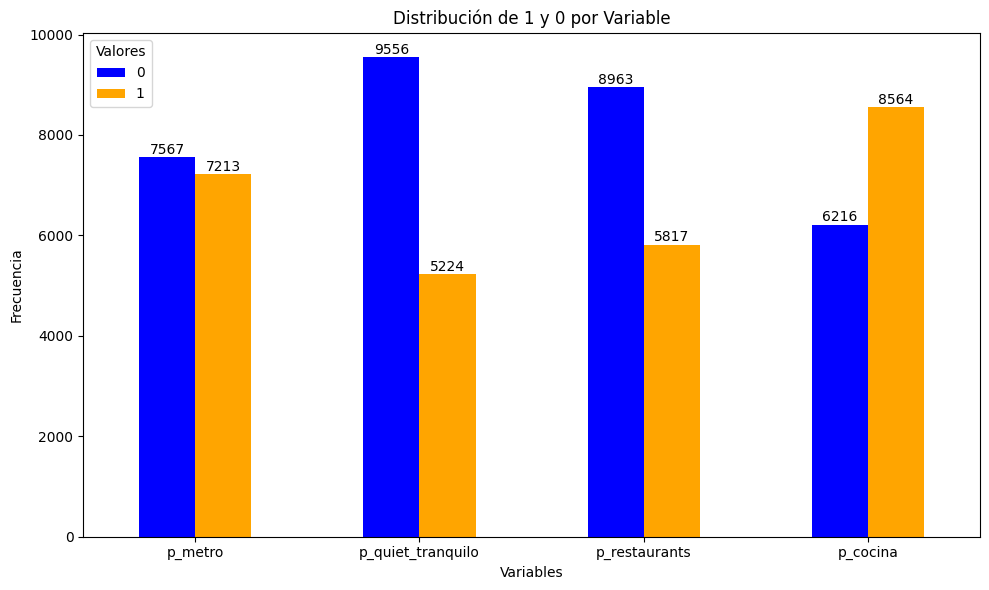

In [10]:
import matplotlib.pyplot as plt

# Crear un DataFrame con los conteos de 1 y 0 para cada columna
columns_to_plot = ['p_metro', 'p_quiet_tranquilo', 'p_restaurants','p_cocina']
counts = {col: [df[col].value_counts().get(0, 0), df[col].value_counts().get(1, 0)] for col in columns_to_plot}

counts_df = pd.DataFrame(counts, index=['0', '1'])
counts_df = counts_df.T
ax = counts_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Distribución de 1 y 0 por Variable')
plt.xlabel('Variables')
plt.ylabel('Frecuencia')
plt.legend(title='Valores', labels=['0', '1'])
plt.xticks(rotation=0)  # Mantener las etiquetas horizontales

# Agregar etiquetas en las barras
for i, col in enumerate(counts_df.columns):  # Recorrer valores 0 y 1
    for j, value in enumerate(counts_df[col]):  # Recorrer las variables
        ax.text(j + (i * 0.25) - 0.125, value + 1,  # Ajustar posición de las etiquetas
                f'{value}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
#Funcion grafica para presentar el contenido de las columnas

import matplotlib.pyplot as plt

def plot_column_bars(df, column_name):

    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return

    value_counts = df[column_name].value_counts()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de valores en la columna: {column_name}', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=85)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar etiquetas de los valores en las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    nulos = df[column_name].isnull().sum()
    total_registros = df.shape[0]
    print(f"Cantidad de valores nulos en '{column_name}': {nulos} de  un totla de {total_registros}")

    plt.tight_layout()
    plt.show()
    

Cantidad de valores nulos en 'p_Interaction': 0 de  un totla de 14780


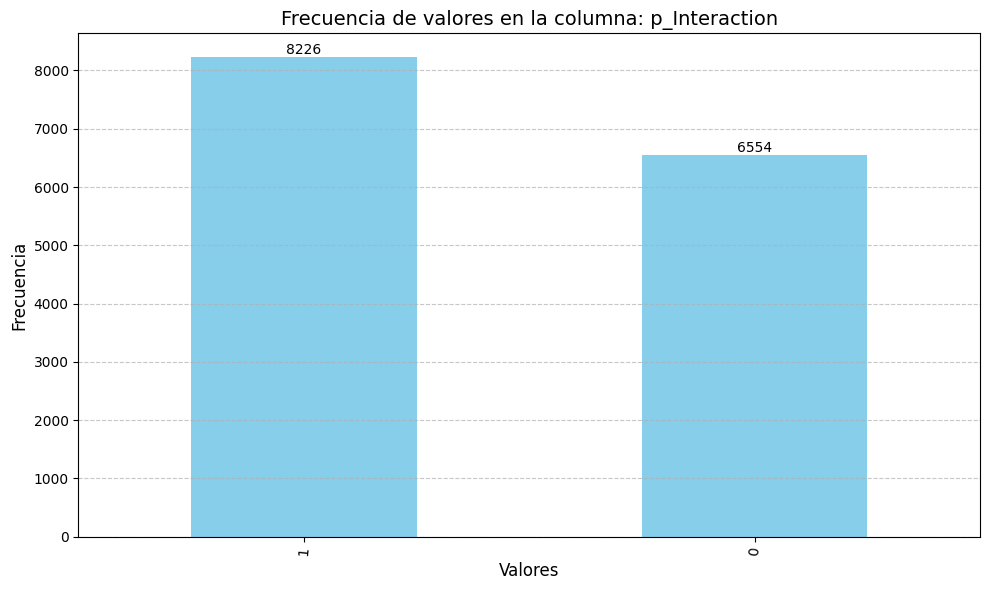

In [12]:
df['p_Interaction'] = df['Interaction'].apply(lambda x: 1 if pd.notnull(x) and str(x).strip() != "" else 0)
plot_column_bars(df,'p_Interaction' )

Cantidad de valores nulos en 'p_House_Rules': 0 de  un totla de 14780


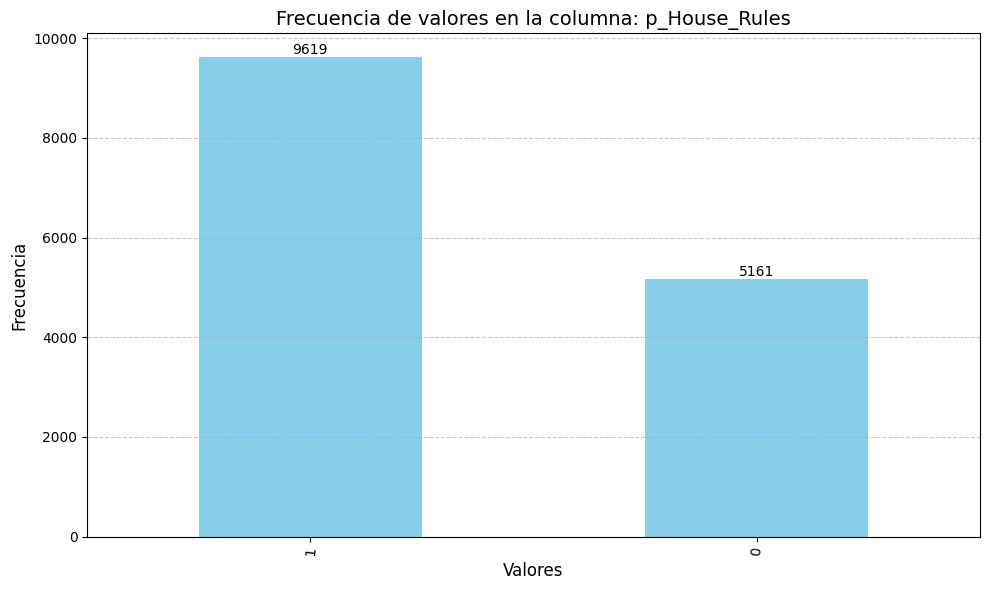

In [13]:
df['p_House_Rules'] = df['House_Rules'].apply(lambda x: 1 if pd.notnull(x) and str(x).strip() != "" else 0)
plot_column_bars(df,'p_House_Rules' )

Cantidad de valores nulos en 'p_Host_Since_anio': 3 de  un totla de 14780


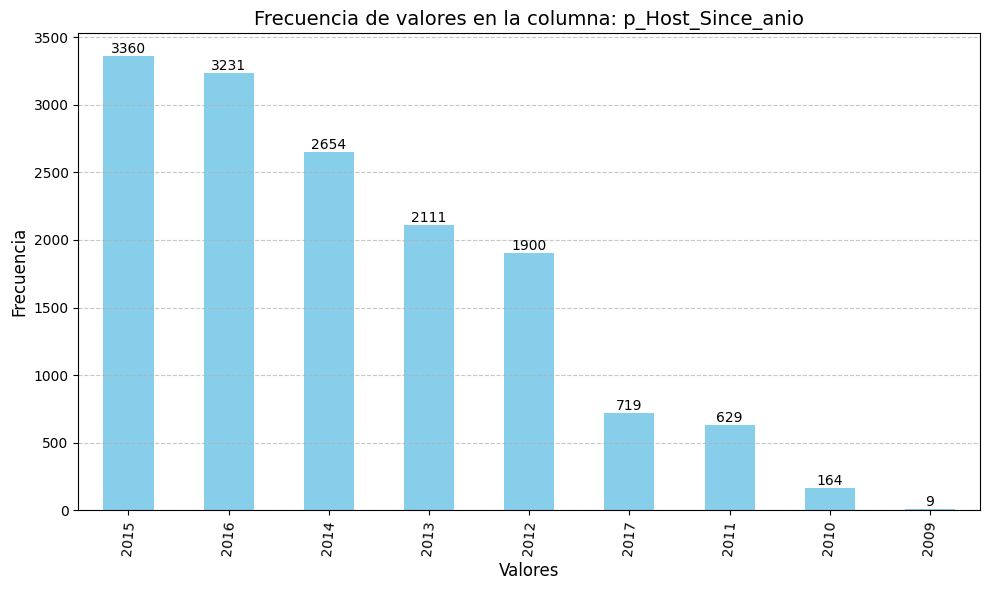

In [14]:
# de la comlumna  Host_Since extraer el año

df['p_Host_Since_anio'] = pd.to_datetime(df['Host_Since'], errors='coerce').dt.year
df['p_Host_Since_anio'] = df['p_Host_Since_anio'].astype('Int64')
plot_column_bars(df,'p_Host_Since_anio' )


Cantidad de valores nulos en 'Host_Response_Time': 1899 de  un totla de 14780


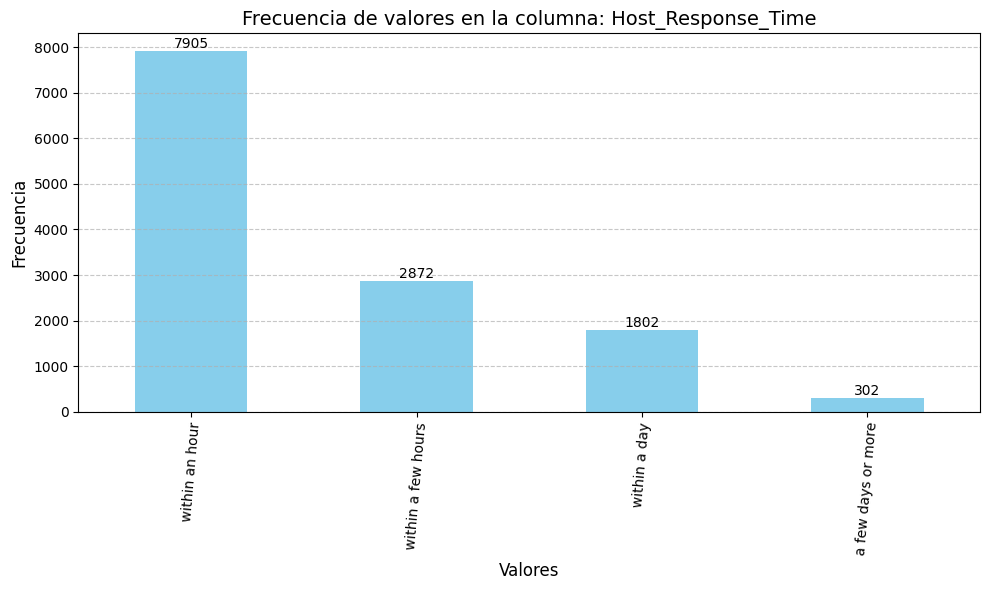

In [15]:
plot_column_bars(df,'Host_Response_Time' )


#NO se analizará pues hace sentido que este dato  no afectaria las variables objetivo


Cantidad de valores nulos en 'Host_Response_Rate': 1899 de  un totla de 14780


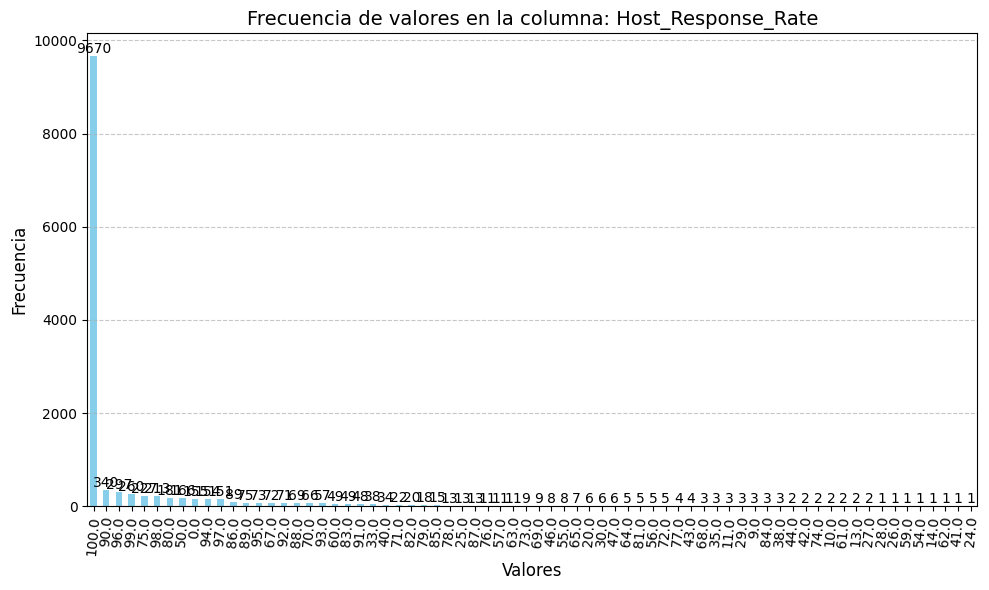

In [16]:
plot_column_bars(df,'Host_Response_Rate' )
#No se utilizara esta variable pues la mayoria tiene 100.00 y no hace sentido que afecte el precio objetivo

Cantidad de valores nulos en 'Host_Listings_Count': 3 de  un totla de 14780


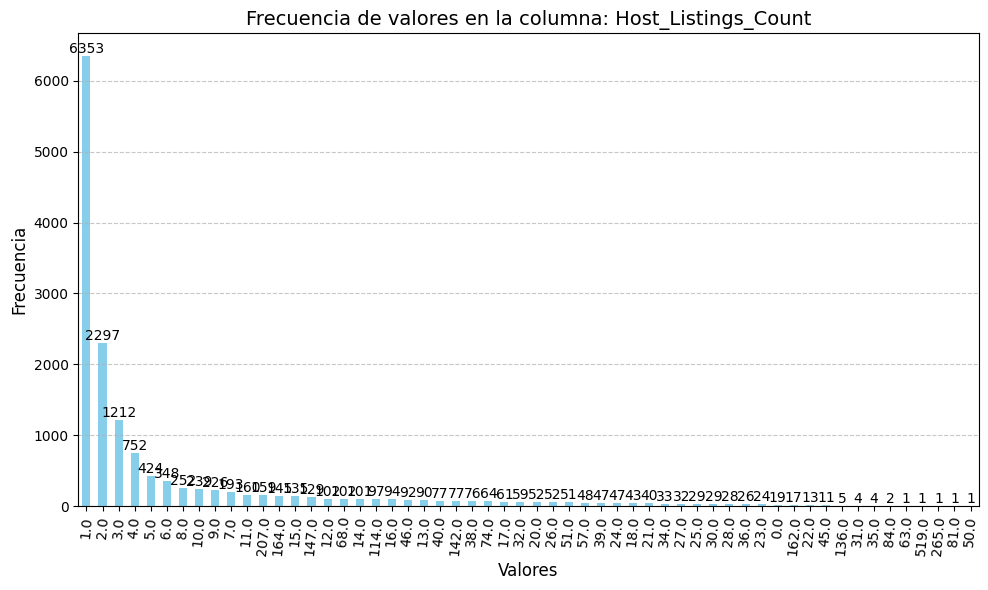

In [17]:
plot_column_bars(df,'Host_Listings_Count' )

Cantidad de valores nulos en 'Host_Total_Listings_Count': 3 de  un totla de 14780


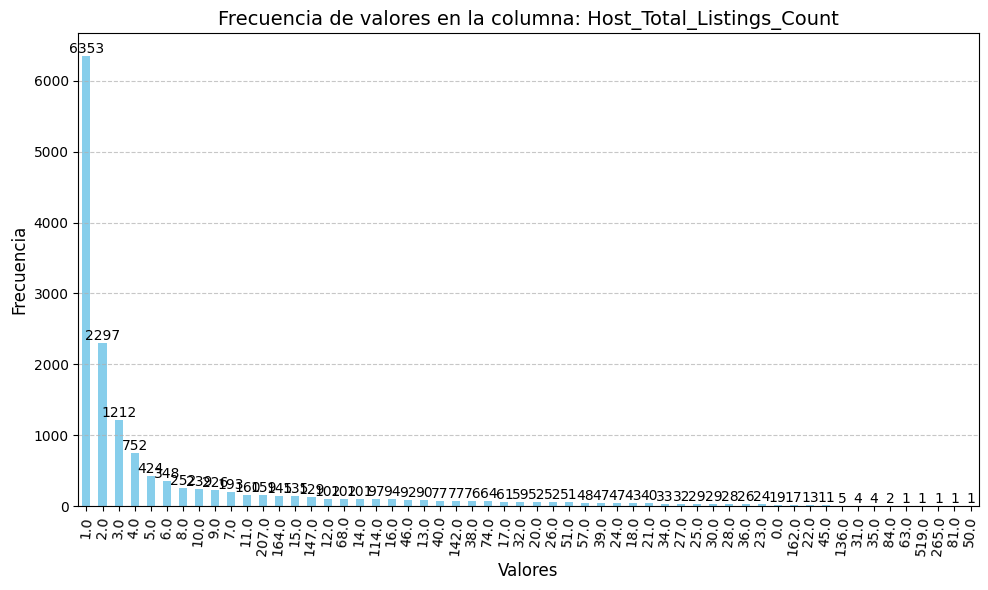

In [18]:
plot_column_bars(df,'Host_Total_Listings_Count' )

Cantidad de valores nulos en 'Zipcode': 506 de  un totla de 14780


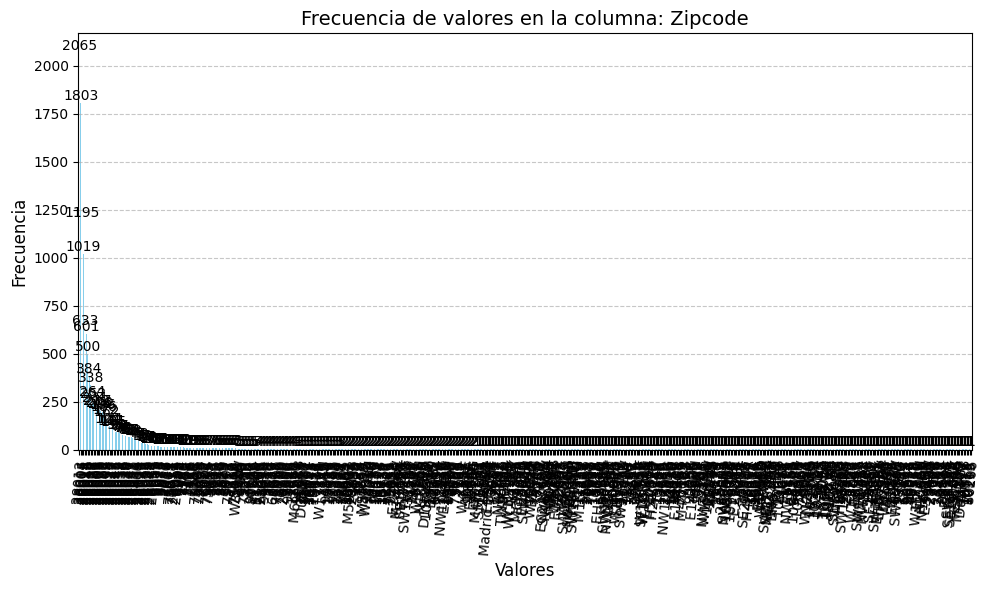

In [19]:
plot_column_bars(df,'Zipcode' )

In [20]:
top_zipcodes = df['Country'].value_counts().head(20)
print("Los 20 valores más comunes en Zipcode:")
print(top_zipcodes)

#Por los valores consideraria usar solo los registos de Country=Spain

Los 20 valores más comunes en Zipcode:
Country
Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: count, dtype: int64


In [21]:
df_spain = df[df['Country'] == 'Spain']

top_zipcodes_spain = df_spain['Zipcode'].value_counts().tail(20)
print("Los 20 valores menos comunes en Zipcode para Country='Spain':")
print(top_zipcodes_spain)

#al aprecer Zipcode no es certero  porque hay valores que no cumplen un formato


Los 20 valores menos comunes en Zipcode para Country='Spain':
Zipcode
46370           1
7518            1
7209            1
7004            1
28290           1
27004           1
7199            1
28002\n28002    1
2805            1
28094           1
28730           1
29012           1
280013          1
8016            1
743             1
28052           1
8027            1
8020            1
20013           1
7688            1
Name: count, dtype: int64


In [22]:
count_null_latitude = df['Latitude'].isnull().sum()
count_null_Longitude = df['Longitude'].isnull().sum()

print(f"El número de registros con Latitude nulo es: {count_null_latitude}")
print(f"El número de registros con Longitude nulo es: {count_null_Longitude}")


#como no hay nulos presumo la informacion es mas certera y peudo conseguir Zipcode 

El número de registros con Latitude nulo es: 0
El número de registros con Longitude nulo es: 0


In [23]:
import requests
import time
import subprocess
import json


#ESTE PROCESO NO FUNCIONO EN JUPYTER LAB POR RECURRSOS, SE LO EJECUTO EXTERANMENTE LA IDEA ES CONSEGUIR LOS ZIP CODE VALIDADOS EN FUNCION A LATITUD Y LONGITUD
def get_zipcode(lat, lon,i):
    try:
        # Construir la URL para la búsqueda inversa
        url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json&addressdetails=1"
        command = [
            "curl", "-s", "-X", "GET", url,
            "-H", "User-Agent: ziocode/1.0 (tucorreo@ejemplo.com)"
        ]
        result = subprocess.run(command, capture_output=True, text=True)
        response_text = result.stdout
        if result.returncode == 0 and response_text:
            # Parsear la respuesta JSON
            response = json.loads(response_text)

            zipcode=response.get('address', {}).get('postcode', None)
            # Extraer el código postal
#            print(f"Calculo: {lat}, Lon: {lon} = Zipcode: {zipcode}")

            return zipcode
        else:
            print(f"Error al ejecutar curl para Lat: {lat}, Lon: {lon}, i:{index}")
            return None
    except Exception as e:
        print(f"Error procesando las coordenadas Lat: {lat}, Lon: {lon},i{index}: {e}")
    return None


'''
import requests
import time
import subprocess
import json



def get_zipcode(lat, lon,index):
    try:
        # Construir la URL para la búsqueda inversa
        url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json&addressdetails=1"
        command = [
            "curl", "-s", "-X", "GET", url,
            "-H", "User-Agent: ziocode/1.0 (tucorreo@ejemplo.com)"
        ]
        result = subprocess.run(command, capture_output=True, text=True)
        response_text = result.stdout
        if result.returncode == 0 and response_text:
            response = json.loads(response_text)
            zipcode=response.get('address', {}).get('postcode', None)
            print(f"i:{index}  Calculo: {lat}, Lon: {lon} = Zipcode: {zipcode}")

            return zipcode
        else:
            print(f"Error al ejecutar curl para Lat: {lat}, Lon: {lon}, i:{index}")
            return None
    except Exception as e:
        print(f"Error procesando las coordenadas Lat: {lat}, Lon: {lon},i{index}: {e}")
    return None




def process_and_append_zip(file_path, output_file_path):
    """
    Lee un archivo línea por línea, extrae latitud y longitud,
    agrega el resultado de get_zipcode y guarda las líneas modificadas en un nuevo archivo.
    """
    try:
        i=0
        with open(file_path, 'r') as infile, open(output_file_path, 'w') as outfile:

            for line in infile:
                i = i + 1
                # Divide la línea en partes separadas por '|'
                parts = line.strip().split('|')
                if len(parts) >= 3:
                    try:
                        lat = float(parts[1])
                        lon = float(parts[2])
                        zipcode = get_zipcode(lat, lon,i)
                        new_line = f"{line.strip()}{zipcode}\n"
                        outfile.write(new_line)
                    except ValueError:
                        print(f"Error al procesar la línea: {line.strip()}")
                        # Escribir la línea sin cambios si ocurre un error
                        outfile.write(f"{line.strip()}NA\n")
                else:
                    print(f"Línea no válida: {line.strip()}")
                    outfile.write(f"{line.strip()}NA\n")
        print(f"Archivo procesado correctamente. Resultado guardado en: {output_file_path}")
    except FileNotFoundError:
        print(f"El archivo '{file_path}' no fue encontrado.")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")


        
# Ruta al archivo que contiene los datos
input_file = "ubicaciones.txt"  # Archivo original con los datos
output_file = "ubicaciones_OUT.txt"  # Archivo de salida con los ZIP codes agregados

# Llamar a la función para procesar y guardar el resultado
process_and_append_zip(input_file, output_file)




'''

    

'\nimport requests\nimport time\nimport subprocess\nimport json\n\n\n\ndef get_zipcode(lat, lon,index):\n    try:\n        # Construir la URL para la búsqueda inversa\n        url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json&addressdetails=1"\n        command = [\n            "curl", "-s", "-X", "GET", url,\n            "-H", "User-Agent: ziocode/1.0 (tucorreo@ejemplo.com)"\n        ]\n        result = subprocess.run(command, capture_output=True, text=True)\n        response_text = result.stdout\n        if result.returncode == 0 and response_text:\n            response = json.loads(response_text)\n            zipcode=response.get(\'address\', {}).get(\'postcode\', None)\n            print(f"i:{index}  Calculo: {lat}, Lon: {lon} = Zipcode: {zipcode}")\n\n            return zipcode\n        else:\n            print(f"Error al ejecutar curl para Lat: {lat}, Lon: {lon}, i:{index}")\n            return None\n    except Exception as e:\n        print(f"Err

In [24]:
df.head(3).T

0  \
ID                                                                       11210388   
Listing_Url                                 https://www.airbnb.com/rooms/11210388   
Scrape_ID                                                          20170306202425   
Last_Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
Summary                         Loft in the Hill country 12-15 minutes directl...   
Space                           This loft has a spectacular view of the hills ...   
Description                     Loft in the Hill country 12-15 minutes directl...   
Experiences_Offered                                                          none   
Neighborhood_Overview           This neighborhood is located in the hills west...   
Notes                           The loft is located on a gated property.  Ther...   
Transit                         There is no public transportation from this lo...   
Access                          The loft is entirely private to the guest as i...   
Interaction                     My wife and I live on the property so we would...   
House_Rules                     The loft is entirely private but is adjacent t...   
Thumbnail_Url                   https://a0.muscache.com/im/pictures/c351a9b5-5...   
Medium_Url                      https://a0.muscache.com/im/pictures/c351a9b5-5...   
Picture_Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL_Picture_Url                  https://a0.muscache.com/im/pictures/c351a9b5-5...   
Host_ID                                                                  58386783   
Host_URL                               https://www.airbnb.com/users/show/58386783   
Host_Name                                                                    John   
Host_Since                                                             2016-02-11   
Host_Location                   My father was USAF so I was born at Offutt AFB...   
Host_About                      I am a High Tech Professional with over 30 yea...   
Host_Response_Time                                                 within an hour   
Host_Response_Rate                                                          100.0   
Host_Acceptance_Rate                                                          NaN   
Host_Thumbnail_Url              https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host_Picture_Url                https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host_Neighbourhood                                                            NaN   
Host_Listings_Count                                                           1.0   
Host_Total_Listings_Count                                                     1.0   
Host_Verifications                                        email,phone,reviews,kba   
Street                          Canyon Edge Drive, Austin, TX 78733, United St...   
Neighbourhood                                                                 NaN   
Neighbourhood_Cleansed                                                      78733   
Neighbourhood_Group_Cleansed                                                  NaN   
City                                                                       Austin   
State                                                                          TX   
Zipcode                                                                     78733   
Market                                                                     Austin   
Smart_Location                                                         Austin, TX   
Country_Code                                                                   US   
Country                                                             United States   
Latitude                                                                30.337361   
Longitude                                                              -97.863277   


In [25]:

#Ejecucion del proces de calculo de zipcode en base a la longitud y latitud
#Este proceso no se temrianba de eejcutar , por lo que se realizo externamente por periodos 
'''
for index, row in df.iterrows():
        lat, lon, zipcode = row['Latitude'], row['Longitude'], row['p_zipcode_calculado']
        if zipcode==None:
            zipcode = get_zipcode(lat, lon,index)
            df.at[index, 'p_zipcode_calculado'] = zipcode
            time.sleep(.4)
    
'''

"\nfor index, row in df.iterrows():\n        lat, lon, zipcode = row['Latitude'], row['Longitude'], row['p_zipcode_calculado']\n        if zipcode==None:\n            zipcode = get_zipcode(lat, lon,index)\n            df.at[index, 'p_zipcode_calculado'] = zipcode\n            time.sleep(.4)\n    \n"

In [26]:
# Contar cuántos registros tienen p_zipcode_calculado nulo que no se completo con el proceso
count_null_zipcodes = df['p_zipcode_calculado'].isnull().sum()

print(f"El número de registros con p_zipcode_calculado nulo es: {count_null_zipcodes}")



El número de registros con p_zipcode_calculado nulo es: 14780


Cantidad de valores nulos en 'Property_Type': 0 de  un totla de 14780


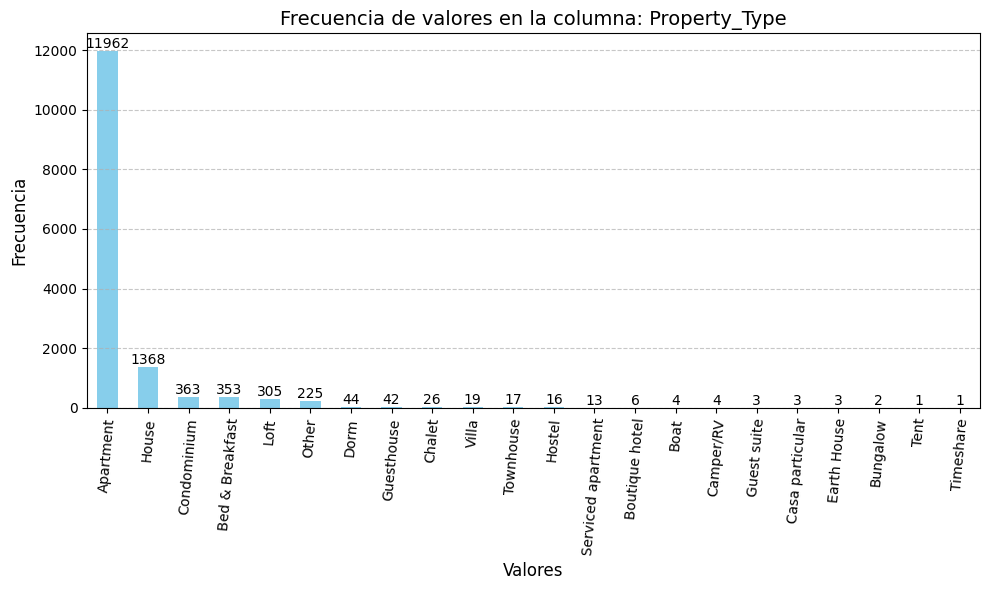

In [27]:
plot_column_bars(df,'Property_Type' )

In [28]:


label_encoder_p_Property_Type_Encoded = LabelEncoder()
df['p_Property_Type_Encoded'] = label_encoder_p_Property_Type_Encoded.fit_transform(df['Property_Type'])
print(df[['Property_Type', 'p_Property_Type_Encoded']].head())

label_encoder_p_Property_Type_Encoded.classes_

  Property_Type  p_Property_Type_Encoded
0          Loft                       15
1     Apartment                        0
2     Apartment                        0
3     Apartment                        0
4     Apartment                        0


array(['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel',
       'Bungalow', 'Camper/RV', 'Casa particular', 'Chalet',
       'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse',
       'Hostel', 'House', 'Loft', 'Other', 'Serviced apartment', 'Tent',
       'Timeshare', 'Townhouse', 'Villa'], dtype=object)

Cantidad de valores nulos en 'Room_Type': 0 de  un totla de 14780


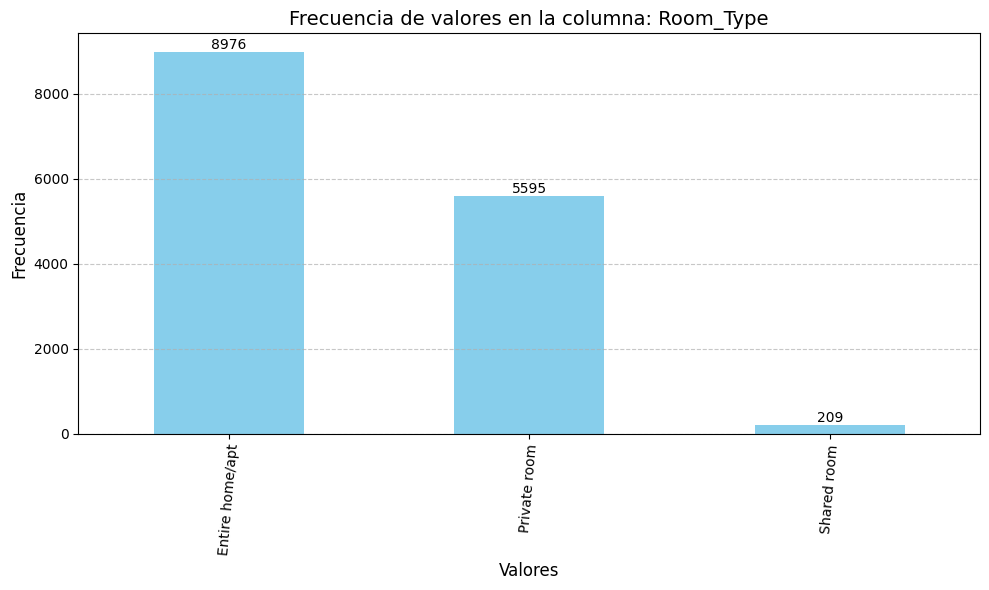

In [29]:
plot_column_bars(df,'Room_Type' )

In [30]:


label_encoder_p_Room_Type_Encoded = LabelEncoder()
df['p_Room_Type_Encoded'] = label_encoder_p_Room_Type_Encoded.fit_transform(df['Room_Type'])
print(df[['Room_Type', 'p_Room_Type_Encoded']].head())

label_encoder_p_Room_Type_Encoded.classes_

         Room_Type  p_Room_Type_Encoded
0  Entire home/apt                    0
1  Entire home/apt                    0
2  Entire home/apt                    0
3  Entire home/apt                    0
4  Entire home/apt                    0


array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Cantidad de valores nulos en 'Bed_Type': 0 de  un totla de 14780


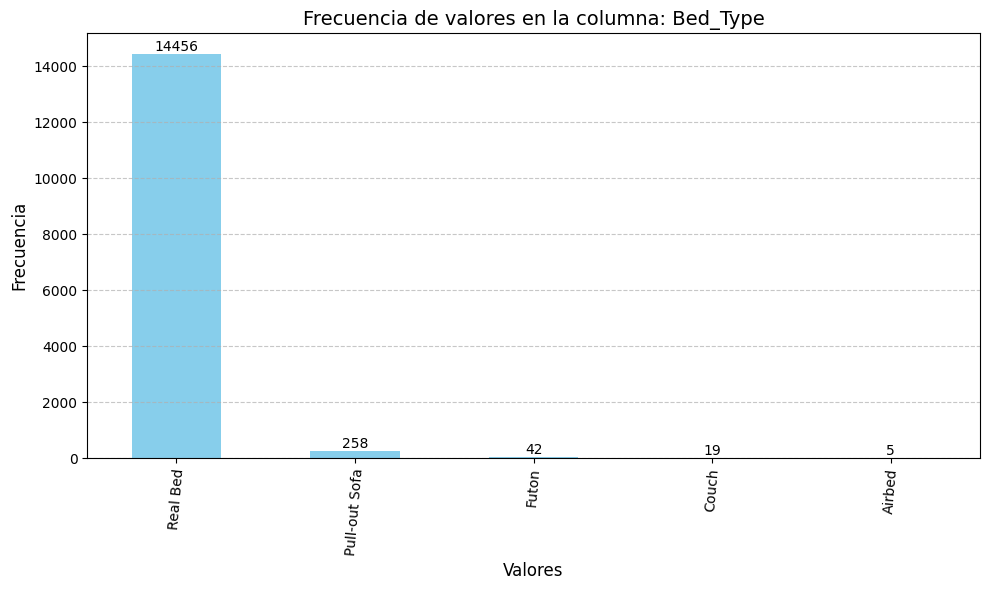

   Bed_Type  p_Bed_Type_Encoded
0  Real Bed                   4
1  Real Bed                   4
2  Real Bed                   4
3  Real Bed                   4
4  Real Bed                   4


array(['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'],
      dtype=object)

In [31]:
plot_column_bars(df,'Bed_Type' )


label_encoder_p_Bed_Type_Encoded = LabelEncoder()
df['p_Bed_Type_Encoded'] = label_encoder_p_Bed_Type_Encoded.fit_transform(df['Bed_Type'])
print(df[['Bed_Type', 'p_Bed_Type_Encoded']].head())

label_encoder_p_Bed_Type_Encoded.classes_


In [32]:
# Supongamos que la columna se llama 'Property_Terms' y los términos están separados por comas
column_name = 'Amenities'
df[column_name] = df[column_name].str.upper()
df_terms = df[column_name].str.get_dummies(sep=',')
df_terms = df_terms.add_prefix('p_Amenities_')
df = pd.concat([df, df_terms], axis=1)

# Verificar el resultado
df.head(2)

ID                            Listing_Url       Scrape_ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   

  Last_Scraped                            Name  \
0   2017-03-07  The Loft-Full Bath-Deck w/View   
1   2017-04-08      Claris I, Friendly Rentals   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   

                                         Description Experiences_Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   

                               Neighborhood_Overview  \
0  This neighborhood is located in the hills west...   
1  Plaza   Cataluña Catalonia Square is the large...   

                                               Notes  \
0  The loft is located on a gated property.  Ther...   
1                                                NaN   

                                             Transit  \
0  There is no public transportation from this lo...   
1  Ideal to discover the city either on foot or b...   

                                              Access  \
0  The loft is entirely private to the guest as i...   
1  Travellers will have access to the entire apar...   

                                         Interaction  \
0  My wife and I live on the property so we would...   
1  We will be more than happy to help you with an...   

                                         House_Rules  \
0  The loft is entirely private but is adjacent t...   
1  CHECK-IN Week Days: The check-in and key colle...   

                                       Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                          Medium_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                         Picture_Url  \
0  https://public.opendatasoft.com/api/v2/catalog...   
1  https://public.opendatasoft.com/api/v2/catalog...   

                                      XL_Picture_Url    Host_ID  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   58386783   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...  102947901   

                                      Host_URL Host_Name  Host_Since  \
0   https://www.airbnb.com/users/show/58386783      John  2016-02-11   
1  https://www.airbnb.com/users/show/102947901   Claudia  2016-11-08   

                                       Host_Location  \
0  My father was USAF so I was born at Offutt AFB...   
1                        Barcelona, Catalonia, Spain   

                                          Host_About Host_Response_Time  \
0  I am a High Tech Professional with over 30 yea...     within an hour   
1  Hola a todos! Soy Claudia Castillo y soy parte...     within an hour   

   Host_Response_Rate Host_Acceptance_Rate  \
0               100.0                  NaN   
1               100.0                  NaN   

                                  Host_Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...   
1  https://a0.muscache.com/im/pictures/c071e13e-5...   

                                    Host_Picture_Url Host_Neighbourhood  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...                NaN   
1  https://a0.muscache.com/im/pictures/c071e13e-5...                NaN   

   Host_Listings_Count  Host_Total_Listings_Count  \
0                  1.0                        1.0   
1                162.0                      162.0   

               Host_Verifications  \
0         emai

In [33]:
import pandas as pd

# Función para clasificar calificaciones manualmente
def clasificar_calificacion_manual(rating, maximo):
    if pd.isnull(rating):  # Verificar si el valor es nulo
        return 'Sin Nota'
    if rating == 0:
        return 'Sin Nota'

    if maximo=='10':
        rating=rating*10
        
    
    if rating <= 30.0:
        return 'Muy baja'
    elif rating <= 50.0:
        return 'Baja'
    elif rating <= 70.0:
        return 'Regular'
    elif rating <= 90.0:
        return 'Buena'
    else:
        return 'Excelente'

# Función para clasificar las calificaciones en un DataFrame
def clasificar_calificaciones(df_data, rating_column,maximo):
    columna_procesada = "p_" + rating_column  # Nueva columna procesada
    clasificador_parcial = partial(clasificar_calificacion_manual, maximo=maximo)
    df_data[columna_procesada] = df_data[rating_column].apply(clasificador_parcial)
    return df_data


x=clasificar_calificaciones(df, 'Review_Scores_Rating','100')
print('procesado..Review_Scores_Rating')
x=clasificar_calificaciones(df, 'Review_Scores_Accuracy','10')
print('procesado..Review_Scores_Accuracy')
x=clasificar_calificaciones(df, 'Review_Scores_Cleanliness','10')
print('procesado..Review_Scores_Cleanliness')
x=clasificar_calificaciones(df, 'Review_Scores_Checkin','10')
print('procesado..Review_Scores_Checkin')
x=clasificar_calificaciones(df, 'Review_Scores_Communication','10')
print('procesado..Review_Scores_Communication')
x=clasificar_calificaciones(df, 'Review_Scores_Location','10')
print('procesado..Review_Scores_Location')
x=clasificar_calificaciones(df, 'Review_Scores_Value','10')
print('procesado..Review_Scores_Value')


procesado..Review_Scores_Rating
procesado..Review_Scores_Accuracy
procesado..Review_Scores_Cleanliness
procesado..Review_Scores_Checkin
procesado..Review_Scores_Communication
procesado..Review_Scores_Location
procesado..Review_Scores_Value


Cantidad de valores nulos en 'p_Review_Scores_Rating': 0 de  un totla de 14780


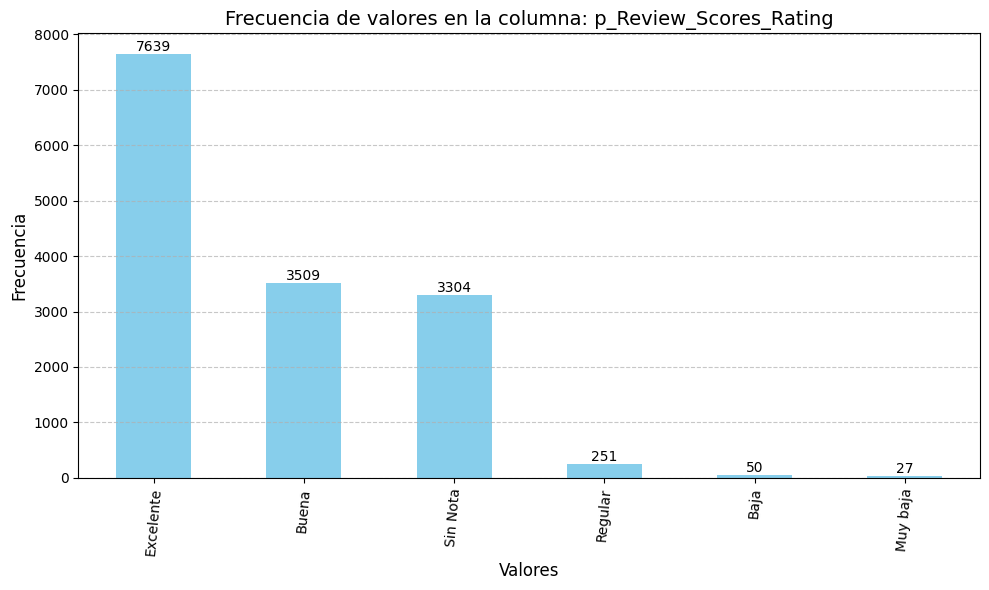

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Accuracy': 0 de  un totla de 14780


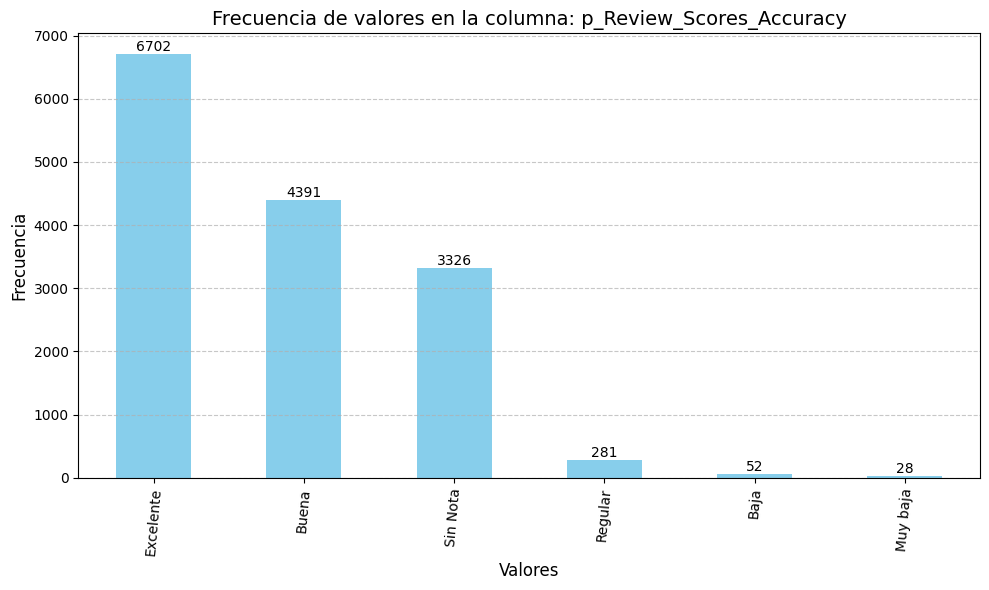

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Cleanliness': 0 de  un totla de 14780


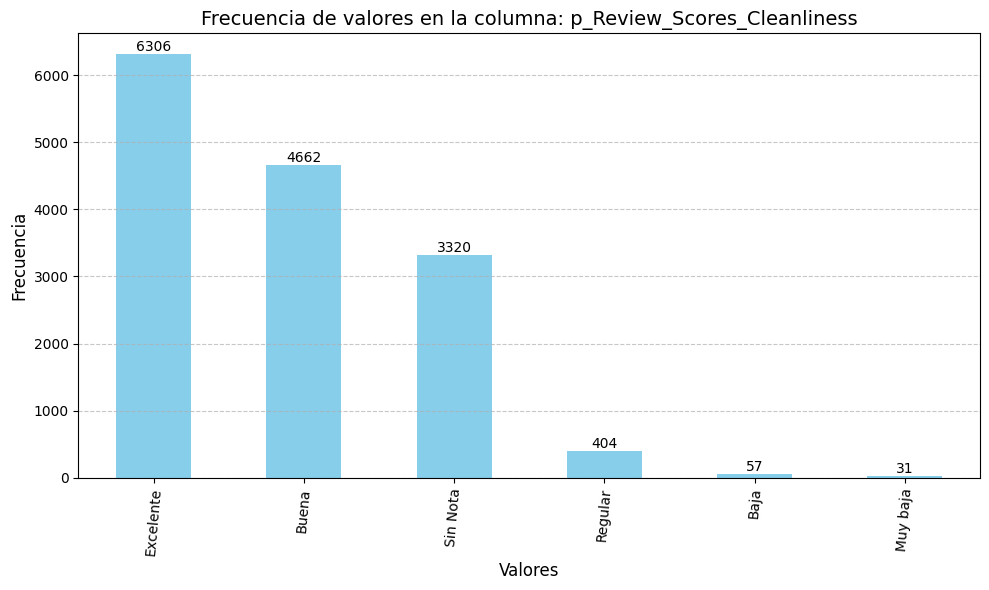

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Checkin': 0 de  un totla de 14780


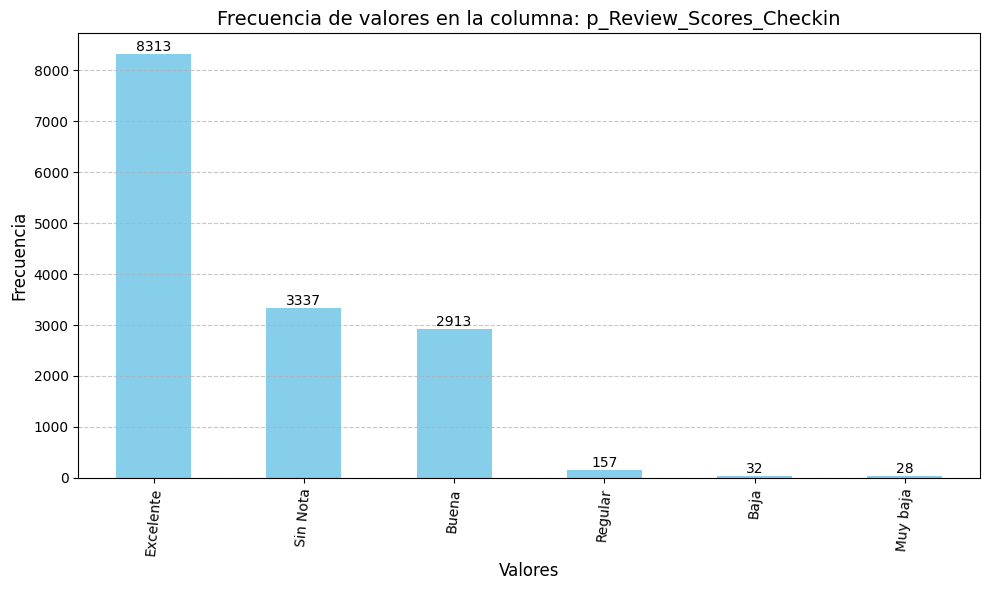

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Communication': 0 de  un totla de 14780


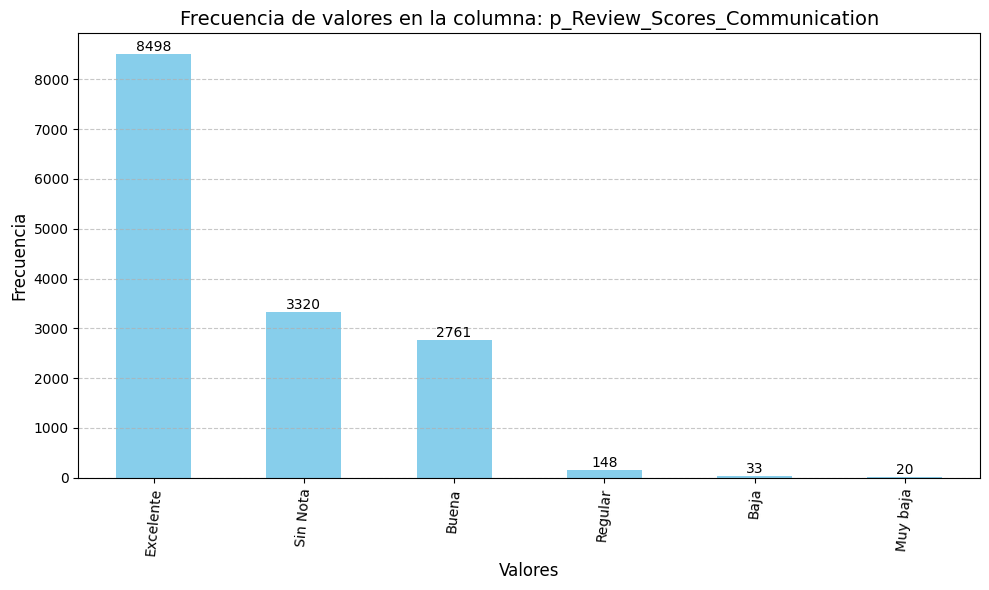

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Location': 0 de  un totla de 14780


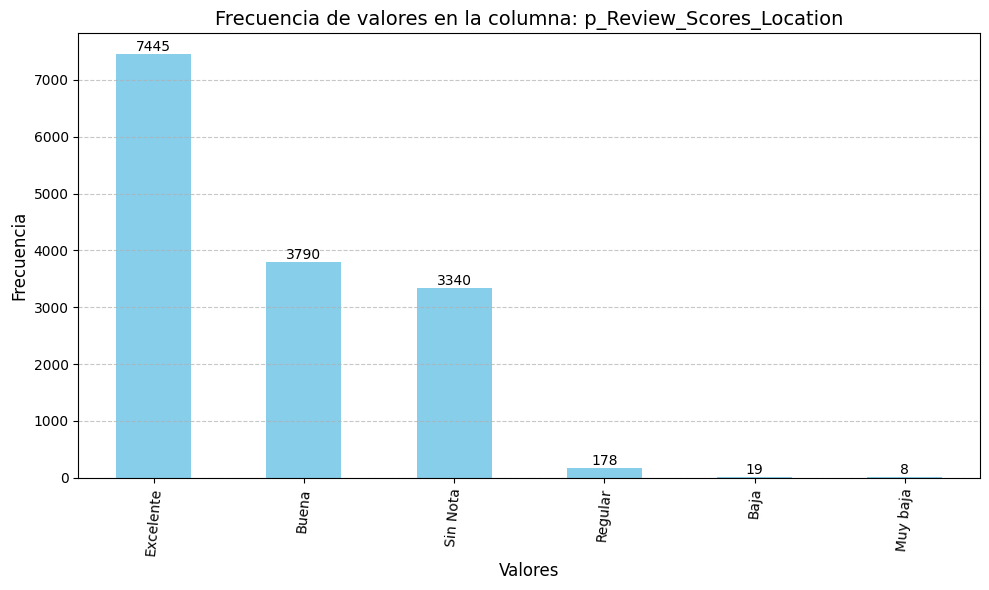

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'p_Review_Scores_Value': 0 de  un totla de 14780


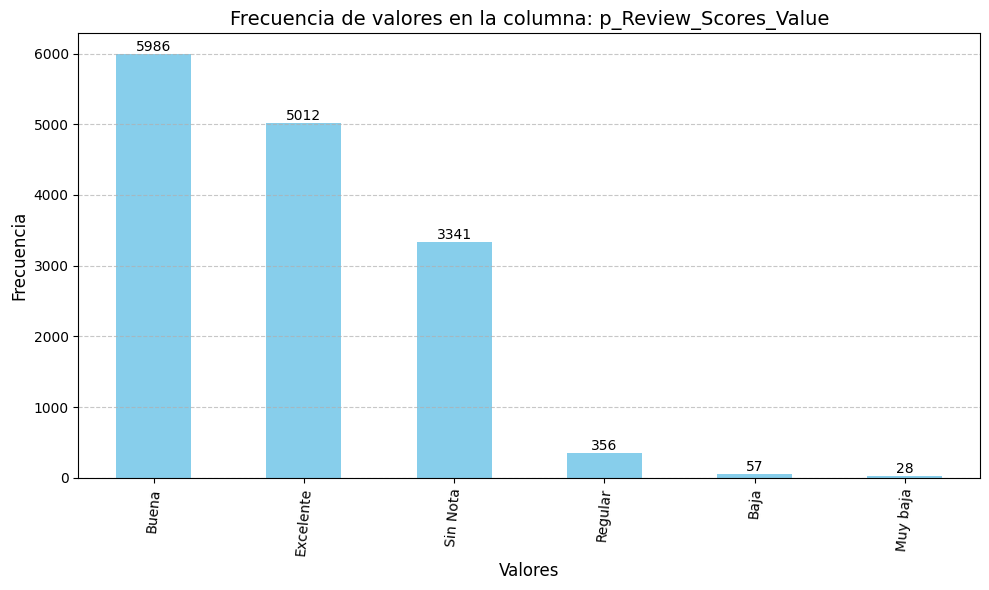

array(['Baja', 'Buena', 'Excelente', 'Muy baja', 'Regular', 'Sin Nota'],
      dtype=object)

Cantidad de valores nulos en 'Host_ID': 0 de  un totla de 14780


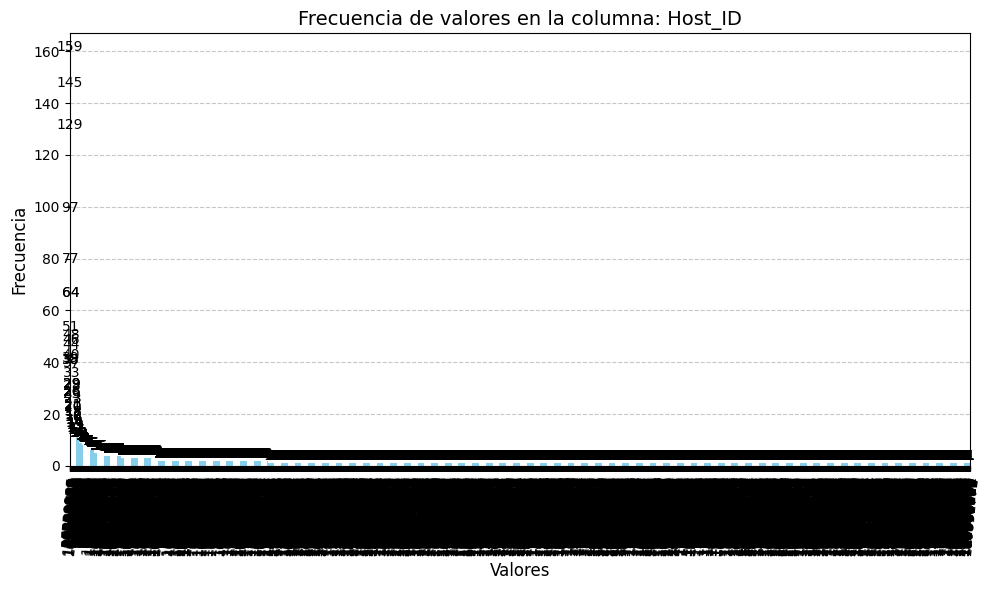

array([    17453,     19854,     31622, ..., 124730023, 124738790,
       124753355], shape=(8935,))

Cantidad de valores nulos en 'City': 6 de  un totla de 14780


/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

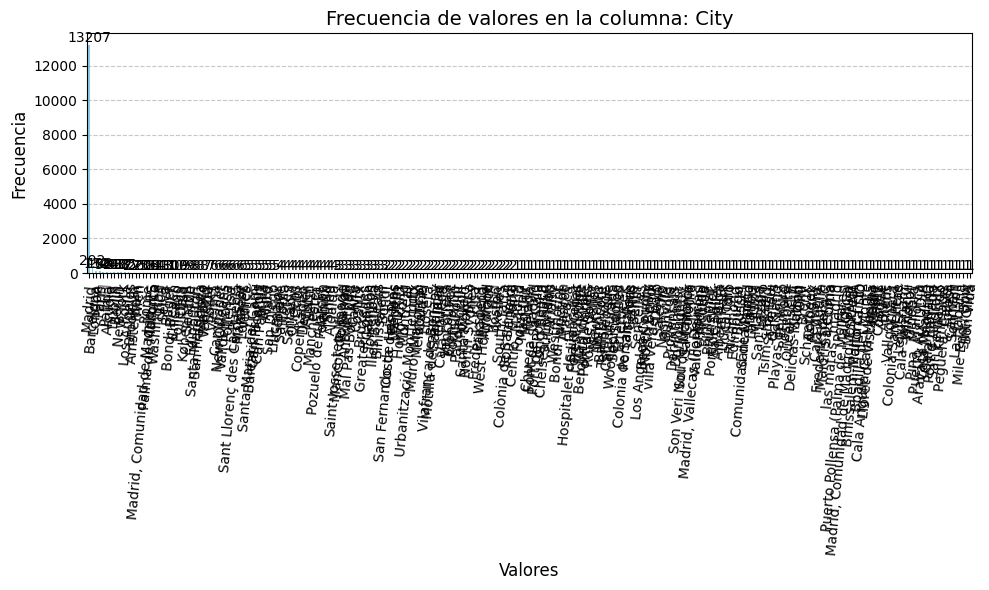

array(['Alaró', 'Albert Park', 'Alcudia', 'Alcúdia', 'Algaida',
       'Amsterdam', 'Andratx', 'Antwerpen', 'Aravaca', 'Aravaca (Madrid)',
       'Ariany', 'Athens', 'Athina', 'Austin', 'Balearic Islands',
       'Ballsbridge', 'Barcelona', 'Berlin', 'Berlín', 'Berowra Waters',
       'Betlem', 'Beverly Hills', 'Biniamar', 'Binissalem',
       'Binissalem-Mallorca DO', 'Boadilla del Monte', 'Bondi',
       'Bondi Beach', 'Bondi Junction', 'Boston', 'Brent', 'Bronx',
       'Brooklyn', 'Brunswick', 'Brussel', 'Bruxelles', 'Bunyola',
       'Búger', 'Caimari', 'Cala Agulla', 'Cala Anguila-Cala Mendia',
       'Cala Ferrera', 'Cala Magrana', 'Cala Murada', 'Cala Pi',
       'Cala Ratjada', 'Cala Santanyí', 'Calvià', 'Campanet', 'Campos',
       'Can Pastilla', 'Can Picafort', 'Centro', 'Centro, Madrid',
       'Chelsea, London', 'Chicago', 'Chiva', 'Chueca', 'Chueca, Madrid',
       'Clongriffin', 'Cologny', 'Colonia Sant Pere',
       'Colonia de Sant Pere', 'Colònia de Sant Jordi',
    

In [34]:

plot_column_bars(df,'p_Review_Scores_Rating' )
label_encoder_p_Review_Scores_Rating = LabelEncoder()
df['p_Review_Scores_Rating_Encoded'] = label_encoder_p_Review_Scores_Rating.fit_transform(df['p_Review_Scores_Rating'])
label_encoder_p_Review_Scores_Rating.classes_


plot_column_bars(df,'p_Review_Scores_Accuracy' )
label_encoder_p_Review_Scores_Accuracy = LabelEncoder()
df['p_Review_Scores_Accuracy_Encoded'] = label_encoder_p_Review_Scores_Accuracy.fit_transform(df['p_Review_Scores_Accuracy'])
label_encoder_p_Review_Scores_Accuracy.classes_

plot_column_bars(df,'p_Review_Scores_Cleanliness' )
label_encoder_p_Review_Scores_Cleanliness = LabelEncoder()
df['p_Review_Scores_Cleanliness_Encoded'] = label_encoder_p_Review_Scores_Cleanliness.fit_transform(df['p_Review_Scores_Cleanliness'])
label_encoder_p_Review_Scores_Cleanliness.classes_

plot_column_bars(df,'p_Review_Scores_Checkin' )
label_encoder_p_Review_Scores_Checkin = LabelEncoder()
df['p_Review_Scores_Checkin_Encoded'] = label_encoder_p_Review_Scores_Checkin.fit_transform(df['p_Review_Scores_Checkin'])
label_encoder_p_Review_Scores_Checkin.classes_

plot_column_bars(df,'p_Review_Scores_Communication' )
label_encoder_p_Review_Scores_Communication = LabelEncoder()
df['p_Review_Scores_Communication_Encoded'] = label_encoder_p_Review_Scores_Communication.fit_transform(df['p_Review_Scores_Communication'])
label_encoder_p_Review_Scores_Communication.classes_

plot_column_bars(df,'p_Review_Scores_Location' )
label_encoder_p_Review_Scores_Location = LabelEncoder()
df['p_Review_Scores_Location_Encoded'] = label_encoder_p_Review_Scores_Location.fit_transform(df['p_Review_Scores_Location'])
label_encoder_p_Review_Scores_Location.classes_

plot_column_bars(df,'p_Review_Scores_Value' )
label_encoder_p_Review_Scores_Value = LabelEncoder()
df['p_Review_Scores_Value_Encoded'] = label_encoder_p_Review_Scores_Value.fit_transform(df['p_Review_Scores_Value'])
label_encoder_p_Review_Scores_Value.classes_

#se actegoriza el host_id porque hay host que tienen varias propiedades
plot_column_bars(df,'Host_ID' )
label_encoder_p_Host_ID = LabelEncoder()
df['p_Host_ID_Encoded'] = label_encoder_p_Host_ID.fit_transform(df['Host_ID'])
label_encoder_p_Host_ID.classes_

#se actegoriza city porque se va a tomar solo los registros de Spain son 14001 
plot_column_bars(df,'City' )
label_encoder_p_City = LabelEncoder()
df['p_City_Encoded'] = label_encoder_p_City.fit_transform(df['City'])
label_encoder_p_City.classes_


Cantidad de valores nulos en 'Cancellation_Policy': 0 de  un totla de 14780


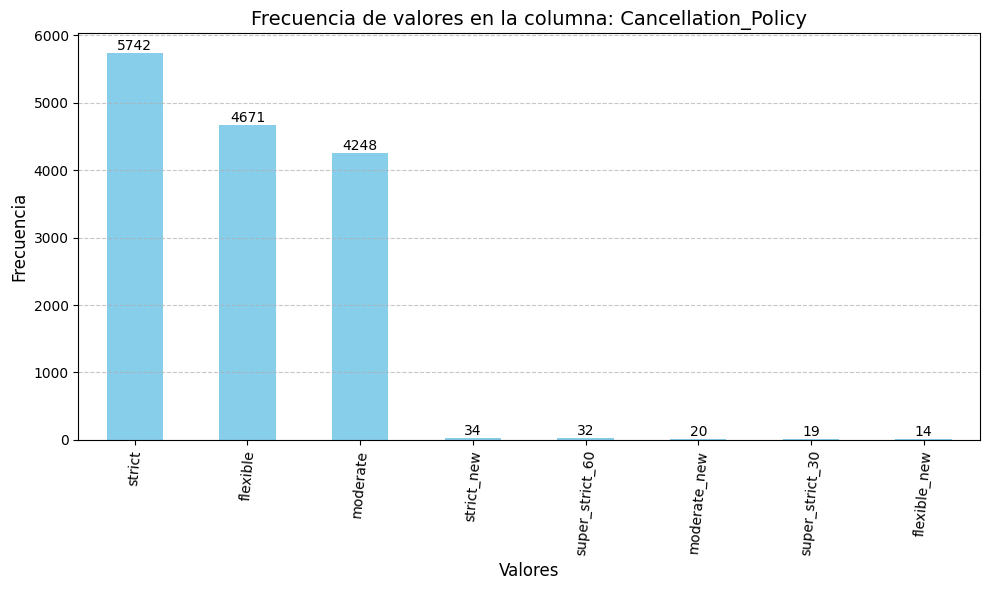

  Cancellation_Policy  p_Cancellation_Policy_Encoded
0            moderate                              2
1     super_strict_30                              6
2     super_strict_30                              6
3              strict                              4
4            flexible                              0


array(['flexible', 'flexible_new', 'moderate', 'moderate_new', 'strict',
       'strict_new', 'super_strict_30', 'super_strict_60'], dtype=object)

In [35]:
plot_column_bars(df,'Cancellation_Policy' )


label_encoder_p_Cancellation_Policy_Encoded = LabelEncoder()
df['p_Cancellation_Policy_Encoded'] = label_encoder_p_Cancellation_Policy_Encoded.fit_transform(df['Cancellation_Policy'])
print(df[['Cancellation_Policy', 'p_Cancellation_Policy_Encoded']].head())

label_encoder_p_Cancellation_Policy_Encoded.classes_

Cantidad de valores nulos en 'Country': 1 de  un totla de 14780


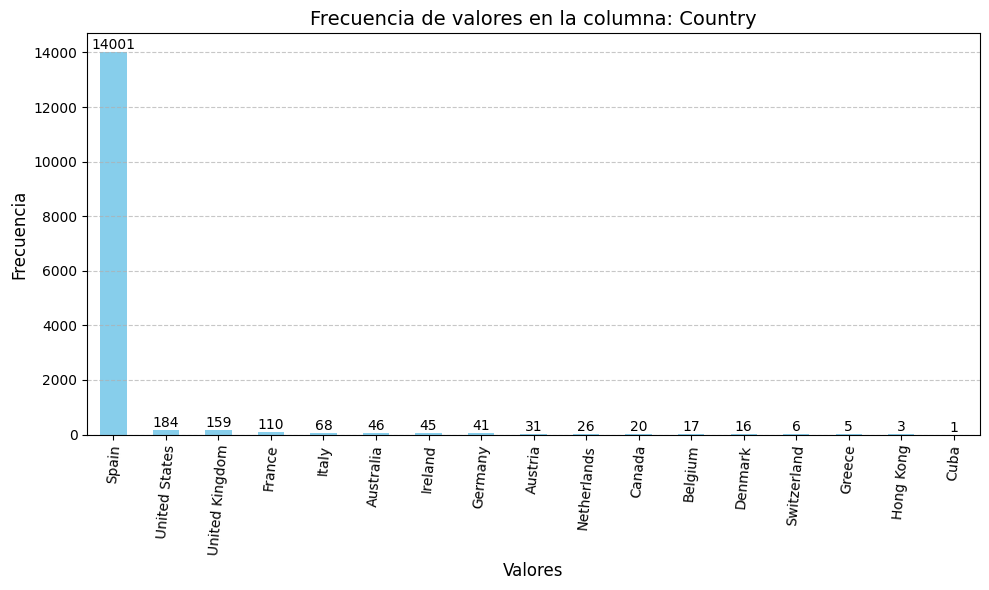

Cantidad de valores nulos en 'City': 6 de  un totla de 14780


/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_32702/957239870.py:31: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

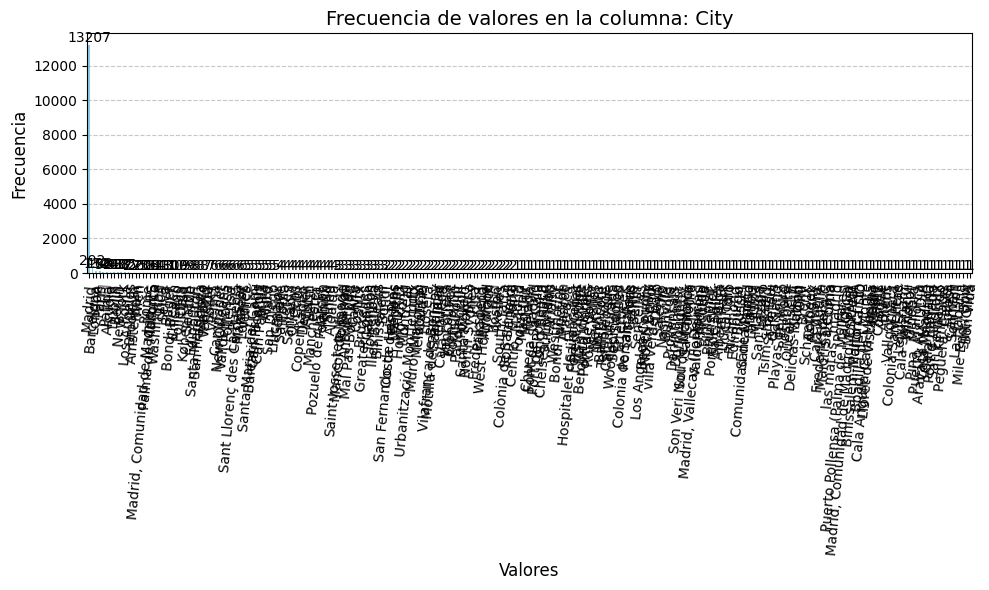

In [36]:
plot_column_bars(df,'Country' )
plot_column_bars(df,'City' )

In [37]:
#leer  la información obtenida de zipcode a aprtir de la altitud y longitud 


import pandas as pd

def procesar_archivo_df(ruta_archivo):
    datos = []
    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            linea = linea.strip()
            partes = linea.split('|')
            if len(partes) == 4:
                id, longitud, latitud, zipcode = partes
                datos.append([id, longitud, latitud, zipcode])
            else:
                print(f"Línea mal formada: {linea}")

    df_cargada = pd.DataFrame(datos, columns=['ID', 'Longitud', 'Latitud', 'Zipcode'])
    return df_cargada

ruta_archivo = ARCHIVO_CONSULTAS_ZIPCODE  
df_zipcodes = procesar_archivo_df(ruta_archivo)


# Convierte a int64, manejando errores
df_zipcodes['ID'] = pd.to_numeric(df_zipcodes['ID'], errors='coerce').astype('Int64')

df_zipcodes.head(4)


ID            Longitud             Latitud Zipcode
0  11210388  30.337360935478735  -97.86327667821496   78733
1  17471131  41.389682942216986  2.1726254301724186   08010
2  17584891   41.39303454891152   2.162173278684399   08008
3   5398030   41.39696681012265  2.1674178103005888   08009

In [38]:
print(df['ID'].dtype) 
print(df_zipcodes['ID'].dtype)

int64
Int64


In [39]:
print(df[['ID', 'p_zipcode_calculado']].head(6))

         ID p_zipcode_calculado
0  11210388                None
1  17471131                None
2  17584891                None
3   5398030                None
4  18104606                None
5  15695269                None


In [40]:
#para completar el p_zipcode_calculado de la cosnulta externa de longitud y latitud

zipcode_dict = df_zipcodes.set_index('ID')['Zipcode'].to_dict()
df['p_zipcode_calculado'] = df['ID'].map(zipcode_dict)


In [41]:
#AL FINALIZAR la primera revisión de las columnas  respaldamos el df
df.head(2)
df.to_pickle(ARCHIVO_GRABAR_DF_FASE01)

ID                            Listing_Url       Scrape_ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   

  Last_Scraped                            Name  \
0   2017-03-07  The Loft-Full Bath-Deck w/View   
1   2017-04-08      Claris I, Friendly Rentals   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   

                                         Description Experiences_Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   

                               Neighborhood_Overview  \
0  This neighborhood is located in the hills west...   
1  Plaza   Cataluña Catalonia Square is the large...   

                                               Notes  \
0  The loft is located on a gated property.  Ther...   
1                                                NaN   

                                             Transit  \
0  There is no public transportation from this lo...   
1  Ideal to discover the city either on foot or b...   

                                              Access  \
0  The loft is entirely private to the guest as i...   
1  Travellers will have access to the entire apar...   

                                         Interaction  \
0  My wife and I live on the property so we would...   
1  We will be more than happy to help you with an...   

                                         House_Rules  \
0  The loft is entirely private but is adjacent t...   
1  CHECK-IN Week Days: The check-in and key colle...   

                                       Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                          Medium_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                         Picture_Url  \
0  https://public.opendatasoft.com/api/v2/catalog...   
1  https://public.opendatasoft.com/api/v2/catalog...   

                                      XL_Picture_Url    Host_ID  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   58386783   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...  102947901   

                                      Host_URL Host_Name  Host_Since  \
0   https://www.airbnb.com/users/show/58386783      John  2016-02-11   
1  https://www.airbnb.com/users/show/102947901   Claudia  2016-11-08   

                                       Host_Location  \
0  My father was USAF so I was born at Offutt AFB...   
1                        Barcelona, Catalonia, Spain   

                                          Host_About Host_Response_Time  \
0  I am a High Tech Professional with over 30 yea...     within an hour   
1  Hola a todos! Soy Claudia Castillo y soy parte...     within an hour   

   Host_Response_Rate Host_Acceptance_Rate  \
0               100.0                  NaN   
1               100.0                  NaN   

                                  Host_Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...   
1  https://a0.muscache.com/im/pictures/c071e13e-5...   

                                    Host_Picture_Url Host_Neighbourhood  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...                NaN   
1  https://a0.muscache.com/im/pictures/c071e13e-5...                NaN   

   Host_Listings_Count  Host_Total_Listings_Count  \
0                  1.0                        1.0   
1                162.0                      162.0   

               Host_Verifications  \
0         emai

In [42]:
# Cargar el DataFrame desde el archivo ARCHIVO_GRABAR_DF_FASE01 para hacer un punto de interrupción
df_cargado = pd.read_pickle(ARCHIVO_GRABAR_DF_FASE01)
df_cargado.head(2)


ID                            Listing_Url       Scrape_ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   

  Last_Scraped                            Name  \
0   2017-03-07  The Loft-Full Bath-Deck w/View   
1   2017-04-08      Claris I, Friendly Rentals   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   

                                         Description Experiences_Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   

                               Neighborhood_Overview  \
0  This neighborhood is located in the hills west...   
1  Plaza   Cataluña Catalonia Square is the large...   

                                               Notes  \
0  The loft is located on a gated property.  Ther...   
1                                                NaN   

                                             Transit  \
0  There is no public transportation from this lo...   
1  Ideal to discover the city either on foot or b...   

                                              Access  \
0  The loft is entirely private to the guest as i...   
1  Travellers will have access to the entire apar...   

                                         Interaction  \
0  My wife and I live on the property so we would...   
1  We will be more than happy to help you with an...   

                                         House_Rules  \
0  The loft is entirely private but is adjacent t...   
1  CHECK-IN Week Days: The check-in and key colle...   

                                       Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                          Medium_Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...   

                                         Picture_Url  \
0  https://public.opendatasoft.com/api/v2/catalog...   
1  https://public.opendatasoft.com/api/v2/catalog...   

                                      XL_Picture_Url    Host_ID  \
0  https://a0.muscache.com/im/pictures/c351a9b5-5...   58386783   
1  https://a0.muscache.com/im/pictures/3ce27aee-f...  102947901   

                                      Host_URL Host_Name  Host_Since  \
0   https://www.airbnb.com/users/show/58386783      John  2016-02-11   
1  https://www.airbnb.com/users/show/102947901   Claudia  2016-11-08   

                                       Host_Location  \
0  My father was USAF so I was born at Offutt AFB...   
1                        Barcelona, Catalonia, Spain   

                                          Host_About Host_Response_Time  \
0  I am a High Tech Professional with over 30 yea...     within an hour   
1  Hola a todos! Soy Claudia Castillo y soy parte...     within an hour   

   Host_Response_Rate Host_Acceptance_Rate  \
0               100.0                  NaN   
1               100.0                  NaN   

                                  Host_Thumbnail_Url  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...   
1  https://a0.muscache.com/im/pictures/c071e13e-5...   

                                    Host_Picture_Url Host_Neighbourhood  \
0  https://a0.muscache.com/im/pictures/c5c78f08-f...                NaN   
1  https://a0.muscache.com/im/pictures/c071e13e-5...                NaN   

   Host_Listings_Count  Host_Total_Listings_Count  \
0                  1.0                        1.0   
1                162.0                      162.0   

               Host_Verifications  \
0         emai

In [43]:
#eliminado las columnas que no se  usaran
df_preproceamiento=df.drop( [
    "ID", "Listing_Url", "Scrape_ID", "Last_Scraped", "Name", "Summary", "Space",
    "Description", "Experiences_Offered", "Neighborhood_Overview", "Notes",
    "Transit", "Access", "Interaction", "House_Rules", "Thumbnail_Url",
    "Medium_Url", "Picture_Url", "XL_Picture_Url", "Host_ID", "Host_URL",
    "Host_Name", "Host_Since", "Host_Location", "Host_About", "Host_Response_Time",
    "Host_Response_Rate", "Host_Acceptance_Rate", "Host_Thumbnail_Url", "Host_Picture_Url",
    "Host_Neighbourhood", "Host_Verifications", "Street", "Neighbourhood",
    "Neighbourhood_Cleansed", "Neighbourhood_Group_Cleansed", "State", "Zipcode",
    "Market", "Smart_Location", "Country_Code", "Latitude", "Longitude", "Property_Type",
    "Room_Type", "Bed_Type", "Amenities", "Square_Feet", "Security_Deposit",
    "Cleaning_Fee", "Extra_People", "Maximum_Nights", "Calendar_Updated",
    "Has_Availability", "Availability_30", "Availability_60", "Availability_90",
    "Availability_365", "Calendar_last_Scraped", "First_Review", "Last_Review",
    "Review_Scores_Rating", "Review_Scores_Accuracy", "Review_Scores_Cleanliness",
    "Review_Scores_Checkin", "Review_Scores_Communication", "Review_Scores_Location",
    "Review_Scores_Value", "License", "Jurisdiction_Names", "Cancellation_Policy",
    "Calculated_host_listings_count", "Reviews_per_Month", "Geolocation", "Features",
    "p_Host_ID_Encoded", "p_Review_Scores_Rating", "p_Review_Scores_Accuracy",
    "p_Review_Scores_Cleanliness", "p_Review_Scores_Checkin",
    "p_Review_Scores_Communication", "p_Review_Scores_Location", "p_Review_Scores_Value"
]  , axis=1)
df_preproceamiento.head(3)


Host_Listings_Count  Host_Total_Listings_Count       City        Country  \
0                  1.0                        1.0     Austin  United States   
1                162.0                      162.0  Barcelona          Spain   
2                162.0                      162.0  Barcelona          Spain   

   Accommodates  Bathrooms  Bedrooms  Beds  Price  Weekly_Price  \
0             2        1.0       1.0   1.0   58.0           NaN   
1             4        1.0       1.0   1.0   70.0           NaN   
2             4        1.0       1.0   1.0   70.0           NaN   

   Monthly_Price  Guests_Included  Minimum_Nights  Number_of_Reviews  \
0            NaN                1               2                 42   
1            NaN                2               1                  1   
2            NaN                2               1                  0   

  p_zipcode_calculado  p_Host_Since_anio  p_metro  p_quiet_tranquilo  \
0               78733               2016        0                  0   
1               08010               2016        0                  0   
2               08008               2016        0                  0   

   p_restaurants  p_cocina  p_Interaction  p_House_Rules  \
0              0         0              1              1   
1              0         1              1              1   
2              0         1              1              1   

   p_Property_Type_Encoded  p_Room_Type_Encoded  p_Bed_Type_Encoded  \
0                       15                    0                   4   
1                        0                    0                   4   
2                        0                    0                   4   

   p_Amenities_24-HOUR CHECK-IN  p_Amenities_AIR CONDITIONING  \
0                             1                             1   
1                             0                             1   
2                             0                             1   

   p_Amenities_BABY BATH  p_Amenities_BABYSITTER RECOMMENDATIONS  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   

   p_Amenities_BATHTUB  p_Amenities_BBQ GRILL  p_Amenities_BED LINENS  \
0                    0                      0                       0   
1                    0                      0                       0   
2                    0                      0                       0   

   p_Amenities_BREAKFAST  p_Amenities_BUZZER/WIRELESS INTERCOM  \
0                      0                                     0   
1                      0                                     0   
2                      0                                     0   

   p_Amenities_CABLE TV  p_Amenities_CARBON MONOXIDE DETECTOR  \
0                     1                                     1   
1                     0                                     0   
2                     0                                     0   

   p_Amenities_CAT(S)  p_Amenities_CHANGING TABLE  \
0                   0                           0   
1                   0                           0   
2                   0                           0   

   p_Amenities_CHILDREN’S BOOKS AND TOYS  p_Amenities_CHILDREN’S DINNERWARE  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   

   p_Amenities_COFFEE MAKER  p_Amenities_COOKING BASICS  p_Amenities_CRIB  \
0                         0                           0                 0   
1                         0                           0                 0   
2                         0                           0                 0   

   p_Amenities_DISHES AND SILVERWARE  p_Amenities_DISHWASHER  \
0                                  0                     

In [44]:
# Filtrar las filas donde Country sea igual a 'Spain' pues la mayoria desta inforamcoin pertenece a Spain (14001) 
df_preproceamiento = df_preproceamiento[df_preproceamiento['Country'] == 'Spain']

#Ctegorizamos la ciudad
label_encoder_p_City = LabelEncoder()
df_preproceamiento['p_City_Encoded'] = label_encoder_p_City.fit_transform(df_preproceamiento['City'])
label_encoder_p_City.classes_

#Eliminamos Country y City

df_preproceamiento.drop(['Country','City'], axis=1, inplace=True)

None

array(['Alaró', 'Alcudia', 'Alcúdia', 'Algaida', 'Andratx', 'Aravaca',
       'Aravaca (Madrid)', 'Ariany', 'Balearic Islands', 'Barcelona',
       'Betlem', 'Biniamar', 'Binissalem', 'Binissalem-Mallorca DO',
       'Boadilla del Monte', 'Bunyola', 'Búger', 'Caimari', 'Cala Agulla',
       'Cala Anguila-Cala Mendia', 'Cala Ferrera', 'Cala Magrana',
       'Cala Murada', 'Cala Pi', 'Cala Ratjada', 'Cala Santanyí',
       'Calvià', 'Campanet', 'Campos', 'Can Pastilla', 'Can Picafort',
       'Centro', 'Centro, Madrid', 'Chiva', 'Chueca', 'Chueca, Madrid',
       'Colonia Sant Pere', 'Colonia de Sant Pere',
       'Colònia de Sant Jordi', 'Comunidad de Madrid', 'Costa dels Pins',
       'Costitx', 'Deià', 'Delicias', 'Delicias-Madrid', 'Deyá',
       'El Toro', 'Felanitx', 'Font de Sa Cala',
       'Hospitalet de Llobregat', 'Illes Balears', 'Illetes', 'Inca',
       'La Elipa', 'La Puebla', 'Lloret de Vistalegre', 'Lloseta',
       'Llubí', 'Llucalcari', 'Llucmajor', 'MADRID', 'Madid', 

In [45]:
# Ver el DataFrame resultante
print(df_preproceamiento.shape)
df_preproceamiento.head(7).T

(14001, 117)


1      2      3  \
Host_Listings_Count                                 162.0  162.0   27.0   
Host_Total_Listings_Count                           162.0  162.0   27.0   
Accommodates                                            4      4      8   
Bathrooms                                             1.0    1.0    2.0   
Bedrooms                                              1.0    1.0    3.0   
Beds                                                  1.0    1.0    4.0   
Price                                                70.0   70.0  229.0   
Weekly_Price                                          NaN    NaN    NaN   
Monthly_Price                                         NaN    NaN    NaN   
Guests_Included                                         2      2      2   
Minimum_Nights                                          1      1      2   
Number_of_Reviews                                       1      0     13   
p_zipcode_calculado                                 08010  08008  08009   
p_Host_Since_anio                                    2016   2016   2010   
p_metro                                                 0      0      0   
p_quiet_tranquilo                                       0      0      0   
p_restaurants                                           0      0      0   
p_cocina                                                1      1      1   
p_Interaction                                           1      1      1   
p_House_Rules                                           1      1      1   
p_Property_Type_Encoded                                 0      0      0   
p_Room_Type_Encoded                                     0      0      0   
p_Bed_Type_Encoded                                      4      4      4   
p_Amenities_24-HOUR CHECK-IN                            0      0      1   
p_Amenities_AIR CONDITIONING                            1      1      1   
p_Amenities_BABY BATH                                   0      0      0   
p_Amenities_BABYSITTER RECOMMENDATIONS                  0      0      0   
p_Amenities_BATHTUB                                     0      0      0   
p_Amenities_BBQ GRILL                                   0      0      0   
p_Amenities_BED LINENS                                  0      0      0   
p_Amenities_BREAKFAST                                   0      0      1   
p_Amenities_BUZZER/WIRELESS INTERCOM                    0      0      1   
p_Amenities_CABLE TV                                    0      0      0   
p_Amenities_CARBON MONOXIDE DETECTOR                    0      0      1   
p_Amenities_CAT(S)                                      0      0      0   
p_Amenities_CHANGING TABLE                              0      0      0   
p_Amenities_CHILDREN’S BOOKS AND TOYS                   0      0      0   
p_Amenities_CHILDREN’S DINNERWARE                       0      0      0   
p_Amenities_COFFEE MAKER                                0      0      0   
p_Amenities_COOKING BASICS                              0      0      0   
p_Amenities_CRIB                                        0      0      0   
p_Amenities_DISHES AND SILVERWARE                       0      0      0   
p_Amenities_DISHWASHER                                  0      0      0   
p_Amenities_DOG(S)                                      0      0      0   
p_Amenities_DOORMAN                                     0      0      1   
p_Amenities_DOORMAN ENTRY                               0      0      0   
p_Amenities_DRYER                                       0      0      0   
p_Amenities_ELEVATOR IN BUILDING                        1      1      1   
p_Amenities_ESSENTIALS                                  0      0      1   
p_Amenities_EV CHARGER                                  0      0      0   
p_Amenities_EXTRA PILLOWS AND BLANKETS                  0      0      0   
p_Amenities_FAMILY/KID FRIENDLY                         0      0      1   
p_Amenities_FIRE EXTINGUISHER                           0      0      0   
p_Amen

In [46]:
# Conteo de valores nulos por columna
nulos_por_columna = df_preproceamiento.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Mostrar columnas con valores nulos
print(columnas_con_nulos)

# Por alc antidad de registros se eliminaran:
#Host_Listings_Count
#Host_Total_Listings_Count
#p_Host_Since_anio
#Bathrooms
#Beds

#


Host_Listings_Count              3
Host_Total_Listings_Count        3
Bathrooms                       52
Bedrooms                        24
Beds                            49
Price                           11
Weekly_Price                 10594
Monthly_Price                10622
p_Host_Since_anio                3
dtype: int64


In [47]:
#Eliminado las filas que que tienen pocos nulos

columns_to_check = ['Host_Listings_Count', 'Host_Total_Listings_Count', 'p_Host_Since_anio', 'Bathrooms', 'Beds','Bedrooms']
df_preproceamiento = df_preproceamiento.dropna(subset=columns_to_check)
print(f"Dimensiones después de eliminar filas: {df_preproceamiento.shape}")


Dimensiones después de eliminar filas: (13910, 117)


In [48]:
# Conteo de valores nulos por columna
nulos_por_columna = df_preproceamiento.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Mostrar columnas con valores nulos
print(columnas_con_nulos)

#como los valores de 'Weekly_Price', 'Monthly_Price'  estan incompletos se elimina las dos columnas 
#y continuar con el analisis en tres procesos independientes


Price               10
Weekly_Price     10537
Monthly_Price    10562
dtype: int64


In [49]:

# Lista de columnas categóricas
categorical_columns = [
                        'p_zipcode_calculado',
                        'p_metro',
                        'p_quiet_tranquilo',
                        'p_restaurants',
                        'p_cocina',
                        'p_Interaction',
                        'p_House_Rules',
                        'p_Property_Type_Encoded',
                        'p_Room_Type_Encoded',
                        'p_Bed_Type_Encoded',
                        'p_Amenities_24-HOUR CHECK-IN',
                        'p_Amenities_AIR CONDITIONING',
                        'p_Amenities_BABY BATH',
                        'p_Amenities_BABYSITTER RECOMMENDATIONS',
                        'p_Amenities_BATHTUB',
                        'p_Amenities_BBQ GRILL',
                        'p_Amenities_BED LINENS',
                        'p_Amenities_BREAKFAST',
                        'p_Amenities_BUZZER/WIRELESS INTERCOM',
                        'p_Amenities_CABLE TV',
                        'p_Amenities_CARBON MONOXIDE DETECTOR',
                        'p_Amenities_CAT(S)',
                        'p_Amenities_CHANGING TABLE',
                        'p_Amenities_CHILDREN’S BOOKS AND TOYS',
                        'p_Amenities_CHILDREN’S DINNERWARE',
                        'p_Amenities_COFFEE MAKER',
                        'p_Amenities_COOKING BASICS',
                        'p_Amenities_CRIB',
                        'p_Amenities_DISHES AND SILVERWARE',
                        'p_Amenities_DISHWASHER',
                        'p_Amenities_DOG(S)',
                        'p_Amenities_DOORMAN',
                        'p_Amenities_DOORMAN ENTRY',
                        'p_Amenities_DRYER',
                        'p_Amenities_ELEVATOR IN BUILDING',
                        'p_Amenities_ESSENTIALS',
                        'p_Amenities_EV CHARGER',
                        'p_Amenities_EXTRA PILLOWS AND BLANKETS',
                        'p_Amenities_FAMILY/KID FRIENDLY',
                        'p_Amenities_FIRE EXTINGUISHER',
                        'p_Amenities_FIREPLACE GUARDS',
                        'p_Amenities_FIRST AID KIT',
                        'p_Amenities_FREE PARKING ON PREMISES',
                        'p_Amenities_FREE PARKING ON STREET',
                        'p_Amenities_GAME CONSOLE',
                        'p_Amenities_GARDEN OR BACKYARD',
                        'p_Amenities_GYM',
                        'p_Amenities_HAIR DRYER',
                        'p_Amenities_HANGERS',
                        'p_Amenities_HEATING',
                        'p_Amenities_HIGH CHAIR',
                        'p_Amenities_HOT TUB',
                        'p_Amenities_HOT WATER',
                        'p_Amenities_INDOOR FIREPLACE',
                        'p_Amenities_INTERNET',
                        'p_Amenities_IRON',
                        'p_Amenities_KEYPAD',
                        'p_Amenities_KITCHEN',
                        'p_Amenities_LAPTOP FRIENDLY WORKSPACE',
                        'p_Amenities_LOCK ON BEDROOM DOOR',
                        'p_Amenities_LOCKBOX',
                        'p_Amenities_LONG TERM STAYS ALLOWED',
                        'p_Amenities_LUGGAGE DROPOFF ALLOWED',
                        'p_Amenities_MICROWAVE',
                        'p_Amenities_OTHER PET(S)',
                        'p_Amenities_OUTLET COVERS',
                        'p_Amenities_OVEN',
                        'p_Amenities_PACK ’N PLAY/TRAVEL CRIB',
                        'p_Amenities_PAID PARKING OFF PREMISES',
                        'p_Amenities_PATH TO ENTRANCE LIT AT NIGHT',
                        'p_Amenities_PATIO OR BALCONY',
                        'p_Amenities_PETS ALLOWED',
                        'p_Amenities_PETS LIVE ON THIS PROPERTY',
                        'p_Amenities_POOL',
                        'p_Amenities_PRIVATE ENTRANCE',
                        'p_Amenities_PRIVATE LIVING ROOM',
                        'p_Amenities_REFRIGERATOR',
                        'p_Amenities_ROOM-DARKENING SHADES',
                        'p_Amenities_SAFETY CARD',
                        'p_Amenities_SELF CHECK-IN',
                        'p_Amenities_SHAMPOO',
                        'p_Amenities_SMARTLOCK',
                        'p_Amenities_SMOKE DETECTOR',
                        'p_Amenities_SMOKING ALLOWED',
                        'p_Amenities_STAIR GATES',
                        'p_Amenities_SUITABLE FOR EVENTS',
                        'p_Amenities_TABLE CORNER GUARDS',
                        'p_Amenities_TRANSLATION MISSING: EN.HOSTING_AMENITY_49',
                        'p_Amenities_TRANSLATION MISSING: EN.HOSTING_AMENITY_50',
                        'p_Amenities_TV',
                        'p_Amenities_WASHER',
                        'p_Amenities_WASHER / DRYER',
                        'p_Amenities_WHEELCHAIR ACCESSIBLE',
                        'p_Amenities_WINDOW GUARDS',
                        'p_Amenities_WIRELESS INTERNET',
                        'p_Review_Scores_Rating_Encoded',
                        'p_Review_Scores_Accuracy_Encoded',
                        'p_Review_Scores_Cleanliness_Encoded',
                        'p_Review_Scores_Checkin_Encoded',
                        'p_Review_Scores_Communication_Encoded',
                        'p_Review_Scores_Location_Encoded',
                        'p_Review_Scores_Value_Encoded',
                        'p_City_Encoded',
                        'p_Cancellation_Policy_Encoded',
                        
                        
                        
                        
                            
                        ]

# Convertir columnas a tipo categórico
for col in categorical_columns:
    df_preproceamiento[col] = df_preproceamiento[col].astype('category')


# Lista de columnas que deseas convertir a int64
columns_to_convert = ['Host_Listings_Count', 'Host_Total_Listings_Count', 'Bathrooms','Bedrooms','Beds']

# Convertir columnas a int64
for col in columns_to_convert:
    df_preproceamiento[col] = df_preproceamiento[col].astype('int64')

# Verificar el cambio
print(df_preproceamiento.dtypes)




Host_Listings_Count                                          int64
Host_Total_Listings_Count                                    int64
Accommodates                                                 int64
Bathrooms                                                    int64
Bedrooms                                                     int64
Beds                                                         int64
Price                                                      float64
Weekly_Price                                               float64
Monthly_Price                                              float64
Guests_Included                                              int64
Minimum_Nights                                               int64
Number_of_Reviews                                            int64
p_zipcode_calculado                                       category
p_Host_Since_anio                                            Int64
p_metro                                                   cate

In [50]:
# Generar df separados  'Weekly_Price' y 'Monthly_Price'  aprovechando 70% de la muestra total
#por la cantidad de datos rsultante en 'Weekly_Price' y 'Monthly_Price es posible sean limitados por la cantidad

df_day_price = df_preproceamiento.drop(columns=['Weekly_Price', 'Monthly_Price'])
df_weekly_price = df_preproceamiento.drop(columns=['Price', 'Monthly_Price'])
df_monthly_price = df_preproceamiento.drop(columns=['Price', 'Weekly_Price'])



#Eliminar las filas que Price  es NaN por que pocoas (10)
df_day_price_final = df_day_price.dropna(subset=['Price'])

#Eliminar las filas que Weekly_Price o Monthly_Price  es NaN y queda pocos datos conpoca prioridad de analiss
df_weekly_price_final = df_weekly_price.dropna(subset=['Weekly_Price'])
df_monthly_price_final = df_monthly_price.dropna(subset=['Monthly_Price'])

print(f"Dimensiones finales de esta fase  df_day_price_final: {df_day_price_final.shape}")
print(f"Dimensiones finales de esta fase  df_weekly_price_final: {df_weekly_price_final.shape}")
print(f"Dimensiones finales de esta fase  df_monthly_price_final: {df_monthly_price_final.shape}")


print(f"Revision de nulos df_day_price_final ----------")
nulos_por_columna = df_day_price_final.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print(columnas_con_nulos)

print(f"Revision de nulos df_weekly_price_final ----------")
nulos_por_columna = df_weekly_price_final.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print(columnas_con_nulos)

print(f"Revision de nulos df_monthly_price_final ----------")
nulos_por_columna = df_monthly_price_final.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print(columnas_con_nulos)




Dimensiones finales de esta fase  df_day_price_final: (13900, 115)
Dimensiones finales de esta fase  df_weekly_price_final: (3373, 115)
Dimensiones finales de esta fase  df_monthly_price_final: (3348, 115)
Revision de nulos df_day_price_final ----------
Series([], dtype: int64)
Revision de nulos df_weekly_price_final ----------
Series([], dtype: int64)
Revision de nulos df_monthly_price_final ----------
Series([], dtype: int64)


In [51]:
#AL FINALIZAR la eliminación de regitros nulos innecesario debido a la cantidad y las columnas que por falta informacion

df_day_price_final.to_pickle(ARCHIVO_GRABAR_DF_DIA_FASE02)
df_weekly_price_final.to_pickle(ARCHIVO_GRABAR_DF_SEMANA_FASE02)
df_monthly_price_final.to_pickle(ARCHIVO_GRABAR_DF_MES_FASE02)



In [52]:
# Cargar el DataFrame desde el archivo ARCHIVO_GRABAR_DF_FASE02 para hacer un punto de interrupción
df_day_price_final = pd.read_pickle(ARCHIVO_GRABAR_DF_DIA_FASE02)
df_weekly_price_final = pd.read_pickle(ARCHIVO_GRABAR_DF_SEMANA_FASE02)
df_monthly_price_final = pd.read_pickle(ARCHIVO_GRABAR_DF_MES_FASE02)





In [53]:
df_day_price_final.head(2).T

1      2
Host_Listings_Count                                   162    162
Host_Total_Listings_Count                             162    162
Accommodates                                            4      4
Bathrooms                                               1      1
Bedrooms                                                1      1
Beds                                                    1      1
Price                                                70.0   70.0
Guests_Included                                         2      2
Minimum_Nights                                          1      1
Number_of_Reviews                                       1      0
p_zipcode_calculado                                 08010  08008
p_Host_Since_anio                                    2016   2016
p_metro                                                 0      0
p_quiet_tranquilo                                       0      0
p_restaurants                                           0      0
p_cocina                                                1      1
p_Interaction                                           1      1
p_House_Rules                                           1      1
p_Property_Type_Encoded                                 0      0
p_Room_Type_Encoded                                     0      0
p_Bed_Type_Encoded                                      4      4
p_Amenities_24-HOUR CHECK-IN                            0      0
p_Amenities_AIR CONDITIONING                            1      1
p_Amenities_BABY BATH                                   0      0
p_Amenities_BABYSITTER RECOMMENDATIONS                  0      0
p_Amenities_BATHTUB                                     0      0
p_Amenities_BBQ GRILL                                   0      0
p_Amenities_BED LINENS                                  0      0
p_Amenities_BREAKFAST                                   0      0
p_Amenities_BUZZER/WIRELESS INTERCOM                    0      0
p_Amenities_CABLE TV                                    0      0
p_Amenities_CARBON MONOXIDE DETECTOR                    0      0
p_Amenities_CAT(S)                                      0      0
p_Amenities_CHANGING TABLE                              0      0
p_Amenities_CHILDREN’S BOOKS AND TOYS                   0      0
p_Amenities_CHILDREN’S DINNERWARE                       0      0
p_Amenities_COFFEE MAKER                                0      0
p_Amenities_COOKING BASICS                              0      0
p_Amenities_CRIB                                        0      0
p_Amenities_DISHES AND SILVERWARE                       0      0
p_Amenities_DISHWASHER                                  0      0
p_Amenities_DOG(S)                                      0      0
p_Amenities_DOORMAN                                     0      0
p_Amenities_DOORMAN ENTRY                               0      0
p_Amenities_DRYER                                       0      0
p_Amenities_ELEVATOR IN BUILDING                        1      1
p_Amenities_ESSENTIALS                                  0      0
p_Amenities_EV CHARGER                                  0      0
p_Amenities_EXTRA PILLOWS AND BLANKETS                  0      0
p_Amenities_FAMILY/KID FRIENDLY                         0      0
p_Amenities_FIRE EXTINGUISHER                           0      0
p_Amenities_FIREPLACE GUARDS                            0      0
p_Amenities_FIRST AID KIT                               0      0
p_Amenities_FREE PARKING ON PREMISES                    0      0
p_Amenities_FREE PARKING ON STREET                      0      0
p_Amenities_GAME CONSOLE                                0      0
p_Amenities_GARDEN OR BACKYARD                          0      0
p_Amenities_GYM                                         0      0
p_Amenities_HAIR DRYER                                  1      1
p_Amenities_HANGERS                                     0      0
p_Amenities_HEATING                                     1      1
p_Amenities_HIGH CHAIR    